<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/learned_image_compression/blob/main/notebooks/05__one_layer_AE_MNIST_quantized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantizing the latent space (during training)
The reduction of dimensionality provided by the previous example could not be enough in some compression contexts. We are transforming a image that requires $28\times 28=784$ pixels of 1 byte, total 784 bytes to $32\times 4=128$ bytes (considering 4 bytes/float). With this input and output lengths we are achieving a compression ratio
\begin{equation}
\text{CR}=\frac{784}{128}=6.125\text{.}
\end{equation}

One way of increasing the $\text{CR}$ is to quantize the latent space. At this point we can use Scalar Quantization (SQ) or Vector Quantization (VQ). From a $\text{CR}$ perspective, (without considering that we need to send the code-book) VQ is at least as efficient as SQ, but it is also more computationally demanding. Moreover, because the dimensionality of the latent space is quite smaller than the original one (32 compared to 784), we "coefficients" of the latent space are basically uncorrelated. Therefore, it is expected that SQ will perform almost as good as VQ in this context. Therefore, after quantizing the coefficients, we will achieve
\begin{equation}
\text{CR}=\frac{784}{32}=24.5\text{.}
\end{equation}

       input
    +---------+
    | 28x28x1 |
    +---------+
         | flatten()
         v  
     +-------+
     | 28*28 |
     +-------+
         | dense(activation="relu")
         v
       +----+
       | 32 |
       +----+
         | add_noise() when training, quantization() when infering with the decoder
         v
       +----+
       | 32 | code layer
       +----+
         | dense(activation="sigmoid")
         v
     +-------+
     | 28*28 |
     +-------+
         | reshape(28, 28, 1)
         v
    +---------+
    | 28x28x1 |
    +---------+
       output

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 quantization (Quantization  (None, 32)                0         
 _8bits)                                                         
                                                                 
 outputs (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


  1/938 [..............................] - ETA: 51s - loss: 0.2326

  3/938 [..............................] - ETA: 30s - loss: 0.2308

  5/938 [..............................] - ETA: 30s - loss: 0.2298

  7/938 [..............................] - ETA: 31s - loss: 0.2286

  9/938 [..............................] - ETA: 31s - loss: 0.2274

 11/938 [..............................] - ETA: 30s - loss: 0.2262

 13/938 [..............................] - ETA: 30s - loss: 0.2250

 15/938 [..............................] - ETA: 30s - loss: 0.2238

 17/938 [..............................] - ETA: 30s - loss: 0.2228

 19/938 [..............................] - ETA: 30s - loss: 0.2217

 21/938 [..............................] - ETA: 30s - loss: 0.2205

 23/938 [..............................] - ETA: 29s - loss: 0.2194

 25/938 [..............................] - ETA: 29s - loss: 0.2183

 27/938 [..............................] - ETA: 30s - loss: 0.2172

 29/938 [..............................] - ETA: 30s - loss: 0.2161

 31/938 [..............................] - ETA: 30s - loss: 0.2150

 33/938 [>.............................] - ETA: 30s - loss: 0.2140

 35/938 [>.............................] - ETA: 30s - loss: 0.2129

 37/938 [>.............................] - ETA: 30s - loss: 0.2117

 39/938 [>.............................] - ETA: 29s - loss: 0.2106

 41/938 [>.............................] - ETA: 29s - loss: 0.2096

 43/938 [>.............................] - ETA: 29s - loss: 0.2085

 45/938 [>.............................] - ETA: 29s - loss: 0.2074

 47/938 [>.............................] - ETA: 29s - loss: 0.2064

 49/938 [>.............................] - ETA: 29s - loss: 0.2054

 51/938 [>.............................] - ETA: 29s - loss: 0.2044

 53/938 [>.............................] - ETA: 29s - loss: 0.2034

 55/938 [>.............................] - ETA: 29s - loss: 0.2025

 57/938 [>.............................] - ETA: 28s - loss: 0.2015

 59/938 [>.............................] - ETA: 28s - loss: 0.2005

 61/938 [>.............................] - ETA: 28s - loss: 0.1996

 63/938 [=>............................] - ETA: 28s - loss: 0.1987

 65/938 [=>............................] - ETA: 28s - loss: 0.1977

 67/938 [=>............................] - ETA: 28s - loss: 0.1968

 68/938 [=>............................] - ETA: 29s - loss: 0.1963

 70/938 [=>............................] - ETA: 29s - loss: 0.1954

 72/938 [=>............................] - ETA: 28s - loss: 0.1945

 74/938 [=>............................] - ETA: 28s - loss: 0.1936

 76/938 [=>............................] - ETA: 28s - loss: 0.1926

 78/938 [=>............................] - ETA: 28s - loss: 0.1917

 80/938 [=>............................] - ETA: 28s - loss: 0.1908

 82/938 [=>............................] - ETA: 28s - loss: 0.1900

 84/938 [=>............................] - ETA: 28s - loss: 0.1891

 86/938 [=>............................] - ETA: 28s - loss: 0.1882

 88/938 [=>............................] - ETA: 28s - loss: 0.1874

 90/938 [=>............................] - ETA: 28s - loss: 0.1866

 92/938 [=>............................] - ETA: 28s - loss: 0.1858

 94/938 [==>...........................] - ETA: 28s - loss: 0.1850

 96/938 [==>...........................] - ETA: 28s - loss: 0.1842

 98/938 [==>...........................] - ETA: 28s - loss: 0.1834

100/938 [==>...........................] - ETA: 28s - loss: 0.1826

102/938 [==>...........................] - ETA: 28s - loss: 0.1819

104/938 [==>...........................] - ETA: 28s - loss: 0.1812

106/938 [==>...........................] - ETA: 28s - loss: 0.1805

108/938 [==>...........................] - ETA: 28s - loss: 0.1798

110/938 [==>...........................] - ETA: 28s - loss: 0.1791

112/938 [==>...........................] - ETA: 28s - loss: 0.1784

114/938 [==>...........................] - ETA: 28s - loss: 0.1777

116/938 [==>...........................] - ETA: 28s - loss: 0.1771

118/938 [==>...........................] - ETA: 27s - loss: 0.1765

120/938 [==>...........................] - ETA: 27s - loss: 0.1758

122/938 [==>...........................] - ETA: 27s - loss: 0.1751

124/938 [==>...........................] - ETA: 27s - loss: 0.1744

126/938 [===>..........................] - ETA: 27s - loss: 0.1738

128/938 [===>..........................] - ETA: 27s - loss: 0.1731

130/938 [===>..........................] - ETA: 27s - loss: 0.1724

132/938 [===>..........................] - ETA: 27s - loss: 0.1718

134/938 [===>..........................] - ETA: 27s - loss: 0.1711

136/938 [===>..........................] - ETA: 27s - loss: 0.1704

138/938 [===>..........................] - ETA: 27s - loss: 0.1698

140/938 [===>..........................] - ETA: 27s - loss: 0.1692

142/938 [===>..........................] - ETA: 27s - loss: 0.1686

144/938 [===>..........................] - ETA: 27s - loss: 0.1679

146/938 [===>..........................] - ETA: 27s - loss: 0.1673

148/938 [===>..........................] - ETA: 27s - loss: 0.1667

150/938 [===>..........................] - ETA: 27s - loss: 0.1661

152/938 [===>..........................] - ETA: 26s - loss: 0.1655

154/938 [===>..........................] - ETA: 26s - loss: 0.1649

156/938 [===>..........................] - ETA: 26s - loss: 0.1643

158/938 [====>.........................] - ETA: 26s - loss: 0.1637

160/938 [====>.........................] - ETA: 26s - loss: 0.1632

162/938 [====>.........................] - ETA: 26s - loss: 0.1626

164/938 [====>.........................] - ETA: 26s - loss: 0.1621

166/938 [====>.........................] - ETA: 26s - loss: 0.1615

168/938 [====>.........................] - ETA: 26s - loss: 0.1610

170/938 [====>.........................] - ETA: 26s - loss: 0.1604

172/938 [====>.........................] - ETA: 26s - loss: 0.1599

174/938 [====>.........................] - ETA: 26s - loss: 0.1593

176/938 [====>.........................] - ETA: 26s - loss: 0.1588

178/938 [====>.........................] - ETA: 26s - loss: 0.1582

180/938 [====>.........................] - ETA: 26s - loss: 0.1577

182/938 [====>.........................] - ETA: 26s - loss: 0.1572

184/938 [====>.........................] - ETA: 25s - loss: 0.1568

186/938 [====>.........................] - ETA: 25s - loss: 0.1563

188/938 [=====>........................] - ETA: 25s - loss: 0.1558

190/938 [=====>........................] - ETA: 25s - loss: 0.1553

192/938 [=====>........................] - ETA: 25s - loss: 0.1548

194/938 [=====>........................] - ETA: 25s - loss: 0.1543

196/938 [=====>........................] - ETA: 25s - loss: 0.1538

198/938 [=====>........................] - ETA: 25s - loss: 0.1533

200/938 [=====>........................] - ETA: 25s - loss: 0.1529

202/938 [=====>........................] - ETA: 25s - loss: 0.1524

204/938 [=====>........................] - ETA: 25s - loss: 0.1520

206/938 [=====>........................] - ETA: 25s - loss: 0.1516

208/938 [=====>........................] - ETA: 25s - loss: 0.1511

210/938 [=====>........................] - ETA: 25s - loss: 0.1507

212/938 [=====>........................] - ETA: 25s - loss: 0.1502

214/938 [=====>........................] - ETA: 25s - loss: 0.1498

216/938 [=====>........................] - ETA: 25s - loss: 0.1494

218/938 [=====>........................] - ETA: 24s - loss: 0.1490

220/938 [======>.......................] - ETA: 24s - loss: 0.1486

222/938 [======>.......................] - ETA: 24s - loss: 0.1482

224/938 [======>.......................] - ETA: 24s - loss: 0.1478

226/938 [======>.......................] - ETA: 24s - loss: 0.1473

228/938 [======>.......................] - ETA: 24s - loss: 0.1469

230/938 [======>.......................] - ETA: 24s - loss: 0.1465

232/938 [======>.......................] - ETA: 24s - loss: 0.1461

234/938 [======>.......................] - ETA: 24s - loss: 0.1457

236/938 [======>.......................] - ETA: 24s - loss: 0.1453

238/938 [======>.......................] - ETA: 24s - loss: 0.1449

240/938 [======>.......................] - ETA: 24s - loss: 0.1445

242/938 [======>.......................] - ETA: 24s - loss: 0.1442

244/938 [======>.......................] - ETA: 24s - loss: 0.1438

246/938 [======>.......................] - ETA: 24s - loss: 0.1434

248/938 [======>.......................] - ETA: 24s - loss: 0.1431

250/938 [======>.......................] - ETA: 24s - loss: 0.1427

252/938 [=======>......................] - ETA: 24s - loss: 0.1423

254/938 [=======>......................] - ETA: 23s - loss: 0.1419

256/938 [=======>......................] - ETA: 23s - loss: 0.1416

258/938 [=======>......................] - ETA: 23s - loss: 0.1412

260/938 [=======>......................] - ETA: 23s - loss: 0.1408

262/938 [=======>......................] - ETA: 23s - loss: 0.1404

264/938 [=======>......................] - ETA: 23s - loss: 0.1401

266/938 [=======>......................] - ETA: 23s - loss: 0.1397

268/938 [=======>......................] - ETA: 23s - loss: 0.1394

270/938 [=======>......................] - ETA: 23s - loss: 0.1390

271/938 [=======>......................] - ETA: 23s - loss: 0.1389

273/938 [=======>......................] - ETA: 23s - loss: 0.1385

274/938 [=======>......................] - ETA: 23s - loss: 0.1383

275/938 [=======>......................] - ETA: 23s - loss: 0.1382

277/938 [=======>......................] - ETA: 23s - loss: 0.1378

279/938 [=======>......................] - ETA: 23s - loss: 0.1375

281/938 [=======>......................] - ETA: 23s - loss: 0.1372

283/938 [========>.....................] - ETA: 23s - loss: 0.1368

285/938 [========>.....................] - ETA: 23s - loss: 0.1365

287/938 [========>.....................] - ETA: 23s - loss: 0.1362

288/938 [========>.....................] - ETA: 23s - loss: 0.1360

289/938 [========>.....................] - ETA: 23s - loss: 0.1358

291/938 [========>.....................] - ETA: 23s - loss: 0.1355

293/938 [========>.....................] - ETA: 23s - loss: 0.1352

294/938 [========>.....................] - ETA: 23s - loss: 0.1350

296/938 [========>.....................] - ETA: 23s - loss: 0.1347

298/938 [========>.....................] - ETA: 23s - loss: 0.1344

300/938 [========>.....................] - ETA: 23s - loss: 0.1341

302/938 [========>.....................] - ETA: 23s - loss: 0.1338

304/938 [========>.....................] - ETA: 22s - loss: 0.1335

306/938 [========>.....................] - ETA: 22s - loss: 0.1332

307/938 [========>.....................] - ETA: 22s - loss: 0.1331

309/938 [========>.....................] - ETA: 22s - loss: 0.1328

311/938 [========>.....................] - ETA: 22s - loss: 0.1325

313/938 [=========>....................] - ETA: 22s - loss: 0.1322

315/938 [=========>....................] - ETA: 22s - loss: 0.1319

317/938 [=========>....................] - ETA: 22s - loss: 0.1316

319/938 [=========>....................] - ETA: 22s - loss: 0.1313

321/938 [=========>....................] - ETA: 22s - loss: 0.1310

323/938 [=========>....................] - ETA: 22s - loss: 0.1308

325/938 [=========>....................] - ETA: 22s - loss: 0.1305

327/938 [=========>....................] - ETA: 22s - loss: 0.1302

329/938 [=========>....................] - ETA: 22s - loss: 0.1299

331/938 [=========>....................] - ETA: 22s - loss: 0.1297

333/938 [=========>....................] - ETA: 22s - loss: 0.1294

335/938 [=========>....................] - ETA: 22s - loss: 0.1291

337/938 [=========>....................] - ETA: 22s - loss: 0.1289

339/938 [=========>....................] - ETA: 21s - loss: 0.1286

341/938 [=========>....................] - ETA: 21s - loss: 0.1284

343/938 [=========>....................] - ETA: 21s - loss: 0.1281

345/938 [==========>...................] - ETA: 21s - loss: 0.1279

347/938 [==========>...................] - ETA: 21s - loss: 0.1276

349/938 [==========>...................] - ETA: 21s - loss: 0.1273

351/938 [==========>...................] - ETA: 21s - loss: 0.1271

353/938 [==========>...................] - ETA: 21s - loss: 0.1268

355/938 [==========>...................] - ETA: 21s - loss: 0.1266

357/938 [==========>...................] - ETA: 21s - loss: 0.1264

359/938 [==========>...................] - ETA: 21s - loss: 0.1261

361/938 [==========>...................] - ETA: 21s - loss: 0.1259

363/938 [==========>...................] - ETA: 21s - loss: 0.1257

364/938 [==========>...................] - ETA: 21s - loss: 0.1255

365/938 [==========>...................] - ETA: 21s - loss: 0.1254

367/938 [==========>...................] - ETA: 21s - loss: 0.1252

369/938 [==========>...................] - ETA: 21s - loss: 0.1249

371/938 [==========>...................] - ETA: 20s - loss: 0.1247

373/938 [==========>...................] - ETA: 20s - loss: 0.1245

374/938 [==========>...................] - ETA: 20s - loss: 0.1244

375/938 [==========>...................] - ETA: 20s - loss: 0.1242

377/938 [===========>..................] - ETA: 20s - loss: 0.1240

379/938 [===========>..................] - ETA: 20s - loss: 0.1238

381/938 [===========>..................] - ETA: 20s - loss: 0.1235

383/938 [===========>..................] - ETA: 20s - loss: 0.1233

384/938 [===========>..................] - ETA: 20s - loss: 0.1232

386/938 [===========>..................] - ETA: 20s - loss: 0.1230

387/938 [===========>..................] - ETA: 20s - loss: 0.1228

389/938 [===========>..................] - ETA: 20s - loss: 0.1226

391/938 [===========>..................] - ETA: 20s - loss: 0.1224

393/938 [===========>..................] - ETA: 20s - loss: 0.1221

395/938 [===========>..................] - ETA: 20s - loss: 0.1219

397/938 [===========>..................] - ETA: 20s - loss: 0.1217

399/938 [===========>..................] - ETA: 20s - loss: 0.1215

401/938 [===========>..................] - ETA: 20s - loss: 0.1213

403/938 [===========>..................] - ETA: 20s - loss: 0.1211

405/938 [===========>..................] - ETA: 20s - loss: 0.1208

407/938 [============>.................] - ETA: 20s - loss: 0.1206

409/938 [============>.................] - ETA: 19s - loss: 0.1204

411/938 [============>.................] - ETA: 19s - loss: 0.1202

413/938 [============>.................] - ETA: 19s - loss: 0.1200

415/938 [============>.................] - ETA: 19s - loss: 0.1198

417/938 [============>.................] - ETA: 19s - loss: 0.1196

419/938 [============>.................] - ETA: 19s - loss: 0.1194

421/938 [============>.................] - ETA: 19s - loss: 0.1192

423/938 [============>.................] - ETA: 19s - loss: 0.1190

424/938 [============>.................] - ETA: 19s - loss: 0.1189

426/938 [============>.................] - ETA: 19s - loss: 0.1187

428/938 [============>.................] - ETA: 19s - loss: 0.1185

429/938 [============>.................] - ETA: 19s - loss: 0.1184

430/938 [============>.................] - ETA: 19s - loss: 0.1183

431/938 [============>.................] - ETA: 19s - loss: 0.1182

433/938 [============>.................] - ETA: 19s - loss: 0.1180

435/938 [============>.................] - ETA: 19s - loss: 0.1178

437/938 [============>.................] - ETA: 19s - loss: 0.1176

439/938 [=============>................] - ETA: 19s - loss: 0.1174

440/938 [=============>................] - ETA: 18s - loss: 0.1173

441/938 [=============>................] - ETA: 18s - loss: 0.1172

442/938 [=============>................] - ETA: 18s - loss: 0.1171

443/938 [=============>................] - ETA: 18s - loss: 0.1170

444/938 [=============>................] - ETA: 18s - loss: 0.1169

445/938 [=============>................] - ETA: 18s - loss: 0.1169

447/938 [=============>................] - ETA: 18s - loss: 0.1167

448/938 [=============>................] - ETA: 18s - loss: 0.1166

449/938 [=============>................] - ETA: 18s - loss: 0.1165

451/938 [=============>................] - ETA: 18s - loss: 0.1163

453/938 [=============>................] - ETA: 18s - loss: 0.1161

455/938 [=============>................] - ETA: 18s - loss: 0.1160

457/938 [=============>................] - ETA: 18s - loss: 0.1158

459/938 [=============>................] - ETA: 18s - loss: 0.1156

461/938 [=============>................] - ETA: 18s - loss: 0.1154

463/938 [=============>................] - ETA: 18s - loss: 0.1152

465/938 [=============>................] - ETA: 18s - loss: 0.1151

466/938 [=============>................] - ETA: 18s - loss: 0.1150

468/938 [=============>................] - ETA: 18s - loss: 0.1148

470/938 [==============>...............] - ETA: 18s - loss: 0.1147

472/938 [==============>...............] - ETA: 18s - loss: 0.1145

474/938 [==============>...............] - ETA: 18s - loss: 0.1143

476/938 [==============>...............] - ETA: 17s - loss: 0.1141

478/938 [==============>...............] - ETA: 17s - loss: 0.1140

480/938 [==============>...............] - ETA: 17s - loss: 0.1138

482/938 [==============>...............] - ETA: 17s - loss: 0.1136

484/938 [==============>...............] - ETA: 17s - loss: 0.1135

486/938 [==============>...............] - ETA: 17s - loss: 0.1133

488/938 [==============>...............] - ETA: 17s - loss: 0.1131

490/938 [==============>...............] - ETA: 17s - loss: 0.1130

492/938 [==============>...............] - ETA: 17s - loss: 0.1128

494/938 [==============>...............] - ETA: 17s - loss: 0.1126

496/938 [==============>...............] - ETA: 17s - loss: 0.1125

498/938 [==============>...............] - ETA: 17s - loss: 0.1123

500/938 [==============>...............] - ETA: 17s - loss: 0.1121

502/938 [===============>..............] - ETA: 17s - loss: 0.1120

504/938 [===============>..............] - ETA: 16s - loss: 0.1118

506/938 [===============>..............] - ETA: 16s - loss: 0.1117

508/938 [===============>..............] - ETA: 16s - loss: 0.1115

510/938 [===============>..............] - ETA: 16s - loss: 0.1114

512/938 [===============>..............] - ETA: 16s - loss: 0.1112

514/938 [===============>..............] - ETA: 16s - loss: 0.1110

516/938 [===============>..............] - ETA: 16s - loss: 0.1109

517/938 [===============>..............] - ETA: 16s - loss: 0.1108

519/938 [===============>..............] - ETA: 16s - loss: 0.1106

521/938 [===============>..............] - ETA: 16s - loss: 0.1105

523/938 [===============>..............] - ETA: 16s - loss: 0.1103

524/938 [===============>..............] - ETA: 16s - loss: 0.1103

526/938 [===============>..............] - ETA: 16s - loss: 0.1101

528/938 [===============>..............] - ETA: 16s - loss: 0.1100

530/938 [===============>..............] - ETA: 16s - loss: 0.1098

532/938 [================>.............] - ETA: 15s - loss: 0.1096

534/938 [================>.............] - ETA: 15s - loss: 0.1095

536/938 [================>.............] - ETA: 15s - loss: 0.1094

538/938 [================>.............] - ETA: 15s - loss: 0.1092

540/938 [================>.............] - ETA: 15s - loss: 0.1090

541/938 [================>.............] - ETA: 15s - loss: 0.1090

543/938 [================>.............] - ETA: 15s - loss: 0.1088

545/938 [================>.............] - ETA: 15s - loss: 0.1087

547/938 [================>.............] - ETA: 15s - loss: 0.1086

549/938 [================>.............] - ETA: 15s - loss: 0.1084

550/938 [================>.............] - ETA: 15s - loss: 0.1083

552/938 [================>.............] - ETA: 15s - loss: 0.1082

554/938 [================>.............] - ETA: 15s - loss: 0.1081

556/938 [================>.............] - ETA: 15s - loss: 0.1079

558/938 [================>.............] - ETA: 14s - loss: 0.1078

560/938 [================>.............] - ETA: 14s - loss: 0.1077

562/938 [================>.............] - ETA: 14s - loss: 0.1075

564/938 [=================>............] - ETA: 14s - loss: 0.1074

566/938 [=================>............] - ETA: 14s - loss: 0.1073

567/938 [=================>............] - ETA: 14s - loss: 0.1072

569/938 [=================>............] - ETA: 14s - loss: 0.1071

571/938 [=================>............] - ETA: 14s - loss: 0.1070

573/938 [=================>............] - ETA: 14s - loss: 0.1068

574/938 [=================>............] - ETA: 14s - loss: 0.1068

576/938 [=================>............] - ETA: 14s - loss: 0.1066

578/938 [=================>............] - ETA: 14s - loss: 0.1065

580/938 [=================>............] - ETA: 14s - loss: 0.1064

581/938 [=================>............] - ETA: 14s - loss: 0.1063

582/938 [=================>............] - ETA: 14s - loss: 0.1062

584/938 [=================>............] - ETA: 13s - loss: 0.1061

586/938 [=================>............] - ETA: 13s - loss: 0.1060

588/938 [=================>............] - ETA: 13s - loss: 0.1059

590/938 [=================>............] - ETA: 13s - loss: 0.1057

591/938 [=================>............] - ETA: 13s - loss: 0.1057

593/938 [=================>............] - ETA: 13s - loss: 0.1055

595/938 [==================>...........] - ETA: 13s - loss: 0.1054

597/938 [==================>...........] - ETA: 13s - loss: 0.1053

599/938 [==================>...........] - ETA: 13s - loss: 0.1052

601/938 [==================>...........] - ETA: 13s - loss: 0.1050

603/938 [==================>...........] - ETA: 13s - loss: 0.1049

604/938 [==================>...........] - ETA: 13s - loss: 0.1049

606/938 [==================>...........] - ETA: 13s - loss: 0.1047

608/938 [==================>...........] - ETA: 13s - loss: 0.1046

610/938 [==================>...........] - ETA: 12s - loss: 0.1045

612/938 [==================>...........] - ETA: 12s - loss: 0.1044

614/938 [==================>...........] - ETA: 12s - loss: 0.1043

616/938 [==================>...........] - ETA: 12s - loss: 0.1041

618/938 [==================>...........] - ETA: 12s - loss: 0.1040

620/938 [==================>...........] - ETA: 12s - loss: 0.1039

622/938 [==================>...........] - ETA: 12s - loss: 0.1038

624/938 [==================>...........] - ETA: 12s - loss: 0.1037

626/938 [===================>..........] - ETA: 12s - loss: 0.1035

628/938 [===================>..........] - ETA: 12s - loss: 0.1034

630/938 [===================>..........] - ETA: 12s - loss: 0.1033

632/938 [===================>..........] - ETA: 12s - loss: 0.1032

633/938 [===================>..........] - ETA: 12s - loss: 0.1032

635/938 [===================>..........] - ETA: 11s - loss: 0.1030

637/938 [===================>..........] - ETA: 11s - loss: 0.1029

639/938 [===================>..........] - ETA: 11s - loss: 0.1028

641/938 [===================>..........] - ETA: 11s - loss: 0.1027

643/938 [===================>..........] - ETA: 11s - loss: 0.1026

645/938 [===================>..........] - ETA: 11s - loss: 0.1025

647/938 [===================>..........] - ETA: 11s - loss: 0.1024

649/938 [===================>..........] - ETA: 11s - loss: 0.1023

651/938 [===================>..........] - ETA: 11s - loss: 0.1022

653/938 [===================>..........] - ETA: 11s - loss: 0.1020

655/938 [===================>..........] - ETA: 11s - loss: 0.1019

657/938 [====================>.........] - ETA: 11s - loss: 0.1018

659/938 [====================>.........] - ETA: 11s - loss: 0.1017

661/938 [====================>.........] - ETA: 10s - loss: 0.1016

663/938 [====================>.........] - ETA: 10s - loss: 0.1015

665/938 [====================>.........] - ETA: 10s - loss: 0.1014

667/938 [====================>.........] - ETA: 10s - loss: 0.1013

669/938 [====================>.........] - ETA: 10s - loss: 0.1012

671/938 [====================>.........] - ETA: 10s - loss: 0.1011

672/938 [====================>.........] - ETA: 10s - loss: 0.1010

674/938 [====================>.........] - ETA: 10s - loss: 0.1009

676/938 [====================>.........] - ETA: 10s - loss: 0.1008

678/938 [====================>.........] - ETA: 10s - loss: 0.1007

680/938 [====================>.........] - ETA: 10s - loss: 0.1006

682/938 [====================>.........] - ETA: 10s - loss: 0.1005

684/938 [====================>.........] - ETA: 10s - loss: 0.1004

686/938 [====================>.........] - ETA: 10s - loss: 0.1003

688/938 [=====================>........] - ETA: 9s - loss: 0.1002 

690/938 [=====================>........] - ETA: 9s - loss: 0.1001

692/938 [=====================>........] - ETA: 9s - loss: 0.1000

693/938 [=====================>........] - ETA: 9s - loss: 0.0999

695/938 [=====================>........] - ETA: 9s - loss: 0.0998

697/938 [=====================>........] - ETA: 9s - loss: 0.0997

699/938 [=====================>........] - ETA: 9s - loss: 0.0996

701/938 [=====================>........] - ETA: 9s - loss: 0.0995

703/938 [=====================>........] - ETA: 9s - loss: 0.0994

705/938 [=====================>........] - ETA: 9s - loss: 0.0993

706/938 [=====================>........] - ETA: 9s - loss: 0.0993

707/938 [=====================>........] - ETA: 9s - loss: 0.0992

708/938 [=====================>........] - ETA: 9s - loss: 0.0992

709/938 [=====================>........] - ETA: 9s - loss: 0.0991

711/938 [=====================>........] - ETA: 9s - loss: 0.0990

713/938 [=====================>........] - ETA: 8s - loss: 0.0989

714/938 [=====================>........] - ETA: 8s - loss: 0.0989

716/938 [=====================>........] - ETA: 8s - loss: 0.0988

718/938 [=====================>........] - ETA: 8s - loss: 0.0987

720/938 [======================>.......] - ETA: 8s - loss: 0.0986

722/938 [======================>.......] - ETA: 8s - loss: 0.0985

724/938 [======================>.......] - ETA: 8s - loss: 0.0984

725/938 [======================>.......] - ETA: 8s - loss: 0.0983

726/938 [======================>.......] - ETA: 8s - loss: 0.0983

728/938 [======================>.......] - ETA: 8s - loss: 0.0982

730/938 [======================>.......] - ETA: 8s - loss: 0.0981

731/938 [======================>.......] - ETA: 8s - loss: 0.0980

733/938 [======================>.......] - ETA: 8s - loss: 0.0980

735/938 [======================>.......] - ETA: 8s - loss: 0.0979

737/938 [======================>.......] - ETA: 8s - loss: 0.0978

739/938 [======================>.......] - ETA: 7s - loss: 0.0977

741/938 [======================>.......] - ETA: 7s - loss: 0.0976

743/938 [======================>.......] - ETA: 7s - loss: 0.0975

745/938 [======================>.......] - ETA: 7s - loss: 0.0974

747/938 [======================>.......] - ETA: 7s - loss: 0.0973

749/938 [======================>.......] - ETA: 7s - loss: 0.0972

751/938 [=======================>......] - ETA: 7s - loss: 0.0971

753/938 [=======================>......] - ETA: 7s - loss: 0.0971

755/938 [=======================>......] - ETA: 7s - loss: 0.0970

757/938 [=======================>......] - ETA: 7s - loss: 0.0969

759/938 [=======================>......] - ETA: 7s - loss: 0.0968

761/938 [=======================>......] - ETA: 7s - loss: 0.0967

763/938 [=======================>......] - ETA: 6s - loss: 0.0966

765/938 [=======================>......] - ETA: 6s - loss: 0.0965

767/938 [=======================>......] - ETA: 6s - loss: 0.0964

769/938 [=======================>......] - ETA: 6s - loss: 0.0964

771/938 [=======================>......] - ETA: 6s - loss: 0.0963

772/938 [=======================>......] - ETA: 6s - loss: 0.0962

774/938 [=======================>......] - ETA: 6s - loss: 0.0961

776/938 [=======================>......] - ETA: 6s - loss: 0.0961

778/938 [=======================>......] - ETA: 6s - loss: 0.0960

780/938 [=======================>......] - ETA: 6s - loss: 0.0959

781/938 [=======================>......] - ETA: 6s - loss: 0.0958

782/938 [========================>.....] - ETA: 6s - loss: 0.0958

784/938 [========================>.....] - ETA: 6s - loss: 0.0957

786/938 [========================>.....] - ETA: 6s - loss: 0.0956

788/938 [========================>.....] - ETA: 5s - loss: 0.0955

790/938 [========================>.....] - ETA: 5s - loss: 0.0954

792/938 [========================>.....] - ETA: 5s - loss: 0.0954

794/938 [========================>.....] - ETA: 5s - loss: 0.0953

796/938 [========================>.....] - ETA: 5s - loss: 0.0952

798/938 [========================>.....] - ETA: 5s - loss: 0.0951

800/938 [========================>.....] - ETA: 5s - loss: 0.0950

802/938 [========================>.....] - ETA: 5s - loss: 0.0949

803/938 [========================>.....] - ETA: 5s - loss: 0.0949

804/938 [========================>.....] - ETA: 5s - loss: 0.0949

805/938 [========================>.....] - ETA: 5s - loss: 0.0948

806/938 [========================>.....] - ETA: 5s - loss: 0.0948

807/938 [========================>.....] - ETA: 5s - loss: 0.0947

808/938 [========================>.....] - ETA: 5s - loss: 0.0947

809/938 [========================>.....] - ETA: 5s - loss: 0.0946

810/938 [========================>.....] - ETA: 5s - loss: 0.0946

811/938 [========================>.....] - ETA: 5s - loss: 0.0946

812/938 [========================>.....] - ETA: 5s - loss: 0.0945

813/938 [=========================>....] - ETA: 5s - loss: 0.0945

814/938 [=========================>....] - ETA: 4s - loss: 0.0944

815/938 [=========================>....] - ETA: 4s - loss: 0.0944

816/938 [=========================>....] - ETA: 4s - loss: 0.0944

818/938 [=========================>....] - ETA: 4s - loss: 0.0943

819/938 [=========================>....] - ETA: 4s - loss: 0.0942

820/938 [=========================>....] - ETA: 4s - loss: 0.0942

821/938 [=========================>....] - ETA: 4s - loss: 0.0942

822/938 [=========================>....] - ETA: 4s - loss: 0.0941

824/938 [=========================>....] - ETA: 4s - loss: 0.0940

826/938 [=========================>....] - ETA: 4s - loss: 0.0940

827/938 [=========================>....] - ETA: 4s - loss: 0.0939

829/938 [=========================>....] - ETA: 4s - loss: 0.0938

830/938 [=========================>....] - ETA: 4s - loss: 0.0938

832/938 [=========================>....] - ETA: 4s - loss: 0.0937

833/938 [=========================>....] - ETA: 4s - loss: 0.0937

834/938 [=========================>....] - ETA: 4s - loss: 0.0936

835/938 [=========================>....] - ETA: 4s - loss: 0.0936

836/938 [=========================>....] - ETA: 4s - loss: 0.0935

837/938 [=========================>....] - ETA: 4s - loss: 0.0935

839/938 [=========================>....] - ETA: 4s - loss: 0.0934

840/938 [=========================>....] - ETA: 3s - loss: 0.0934

841/938 [=========================>....] - ETA: 3s - loss: 0.0934

842/938 [=========================>....] - ETA: 3s - loss: 0.0933

843/938 [=========================>....] - ETA: 3s - loss: 0.0933

845/938 [==========================>...] - ETA: 3s - loss: 0.0932

847/938 [==========================>...] - ETA: 3s - loss: 0.0931

849/938 [==========================>...] - ETA: 3s - loss: 0.0930

851/938 [==========================>...] - ETA: 3s - loss: 0.0930

853/938 [==========================>...] - ETA: 3s - loss: 0.0929

855/938 [==========================>...] - ETA: 3s - loss: 0.0928

857/938 [==========================>...] - ETA: 3s - loss: 0.0927

858/938 [==========================>...] - ETA: 3s - loss: 0.0927

860/938 [==========================>...] - ETA: 3s - loss: 0.0926

862/938 [==========================>...] - ETA: 3s - loss: 0.0925

863/938 [==========================>...] - ETA: 3s - loss: 0.0925

864/938 [==========================>...] - ETA: 3s - loss: 0.0925

865/938 [==========================>...] - ETA: 2s - loss: 0.0924

867/938 [==========================>...] - ETA: 2s - loss: 0.0923

869/938 [==========================>...] - ETA: 2s - loss: 0.0923

871/938 [==========================>...] - ETA: 2s - loss: 0.0922

873/938 [==========================>...] - ETA: 2s - loss: 0.0921

875/938 [==========================>...] - ETA: 2s - loss: 0.0920

877/938 [===========================>..] - ETA: 2s - loss: 0.0920

878/938 [===========================>..] - ETA: 2s - loss: 0.0919

879/938 [===========================>..] - ETA: 2s - loss: 0.0919

880/938 [===========================>..] - ETA: 2s - loss: 0.0919

882/938 [===========================>..] - ETA: 2s - loss: 0.0918

883/938 [===========================>..] - ETA: 2s - loss: 0.0917

885/938 [===========================>..] - ETA: 2s - loss: 0.0917

886/938 [===========================>..] - ETA: 2s - loss: 0.0916

887/938 [===========================>..] - ETA: 2s - loss: 0.0916

889/938 [===========================>..] - ETA: 2s - loss: 0.0915

891/938 [===========================>..] - ETA: 1s - loss: 0.0915

892/938 [===========================>..] - ETA: 1s - loss: 0.0914

894/938 [===========================>..] - ETA: 1s - loss: 0.0914

895/938 [===========================>..] - ETA: 1s - loss: 0.0913

897/938 [===========================>..] - ETA: 1s - loss: 0.0912

898/938 [===========================>..] - ETA: 1s - loss: 0.0912

899/938 [===========================>..] - ETA: 1s - loss: 0.0912

900/938 [===========================>..] - ETA: 1s - loss: 0.0911

902/938 [===========================>..] - ETA: 1s - loss: 0.0911

904/938 [===========================>..] - ETA: 1s - loss: 0.0910

906/938 [===========================>..] - ETA: 1s - loss: 0.0909

908/938 [============================>.] - ETA: 1s - loss: 0.0909

910/938 [============================>.] - ETA: 1s - loss: 0.0908

912/938 [============================>.] - ETA: 1s - loss: 0.0907

914/938 [============================>.] - ETA: 0s - loss: 0.0906

916/938 [============================>.] - ETA: 0s - loss: 0.0906

918/938 [============================>.] - ETA: 0s - loss: 0.0905

920/938 [============================>.] - ETA: 0s - loss: 0.0904

922/938 [============================>.] - ETA: 0s - loss: 0.0904

923/938 [============================>.] - ETA: 0s - loss: 0.0903

924/938 [============================>.] - ETA: 0s - loss: 0.0903

926/938 [============================>.] - ETA: 0s - loss: 0.0902

928/938 [============================>.] - ETA: 0s - loss: 0.0902

930/938 [============================>.] - ETA: 0s - loss: 0.0901

932/938 [============================>.] - ETA: 0s - loss: 0.0901

933/938 [============================>.] - ETA: 0s - loss: 0.0900

935/938 [============================>.] - ETA: 0s - loss: 0.0900

937/938 [============================>.] - ETA: 0s - loss: 0.0899

938/938 [==============================] - 44s 47ms/step - loss: 0.0899 - val_loss: 0.0584
batch_vals = tf.Tensor(
[[  0  41   0  14 179   0 125   0   0  45  95  58  86  88   0   0 109   0
    0 142  54   0  22   0   0   0   0   0   0  16   0 129]
 [  0 247   0   0   0   0 153 107   0   0   0 212  46 171  24   0   0   0
    0  33 139   0  89   0  43 205   0 122  34  36   0  45]
 [  0 203   0   0  26   0 245   4   0   0   0   0 176  86   0  29  30   0
    0  73   0   2  52   0   0 224   0  89   0  64   0  18]
 [  0 134 143 189  21   0  21  54   0  23   0 170   0 109   0  81  50   0
  112  44   0   0  66  86  65   0   0 156   0  53   0 162]
 [  0 115   0 154 112   0 216 298   0  66   0  63   0  51   0   0   0  39
   89   0   0  82 206   0 165 162   0 230   0  93   0   8]
 [  0  34  31  55   0  90 190 138   0   1   0  77 130 115   0   0   0   0
    0 127   0  70  94   0   0   7   0 150   0   0   0 142]
 [  0 130   0   0  74   0 225  48   0   0  94 248 125 119   0   0 204  27
  130  54   0

<Figure size 640x480 with 0 Axes>

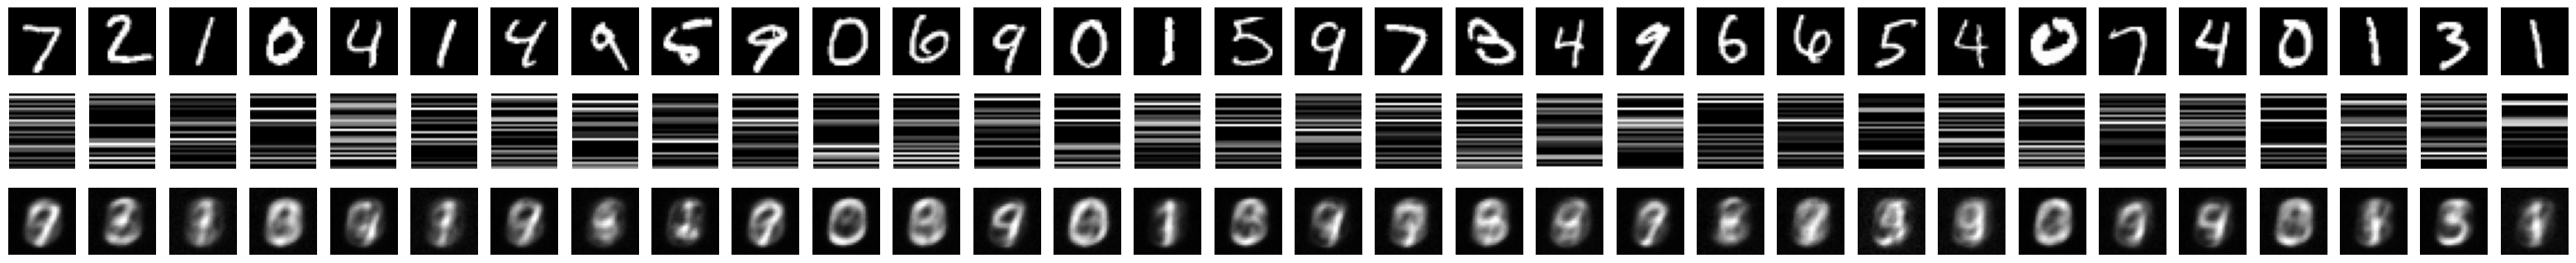

  1/938 [..............................] - ETA: 1:37 - loss: 0.0559

  3/938 [..............................] - ETA: 43s - loss: 0.0559 

  4/938 [..............................] - ETA: 45s - loss: 0.0562

  5/938 [..............................] - ETA: 46s - loss: 0.0564

  6/938 [..............................] - ETA: 47s - loss: 0.0563

  8/938 [..............................] - ETA: 44s - loss: 0.0568

 10/938 [..............................] - ETA: 42s - loss: 0.0571

 12/938 [..............................] - ETA: 42s - loss: 0.0571

 14/938 [..............................] - ETA: 41s - loss: 0.0574

 16/938 [..............................] - ETA: 41s - loss: 0.0576

 18/938 [..............................] - ETA: 40s - loss: 0.0576

 20/938 [..............................] - ETA: 41s - loss: 0.0579

 21/938 [..............................] - ETA: 41s - loss: 0.0579

 23/938 [..............................] - ETA: 41s - loss: 0.0581

 25/938 [..............................] - ETA: 41s - loss: 0.0582

 27/938 [..............................] - ETA: 41s - loss: 0.0580

 29/938 [..............................] - ETA: 40s - loss: 0.0580

 31/938 [..............................] - ETA: 40s - loss: 0.0580

 33/938 [>.............................] - ETA: 40s - loss: 0.0579

 35/938 [>.............................] - ETA: 39s - loss: 0.0579

 37/938 [>.............................] - ETA: 39s - loss: 0.0579

 39/938 [>.............................] - ETA: 39s - loss: 0.0578

 41/938 [>.............................] - ETA: 38s - loss: 0.0578

 43/938 [>.............................] - ETA: 38s - loss: 0.0579

 45/938 [>.............................] - ETA: 38s - loss: 0.0579

 46/938 [>.............................] - ETA: 38s - loss: 0.0579

 48/938 [>.............................] - ETA: 38s - loss: 0.0578

 50/938 [>.............................] - ETA: 38s - loss: 0.0576

 52/938 [>.............................] - ETA: 38s - loss: 0.0575

 54/938 [>.............................] - ETA: 38s - loss: 0.0574

 56/938 [>.............................] - ETA: 38s - loss: 0.0575

 58/938 [>.............................] - ETA: 37s - loss: 0.0576

 60/938 [>.............................] - ETA: 37s - loss: 0.0576

 62/938 [>.............................] - ETA: 37s - loss: 0.0576

 64/938 [=>............................] - ETA: 37s - loss: 0.0576

 66/938 [=>............................] - ETA: 37s - loss: 0.0576

 68/938 [=>............................] - ETA: 37s - loss: 0.0575

 70/938 [=>............................] - ETA: 37s - loss: 0.0575

 72/938 [=>............................] - ETA: 37s - loss: 0.0576

 74/938 [=>............................] - ETA: 37s - loss: 0.0577

 76/938 [=>............................] - ETA: 36s - loss: 0.0578

 78/938 [=>............................] - ETA: 36s - loss: 0.0578

 80/938 [=>............................] - ETA: 36s - loss: 0.0578

 82/938 [=>............................] - ETA: 36s - loss: 0.0578

 84/938 [=>............................] - ETA: 36s - loss: 0.0579

 86/938 [=>............................] - ETA: 36s - loss: 0.0579

 88/938 [=>............................] - ETA: 36s - loss: 0.0579

 90/938 [=>............................] - ETA: 36s - loss: 0.0579

 92/938 [=>............................] - ETA: 35s - loss: 0.0578

 94/938 [==>...........................] - ETA: 35s - loss: 0.0578

 96/938 [==>...........................] - ETA: 35s - loss: 0.0579

 98/938 [==>...........................] - ETA: 35s - loss: 0.0579

100/938 [==>...........................] - ETA: 35s - loss: 0.0579

102/938 [==>...........................] - ETA: 35s - loss: 0.0579

104/938 [==>...........................] - ETA: 35s - loss: 0.0578

106/938 [==>...........................] - ETA: 34s - loss: 0.0577

107/938 [==>...........................] - ETA: 34s - loss: 0.0577

108/938 [==>...........................] - ETA: 34s - loss: 0.0577

110/938 [==>...........................] - ETA: 34s - loss: 0.0577

111/938 [==>...........................] - ETA: 34s - loss: 0.0577

113/938 [==>...........................] - ETA: 34s - loss: 0.0577

115/938 [==>...........................] - ETA: 34s - loss: 0.0577

117/938 [==>...........................] - ETA: 34s - loss: 0.0576

119/938 [==>...........................] - ETA: 34s - loss: 0.0576

121/938 [==>...........................] - ETA: 34s - loss: 0.0576

123/938 [==>...........................] - ETA: 33s - loss: 0.0576

125/938 [==>...........................] - ETA: 33s - loss: 0.0576

127/938 [===>..........................] - ETA: 33s - loss: 0.0576

129/938 [===>..........................] - ETA: 33s - loss: 0.0576

131/938 [===>..........................] - ETA: 33s - loss: 0.0576

133/938 [===>..........................] - ETA: 33s - loss: 0.0576

134/938 [===>..........................] - ETA: 33s - loss: 0.0576

136/938 [===>..........................] - ETA: 33s - loss: 0.0576

138/938 [===>..........................] - ETA: 33s - loss: 0.0576

140/938 [===>..........................] - ETA: 33s - loss: 0.0576

142/938 [===>..........................] - ETA: 32s - loss: 0.0575

144/938 [===>..........................] - ETA: 32s - loss: 0.0575

146/938 [===>..........................] - ETA: 32s - loss: 0.0575

148/938 [===>..........................] - ETA: 32s - loss: 0.0575

150/938 [===>..........................] - ETA: 32s - loss: 0.0575

152/938 [===>..........................] - ETA: 32s - loss: 0.0575

154/938 [===>..........................] - ETA: 32s - loss: 0.0575

156/938 [===>..........................] - ETA: 32s - loss: 0.0575

158/938 [====>.........................] - ETA: 31s - loss: 0.0575

160/938 [====>.........................] - ETA: 31s - loss: 0.0575

161/938 [====>.........................] - ETA: 31s - loss: 0.0575

162/938 [====>.........................] - ETA: 31s - loss: 0.0575

164/938 [====>.........................] - ETA: 31s - loss: 0.0575

166/938 [====>.........................] - ETA: 31s - loss: 0.0575

168/938 [====>.........................] - ETA: 31s - loss: 0.0575

170/938 [====>.........................] - ETA: 31s - loss: 0.0574

172/938 [====>.........................] - ETA: 31s - loss: 0.0574

174/938 [====>.........................] - ETA: 31s - loss: 0.0574

176/938 [====>.........................] - ETA: 31s - loss: 0.0573

178/938 [====>.........................] - ETA: 31s - loss: 0.0573

180/938 [====>.........................] - ETA: 30s - loss: 0.0573

182/938 [====>.........................] - ETA: 30s - loss: 0.0572

184/938 [====>.........................] - ETA: 30s - loss: 0.0572

186/938 [====>.........................] - ETA: 30s - loss: 0.0572

188/938 [=====>........................] - ETA: 30s - loss: 0.0572

190/938 [=====>........................] - ETA: 30s - loss: 0.0571

192/938 [=====>........................] - ETA: 30s - loss: 0.0572

194/938 [=====>........................] - ETA: 30s - loss: 0.0571

196/938 [=====>........................] - ETA: 30s - loss: 0.0571

198/938 [=====>........................] - ETA: 30s - loss: 0.0572

200/938 [=====>........................] - ETA: 29s - loss: 0.0572

202/938 [=====>........................] - ETA: 29s - loss: 0.0571

204/938 [=====>........................] - ETA: 29s - loss: 0.0572

206/938 [=====>........................] - ETA: 29s - loss: 0.0572

208/938 [=====>........................] - ETA: 29s - loss: 0.0572

210/938 [=====>........................] - ETA: 29s - loss: 0.0572

212/938 [=====>........................] - ETA: 29s - loss: 0.0572

214/938 [=====>........................] - ETA: 29s - loss: 0.0572

216/938 [=====>........................] - ETA: 29s - loss: 0.0572

218/938 [=====>........................] - ETA: 29s - loss: 0.0572

220/938 [======>.......................] - ETA: 29s - loss: 0.0572

222/938 [======>.......................] - ETA: 28s - loss: 0.0572

224/938 [======>.......................] - ETA: 28s - loss: 0.0572

226/938 [======>.......................] - ETA: 28s - loss: 0.0572

228/938 [======>.......................] - ETA: 28s - loss: 0.0572

230/938 [======>.......................] - ETA: 28s - loss: 0.0572

232/938 [======>.......................] - ETA: 28s - loss: 0.0573

234/938 [======>.......................] - ETA: 28s - loss: 0.0572

236/938 [======>.......................] - ETA: 28s - loss: 0.0572

238/938 [======>.......................] - ETA: 28s - loss: 0.0572

240/938 [======>.......................] - ETA: 28s - loss: 0.0572

242/938 [======>.......................] - ETA: 28s - loss: 0.0571

244/938 [======>.......................] - ETA: 28s - loss: 0.0571

246/938 [======>.......................] - ETA: 27s - loss: 0.0571

248/938 [======>.......................] - ETA: 27s - loss: 0.0571

250/938 [======>.......................] - ETA: 27s - loss: 0.0571

252/938 [=======>......................] - ETA: 27s - loss: 0.0571

254/938 [=======>......................] - ETA: 27s - loss: 0.0570

256/938 [=======>......................] - ETA: 27s - loss: 0.0570

258/938 [=======>......................] - ETA: 27s - loss: 0.0570

260/938 [=======>......................] - ETA: 27s - loss: 0.0569

262/938 [=======>......................] - ETA: 27s - loss: 0.0569

263/938 [=======>......................] - ETA: 27s - loss: 0.0569

264/938 [=======>......................] - ETA: 27s - loss: 0.0569

265/938 [=======>......................] - ETA: 27s - loss: 0.0569

266/938 [=======>......................] - ETA: 27s - loss: 0.0569

267/938 [=======>......................] - ETA: 27s - loss: 0.0569

269/938 [=======>......................] - ETA: 27s - loss: 0.0569

270/938 [=======>......................] - ETA: 27s - loss: 0.0569

271/938 [=======>......................] - ETA: 27s - loss: 0.0569

272/938 [=======>......................] - ETA: 27s - loss: 0.0568

273/938 [=======>......................] - ETA: 27s - loss: 0.0568

274/938 [=======>......................] - ETA: 27s - loss: 0.0568

276/938 [=======>......................] - ETA: 27s - loss: 0.0568

277/938 [=======>......................] - ETA: 27s - loss: 0.0568

278/938 [=======>......................] - ETA: 27s - loss: 0.0568

279/938 [=======>......................] - ETA: 27s - loss: 0.0568

280/938 [=======>......................] - ETA: 27s - loss: 0.0568

281/938 [=======>......................] - ETA: 27s - loss: 0.0568

282/938 [========>.....................] - ETA: 27s - loss: 0.0568

283/938 [========>.....................] - ETA: 27s - loss: 0.0567

285/938 [========>.....................] - ETA: 27s - loss: 0.0567

286/938 [========>.....................] - ETA: 27s - loss: 0.0567

287/938 [========>.....................] - ETA: 27s - loss: 0.0567

288/938 [========>.....................] - ETA: 26s - loss: 0.0566

289/938 [========>.....................] - ETA: 26s - loss: 0.0566

291/938 [========>.....................] - ETA: 26s - loss: 0.0566

293/938 [========>.....................] - ETA: 26s - loss: 0.0566

294/938 [========>.....................] - ETA: 26s - loss: 0.0566

295/938 [========>.....................] - ETA: 26s - loss: 0.0566

296/938 [========>.....................] - ETA: 26s - loss: 0.0566

297/938 [========>.....................] - ETA: 26s - loss: 0.0565

298/938 [========>.....................] - ETA: 26s - loss: 0.0565

299/938 [========>.....................] - ETA: 26s - loss: 0.0565

301/938 [========>.....................] - ETA: 26s - loss: 0.0565

302/938 [========>.....................] - ETA: 26s - loss: 0.0565

303/938 [========>.....................] - ETA: 26s - loss: 0.0565

304/938 [========>.....................] - ETA: 26s - loss: 0.0565

305/938 [========>.....................] - ETA: 26s - loss: 0.0565

306/938 [========>.....................] - ETA: 26s - loss: 0.0565

307/938 [========>.....................] - ETA: 26s - loss: 0.0565

308/938 [========>.....................] - ETA: 26s - loss: 0.0565

309/938 [========>.....................] - ETA: 26s - loss: 0.0565

310/938 [========>.....................] - ETA: 26s - loss: 0.0565

312/938 [========>.....................] - ETA: 26s - loss: 0.0565

314/938 [=========>....................] - ETA: 26s - loss: 0.0565

315/938 [=========>....................] - ETA: 26s - loss: 0.0565

317/938 [=========>....................] - ETA: 26s - loss: 0.0565

319/938 [=========>....................] - ETA: 26s - loss: 0.0565

321/938 [=========>....................] - ETA: 26s - loss: 0.0565

322/938 [=========>....................] - ETA: 26s - loss: 0.0565

324/938 [=========>....................] - ETA: 26s - loss: 0.0565

326/938 [=========>....................] - ETA: 26s - loss: 0.0564

328/938 [=========>....................] - ETA: 25s - loss: 0.0564

330/938 [=========>....................] - ETA: 25s - loss: 0.0564

332/938 [=========>....................] - ETA: 25s - loss: 0.0564

334/938 [=========>....................] - ETA: 25s - loss: 0.0564

336/938 [=========>....................] - ETA: 25s - loss: 0.0564

338/938 [=========>....................] - ETA: 25s - loss: 0.0564

340/938 [=========>....................] - ETA: 25s - loss: 0.0563

341/938 [=========>....................] - ETA: 25s - loss: 0.0563

342/938 [=========>....................] - ETA: 25s - loss: 0.0563

343/938 [=========>....................] - ETA: 25s - loss: 0.0563

345/938 [==========>...................] - ETA: 25s - loss: 0.0563

346/938 [==========>...................] - ETA: 25s - loss: 0.0563

347/938 [==========>...................] - ETA: 25s - loss: 0.0563

349/938 [==========>...................] - ETA: 25s - loss: 0.0563

351/938 [==========>...................] - ETA: 25s - loss: 0.0563

353/938 [==========>...................] - ETA: 25s - loss: 0.0563

355/938 [==========>...................] - ETA: 24s - loss: 0.0563

357/938 [==========>...................] - ETA: 24s - loss: 0.0563

359/938 [==========>...................] - ETA: 24s - loss: 0.0563

361/938 [==========>...................] - ETA: 24s - loss: 0.0563

363/938 [==========>...................] - ETA: 24s - loss: 0.0563

365/938 [==========>...................] - ETA: 24s - loss: 0.0563

366/938 [==========>...................] - ETA: 24s - loss: 0.0563

368/938 [==========>...................] - ETA: 24s - loss: 0.0563

370/938 [==========>...................] - ETA: 24s - loss: 0.0562

372/938 [==========>...................] - ETA: 24s - loss: 0.0562

374/938 [==========>...................] - ETA: 24s - loss: 0.0562

376/938 [===========>..................] - ETA: 24s - loss: 0.0562

378/938 [===========>..................] - ETA: 23s - loss: 0.0562

379/938 [===========>..................] - ETA: 23s - loss: 0.0562

381/938 [===========>..................] - ETA: 23s - loss: 0.0561

383/938 [===========>..................] - ETA: 23s - loss: 0.0561

384/938 [===========>..................] - ETA: 23s - loss: 0.0561

385/938 [===========>..................] - ETA: 23s - loss: 0.0561

387/938 [===========>..................] - ETA: 23s - loss: 0.0561

388/938 [===========>..................] - ETA: 23s - loss: 0.0561

389/938 [===========>..................] - ETA: 23s - loss: 0.0561

391/938 [===========>..................] - ETA: 23s - loss: 0.0561

393/938 [===========>..................] - ETA: 23s - loss: 0.0560

394/938 [===========>..................] - ETA: 23s - loss: 0.0560

396/938 [===========>..................] - ETA: 23s - loss: 0.0560

397/938 [===========>..................] - ETA: 23s - loss: 0.0560

398/938 [===========>..................] - ETA: 23s - loss: 0.0560

399/938 [===========>..................] - ETA: 23s - loss: 0.0560

400/938 [===========>..................] - ETA: 23s - loss: 0.0560

401/938 [===========>..................] - ETA: 23s - loss: 0.0560

402/938 [===========>..................] - ETA: 23s - loss: 0.0560

404/938 [===========>..................] - ETA: 23s - loss: 0.0559

406/938 [===========>..................] - ETA: 23s - loss: 0.0559

407/938 [============>.................] - ETA: 23s - loss: 0.0559

408/938 [============>.................] - ETA: 22s - loss: 0.0559

409/938 [============>.................] - ETA: 22s - loss: 0.0559

411/938 [============>.................] - ETA: 22s - loss: 0.0559

413/938 [============>.................] - ETA: 22s - loss: 0.0558

414/938 [============>.................] - ETA: 22s - loss: 0.0558

415/938 [============>.................] - ETA: 22s - loss: 0.0558

416/938 [============>.................] - ETA: 22s - loss: 0.0558

418/938 [============>.................] - ETA: 22s - loss: 0.0558

419/938 [============>.................] - ETA: 22s - loss: 0.0558

420/938 [============>.................] - ETA: 22s - loss: 0.0558

422/938 [============>.................] - ETA: 22s - loss: 0.0558

424/938 [============>.................] - ETA: 22s - loss: 0.0557

426/938 [============>.................] - ETA: 22s - loss: 0.0557

428/938 [============>.................] - ETA: 22s - loss: 0.0557

430/938 [============>.................] - ETA: 22s - loss: 0.0557

432/938 [============>.................] - ETA: 21s - loss: 0.0557

434/938 [============>.................] - ETA: 21s - loss: 0.0557

436/938 [============>.................] - ETA: 21s - loss: 0.0557

438/938 [=============>................] - ETA: 21s - loss: 0.0557

440/938 [=============>................] - ETA: 21s - loss: 0.0557

442/938 [=============>................] - ETA: 21s - loss: 0.0556

444/938 [=============>................] - ETA: 21s - loss: 0.0556

445/938 [=============>................] - ETA: 21s - loss: 0.0556

447/938 [=============>................] - ETA: 21s - loss: 0.0556

449/938 [=============>................] - ETA: 21s - loss: 0.0556

451/938 [=============>................] - ETA: 21s - loss: 0.0556

453/938 [=============>................] - ETA: 21s - loss: 0.0556

455/938 [=============>................] - ETA: 20s - loss: 0.0556

457/938 [=============>................] - ETA: 20s - loss: 0.0556

459/938 [=============>................] - ETA: 20s - loss: 0.0556

461/938 [=============>................] - ETA: 20s - loss: 0.0556

463/938 [=============>................] - ETA: 20s - loss: 0.0555

465/938 [=============>................] - ETA: 20s - loss: 0.0555

467/938 [=============>................] - ETA: 20s - loss: 0.0555

469/938 [==============>...............] - ETA: 20s - loss: 0.0555

471/938 [==============>...............] - ETA: 20s - loss: 0.0555

472/938 [==============>...............] - ETA: 20s - loss: 0.0555

474/938 [==============>...............] - ETA: 19s - loss: 0.0555

476/938 [==============>...............] - ETA: 19s - loss: 0.0555

478/938 [==============>...............] - ETA: 19s - loss: 0.0554

480/938 [==============>...............] - ETA: 19s - loss: 0.0554

482/938 [==============>...............] - ETA: 19s - loss: 0.0554

484/938 [==============>...............] - ETA: 19s - loss: 0.0554

486/938 [==============>...............] - ETA: 19s - loss: 0.0554

488/938 [==============>...............] - ETA: 19s - loss: 0.0554

490/938 [==============>...............] - ETA: 19s - loss: 0.0553

492/938 [==============>...............] - ETA: 19s - loss: 0.0553

494/938 [==============>...............] - ETA: 19s - loss: 0.0553

496/938 [==============>...............] - ETA: 18s - loss: 0.0553

498/938 [==============>...............] - ETA: 18s - loss: 0.0553

500/938 [==============>...............] - ETA: 18s - loss: 0.0553

502/938 [===============>..............] - ETA: 18s - loss: 0.0552

504/938 [===============>..............] - ETA: 18s - loss: 0.0552

506/938 [===============>..............] - ETA: 18s - loss: 0.0552

508/938 [===============>..............] - ETA: 18s - loss: 0.0552

510/938 [===============>..............] - ETA: 18s - loss: 0.0552

512/938 [===============>..............] - ETA: 18s - loss: 0.0552

514/938 [===============>..............] - ETA: 18s - loss: 0.0552

516/938 [===============>..............] - ETA: 18s - loss: 0.0552

518/938 [===============>..............] - ETA: 17s - loss: 0.0552

520/938 [===============>..............] - ETA: 17s - loss: 0.0551

522/938 [===============>..............] - ETA: 17s - loss: 0.0551

524/938 [===============>..............] - ETA: 17s - loss: 0.0551

526/938 [===============>..............] - ETA: 17s - loss: 0.0551

527/938 [===============>..............] - ETA: 17s - loss: 0.0551

529/938 [===============>..............] - ETA: 17s - loss: 0.0551

531/938 [===============>..............] - ETA: 17s - loss: 0.0550

533/938 [================>.............] - ETA: 17s - loss: 0.0550

535/938 [================>.............] - ETA: 17s - loss: 0.0550

537/938 [================>.............] - ETA: 17s - loss: 0.0550

539/938 [================>.............] - ETA: 16s - loss: 0.0550

541/938 [================>.............] - ETA: 16s - loss: 0.0550

543/938 [================>.............] - ETA: 16s - loss: 0.0550

545/938 [================>.............] - ETA: 16s - loss: 0.0550

547/938 [================>.............] - ETA: 16s - loss: 0.0549

549/938 [================>.............] - ETA: 16s - loss: 0.0549

551/938 [================>.............] - ETA: 16s - loss: 0.0549

552/938 [================>.............] - ETA: 16s - loss: 0.0549

554/938 [================>.............] - ETA: 16s - loss: 0.0549

556/938 [================>.............] - ETA: 16s - loss: 0.0549

558/938 [================>.............] - ETA: 16s - loss: 0.0549

560/938 [================>.............] - ETA: 16s - loss: 0.0549

562/938 [================>.............] - ETA: 15s - loss: 0.0548

564/938 [=================>............] - ETA: 15s - loss: 0.0548

566/938 [=================>............] - ETA: 15s - loss: 0.0548

568/938 [=================>............] - ETA: 15s - loss: 0.0549

570/938 [=================>............] - ETA: 15s - loss: 0.0548

572/938 [=================>............] - ETA: 15s - loss: 0.0548

574/938 [=================>............] - ETA: 15s - loss: 0.0548

576/938 [=================>............] - ETA: 15s - loss: 0.0548

577/938 [=================>............] - ETA: 15s - loss: 0.0548

579/938 [=================>............] - ETA: 15s - loss: 0.0548

581/938 [=================>............] - ETA: 15s - loss: 0.0548

583/938 [=================>............] - ETA: 15s - loss: 0.0548

585/938 [=================>............] - ETA: 14s - loss: 0.0548

587/938 [=================>............] - ETA: 14s - loss: 0.0548

589/938 [=================>............] - ETA: 14s - loss: 0.0548

591/938 [=================>............] - ETA: 14s - loss: 0.0548

593/938 [=================>............] - ETA: 14s - loss: 0.0547

595/938 [==================>...........] - ETA: 14s - loss: 0.0547

597/938 [==================>...........] - ETA: 14s - loss: 0.0547

599/938 [==================>...........] - ETA: 14s - loss: 0.0547

601/938 [==================>...........] - ETA: 14s - loss: 0.0547

603/938 [==================>...........] - ETA: 14s - loss: 0.0547

604/938 [==================>...........] - ETA: 14s - loss: 0.0547

606/938 [==================>...........] - ETA: 14s - loss: 0.0547

608/938 [==================>...........] - ETA: 13s - loss: 0.0547

610/938 [==================>...........] - ETA: 13s - loss: 0.0546

612/938 [==================>...........] - ETA: 13s - loss: 0.0546

614/938 [==================>...........] - ETA: 13s - loss: 0.0546

616/938 [==================>...........] - ETA: 13s - loss: 0.0546

618/938 [==================>...........] - ETA: 13s - loss: 0.0546

620/938 [==================>...........] - ETA: 13s - loss: 0.0546

622/938 [==================>...........] - ETA: 13s - loss: 0.0546

624/938 [==================>...........] - ETA: 13s - loss: 0.0546

626/938 [===================>..........] - ETA: 13s - loss: 0.0546

628/938 [===================>..........] - ETA: 13s - loss: 0.0545

630/938 [===================>..........] - ETA: 13s - loss: 0.0545

632/938 [===================>..........] - ETA: 12s - loss: 0.0545

634/938 [===================>..........] - ETA: 12s - loss: 0.0545

636/938 [===================>..........] - ETA: 12s - loss: 0.0545

638/938 [===================>..........] - ETA: 12s - loss: 0.0545

640/938 [===================>..........] - ETA: 12s - loss: 0.0545

642/938 [===================>..........] - ETA: 12s - loss: 0.0545

644/938 [===================>..........] - ETA: 12s - loss: 0.0545

646/938 [===================>..........] - ETA: 12s - loss: 0.0545

648/938 [===================>..........] - ETA: 12s - loss: 0.0545

650/938 [===================>..........] - ETA: 12s - loss: 0.0544

652/938 [===================>..........] - ETA: 12s - loss: 0.0544

654/938 [===================>..........] - ETA: 11s - loss: 0.0544

656/938 [===================>..........] - ETA: 11s - loss: 0.0544

657/938 [====================>.........] - ETA: 11s - loss: 0.0544

659/938 [====================>.........] - ETA: 11s - loss: 0.0544

661/938 [====================>.........] - ETA: 11s - loss: 0.0544

663/938 [====================>.........] - ETA: 11s - loss: 0.0544

665/938 [====================>.........] - ETA: 11s - loss: 0.0544

667/938 [====================>.........] - ETA: 11s - loss: 0.0544

669/938 [====================>.........] - ETA: 11s - loss: 0.0544

671/938 [====================>.........] - ETA: 11s - loss: 0.0543

673/938 [====================>.........] - ETA: 11s - loss: 0.0543

675/938 [====================>.........] - ETA: 11s - loss: 0.0543

677/938 [====================>.........] - ETA: 10s - loss: 0.0543

679/938 [====================>.........] - ETA: 10s - loss: 0.0543

680/938 [====================>.........] - ETA: 10s - loss: 0.0543

681/938 [====================>.........] - ETA: 10s - loss: 0.0543

682/938 [====================>.........] - ETA: 10s - loss: 0.0543

683/938 [====================>.........] - ETA: 10s - loss: 0.0543

684/938 [====================>.........] - ETA: 10s - loss: 0.0543

686/938 [====================>.........] - ETA: 10s - loss: 0.0543

688/938 [=====================>........] - ETA: 10s - loss: 0.0542

690/938 [=====================>........] - ETA: 10s - loss: 0.0542

692/938 [=====================>........] - ETA: 10s - loss: 0.0542

694/938 [=====================>........] - ETA: 10s - loss: 0.0542

696/938 [=====================>........] - ETA: 10s - loss: 0.0542

698/938 [=====================>........] - ETA: 10s - loss: 0.0542

700/938 [=====================>........] - ETA: 10s - loss: 0.0542

702/938 [=====================>........] - ETA: 9s - loss: 0.0542 

703/938 [=====================>........] - ETA: 9s - loss: 0.0542

705/938 [=====================>........] - ETA: 9s - loss: 0.0541

706/938 [=====================>........] - ETA: 9s - loss: 0.0541

707/938 [=====================>........] - ETA: 9s - loss: 0.0541

708/938 [=====================>........] - ETA: 9s - loss: 0.0541

709/938 [=====================>........] - ETA: 9s - loss: 0.0541

710/938 [=====================>........] - ETA: 9s - loss: 0.0541

711/938 [=====================>........] - ETA: 9s - loss: 0.0541

713/938 [=====================>........] - ETA: 9s - loss: 0.0541

715/938 [=====================>........] - ETA: 9s - loss: 0.0541

717/938 [=====================>........] - ETA: 9s - loss: 0.0541

719/938 [=====================>........] - ETA: 9s - loss: 0.0541

721/938 [======================>.......] - ETA: 9s - loss: 0.0541

723/938 [======================>.......] - ETA: 9s - loss: 0.0540

725/938 [======================>.......] - ETA: 9s - loss: 0.0540

727/938 [======================>.......] - ETA: 8s - loss: 0.0540

729/938 [======================>.......] - ETA: 8s - loss: 0.0540

731/938 [======================>.......] - ETA: 8s - loss: 0.0540

733/938 [======================>.......] - ETA: 8s - loss: 0.0540

735/938 [======================>.......] - ETA: 8s - loss: 0.0540

737/938 [======================>.......] - ETA: 8s - loss: 0.0540

739/938 [======================>.......] - ETA: 8s - loss: 0.0540

741/938 [======================>.......] - ETA: 8s - loss: 0.0539

743/938 [======================>.......] - ETA: 8s - loss: 0.0539

745/938 [======================>.......] - ETA: 8s - loss: 0.0539

747/938 [======================>.......] - ETA: 8s - loss: 0.0539

749/938 [======================>.......] - ETA: 7s - loss: 0.0539

751/938 [=======================>......] - ETA: 7s - loss: 0.0539

753/938 [=======================>......] - ETA: 7s - loss: 0.0539

755/938 [=======================>......] - ETA: 7s - loss: 0.0539

757/938 [=======================>......] - ETA: 7s - loss: 0.0539

759/938 [=======================>......] - ETA: 7s - loss: 0.0539

761/938 [=======================>......] - ETA: 7s - loss: 0.0539

763/938 [=======================>......] - ETA: 7s - loss: 0.0539

765/938 [=======================>......] - ETA: 7s - loss: 0.0539

767/938 [=======================>......] - ETA: 7s - loss: 0.0539

769/938 [=======================>......] - ETA: 7s - loss: 0.0539

771/938 [=======================>......] - ETA: 7s - loss: 0.0538

773/938 [=======================>......] - ETA: 6s - loss: 0.0538

774/938 [=======================>......] - ETA: 6s - loss: 0.0538

776/938 [=======================>......] - ETA: 6s - loss: 0.0538

778/938 [=======================>......] - ETA: 6s - loss: 0.0538

780/938 [=======================>......] - ETA: 6s - loss: 0.0538

782/938 [========================>.....] - ETA: 6s - loss: 0.0538

783/938 [========================>.....] - ETA: 6s - loss: 0.0538

785/938 [========================>.....] - ETA: 6s - loss: 0.0538

787/938 [========================>.....] - ETA: 6s - loss: 0.0538

789/938 [========================>.....] - ETA: 6s - loss: 0.0538

791/938 [========================>.....] - ETA: 6s - loss: 0.0537

793/938 [========================>.....] - ETA: 6s - loss: 0.0537

795/938 [========================>.....] - ETA: 6s - loss: 0.0537

797/938 [========================>.....] - ETA: 5s - loss: 0.0537

799/938 [========================>.....] - ETA: 5s - loss: 0.0537

801/938 [========================>.....] - ETA: 5s - loss: 0.0537

803/938 [========================>.....] - ETA: 5s - loss: 0.0537

805/938 [========================>.....] - ETA: 5s - loss: 0.0537

807/938 [========================>.....] - ETA: 5s - loss: 0.0537

809/938 [========================>.....] - ETA: 5s - loss: 0.0536

811/938 [========================>.....] - ETA: 5s - loss: 0.0536

813/938 [=========================>....] - ETA: 5s - loss: 0.0536

815/938 [=========================>....] - ETA: 5s - loss: 0.0536

817/938 [=========================>....] - ETA: 5s - loss: 0.0536

819/938 [=========================>....] - ETA: 5s - loss: 0.0536

821/938 [=========================>....] - ETA: 4s - loss: 0.0536

822/938 [=========================>....] - ETA: 4s - loss: 0.0536

824/938 [=========================>....] - ETA: 4s - loss: 0.0536

826/938 [=========================>....] - ETA: 4s - loss: 0.0536

828/938 [=========================>....] - ETA: 4s - loss: 0.0535

830/938 [=========================>....] - ETA: 4s - loss: 0.0535

832/938 [=========================>....] - ETA: 4s - loss: 0.0535

834/938 [=========================>....] - ETA: 4s - loss: 0.0535

836/938 [=========================>....] - ETA: 4s - loss: 0.0535

838/938 [=========================>....] - ETA: 4s - loss: 0.0535

840/938 [=========================>....] - ETA: 4s - loss: 0.0535

842/938 [=========================>....] - ETA: 4s - loss: 0.0535

844/938 [=========================>....] - ETA: 3s - loss: 0.0535

845/938 [==========================>...] - ETA: 3s - loss: 0.0535

847/938 [==========================>...] - ETA: 3s - loss: 0.0534

849/938 [==========================>...] - ETA: 3s - loss: 0.0534

851/938 [==========================>...] - ETA: 3s - loss: 0.0534

852/938 [==========================>...] - ETA: 3s - loss: 0.0534

854/938 [==========================>...] - ETA: 3s - loss: 0.0534

856/938 [==========================>...] - ETA: 3s - loss: 0.0534

858/938 [==========================>...] - ETA: 3s - loss: 0.0534

860/938 [==========================>...] - ETA: 3s - loss: 0.0534

862/938 [==========================>...] - ETA: 3s - loss: 0.0533

864/938 [==========================>...] - ETA: 3s - loss: 0.0533

866/938 [==========================>...] - ETA: 3s - loss: 0.0533

868/938 [==========================>...] - ETA: 2s - loss: 0.0533

870/938 [==========================>...] - ETA: 2s - loss: 0.0533

872/938 [==========================>...] - ETA: 2s - loss: 0.0533

874/938 [==========================>...] - ETA: 2s - loss: 0.0533

876/938 [===========================>..] - ETA: 2s - loss: 0.0533

878/938 [===========================>..] - ETA: 2s - loss: 0.0533

879/938 [===========================>..] - ETA: 2s - loss: 0.0533

881/938 [===========================>..] - ETA: 2s - loss: 0.0532

883/938 [===========================>..] - ETA: 2s - loss: 0.0532

885/938 [===========================>..] - ETA: 2s - loss: 0.0532

887/938 [===========================>..] - ETA: 2s - loss: 0.0532

889/938 [===========================>..] - ETA: 2s - loss: 0.0532

891/938 [===========================>..] - ETA: 1s - loss: 0.0532

893/938 [===========================>..] - ETA: 1s - loss: 0.0532

895/938 [===========================>..] - ETA: 1s - loss: 0.0532

897/938 [===========================>..] - ETA: 1s - loss: 0.0532

899/938 [===========================>..] - ETA: 1s - loss: 0.0532

901/938 [===========================>..] - ETA: 1s - loss: 0.0531

903/938 [===========================>..] - ETA: 1s - loss: 0.0531

905/938 [===========================>..] - ETA: 1s - loss: 0.0531

907/938 [============================>.] - ETA: 1s - loss: 0.0531

909/938 [============================>.] - ETA: 1s - loss: 0.0531

911/938 [============================>.] - ETA: 1s - loss: 0.0531

913/938 [============================>.] - ETA: 1s - loss: 0.0531

915/938 [============================>.] - ETA: 0s - loss: 0.0531

917/938 [============================>.] - ETA: 0s - loss: 0.0531

919/938 [============================>.] - ETA: 0s - loss: 0.0530

921/938 [============================>.] - ETA: 0s - loss: 0.0530

923/938 [============================>.] - ETA: 0s - loss: 0.0530

925/938 [============================>.] - ETA: 0s - loss: 0.0530

927/938 [============================>.] - ETA: 0s - loss: 0.0530

929/938 [============================>.] - ETA: 0s - loss: 0.0530

931/938 [============================>.] - ETA: 0s - loss: 0.0530

933/938 [============================>.] - ETA: 0s - loss: 0.0530

935/938 [============================>.] - ETA: 0s - loss: 0.0530

937/938 [============================>.] - ETA: 0s - loss: 0.0530

938/938 [==============================] - 42s 45ms/step - loss: 0.0530 - val_loss: 0.0484
batch_vals = tf.Tensor(
[[  0  41   0  14 179   0 125   0   0  45  95  58  86  88   0   0 109   0
    0 142  54   0  22   0   0   0   0   0   0  16   0 129]
 [  0 247   0   0   0   0 153 107   0   0   0 212  46 171  24   0   0   0
    0  33 139   0  89   0  43 205   0 122  34  36   0  45]
 [  0 203   0   0  26   0 245   4   0   0   0   0 176  86   0  29  30   0
    0  73   0   2  52   0   0 224   0  89   0  64   0  18]
 [  0 134 143 189  21   0  21  54   0  23   0 170   0 109   0  81  50   0
  112  44   0   0  66  86  65   0   0 156   0  53   0 162]
 [  0 115   0 154 112   0 216 298   0  66   0  63   0  51   0   0   0  39
   89   0   0  82 206   0 165 162   0 230   0  93   0   8]
 [  0  34  31  55   0  90 190 138   0   1   0  77 130 115   0   0   0   0
    0 127   0  70  94   0   0   7   0 150   0   0   0 142]
 [  0 130   0   0  74   0 225  48   0   0  94 248 125 119   0   0 204  27
  130  54   0

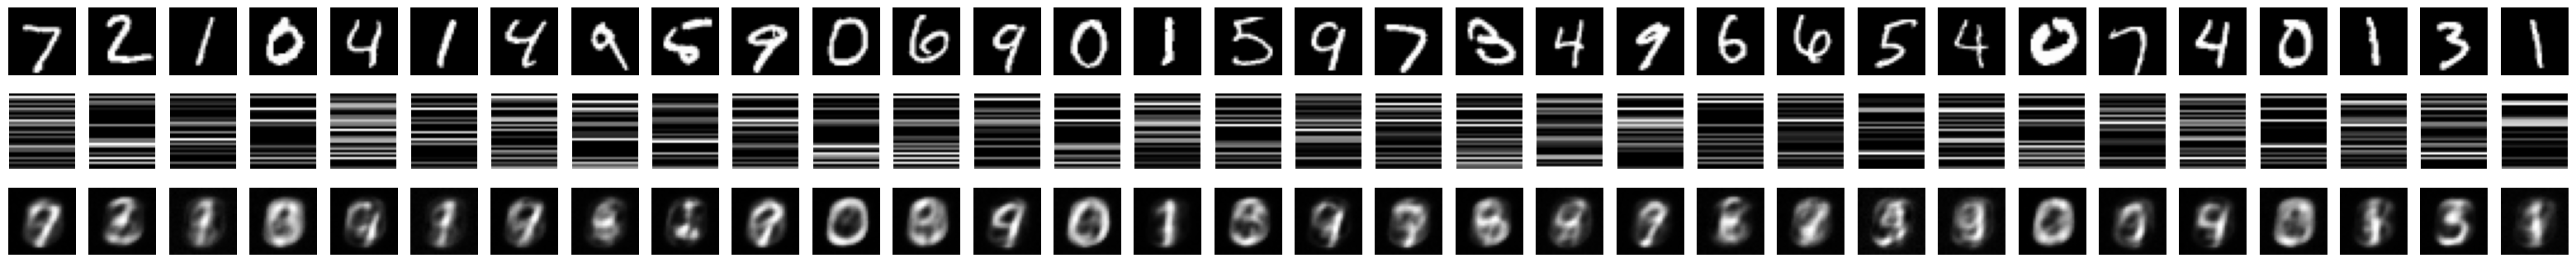

  1/938 [..............................] - ETA: 1:09 - loss: 0.0432

  2/938 [..............................] - ETA: 46s - loss: 0.0447 

  4/938 [..............................] - ETA: 42s - loss: 0.0460

  6/938 [..............................] - ETA: 40s - loss: 0.0460

  7/938 [..............................] - ETA: 42s - loss: 0.0463

  8/938 [..............................] - ETA: 44s - loss: 0.0467

  9/938 [..............................] - ETA: 44s - loss: 0.0467

 11/938 [..............................] - ETA: 44s - loss: 0.0469

 13/938 [..............................] - ETA: 44s - loss: 0.0468

 14/938 [..............................] - ETA: 44s - loss: 0.0472

 16/938 [..............................] - ETA: 44s - loss: 0.0474

 17/938 [..............................] - ETA: 45s - loss: 0.0475

 19/938 [..............................] - ETA: 44s - loss: 0.0477

 20/938 [..............................] - ETA: 44s - loss: 0.0478

 21/938 [..............................] - ETA: 45s - loss: 0.0478

 22/938 [..............................] - ETA: 45s - loss: 0.0479

 24/938 [..............................] - ETA: 44s - loss: 0.0479

 26/938 [..............................] - ETA: 44s - loss: 0.0480

 27/938 [..............................] - ETA: 44s - loss: 0.0479

 29/938 [..............................] - ETA: 44s - loss: 0.0479

 31/938 [..............................] - ETA: 44s - loss: 0.0479

 33/938 [>.............................] - ETA: 44s - loss: 0.0479

 35/938 [>.............................] - ETA: 43s - loss: 0.0479

 37/938 [>.............................] - ETA: 43s - loss: 0.0479

 38/938 [>.............................] - ETA: 43s - loss: 0.0480

 39/938 [>.............................] - ETA: 44s - loss: 0.0479

 40/938 [>.............................] - ETA: 44s - loss: 0.0479

 42/938 [>.............................] - ETA: 44s - loss: 0.0479

 44/938 [>.............................] - ETA: 43s - loss: 0.0480

 46/938 [>.............................] - ETA: 42s - loss: 0.0480

 48/938 [>.............................] - ETA: 42s - loss: 0.0479

 50/938 [>.............................] - ETA: 42s - loss: 0.0478

 52/938 [>.............................] - ETA: 41s - loss: 0.0477

 54/938 [>.............................] - ETA: 41s - loss: 0.0477

 56/938 [>.............................] - ETA: 41s - loss: 0.0477

 58/938 [>.............................] - ETA: 40s - loss: 0.0478

 60/938 [>.............................] - ETA: 40s - loss: 0.0478

 62/938 [>.............................] - ETA: 40s - loss: 0.0478

 64/938 [=>............................] - ETA: 39s - loss: 0.0478

 66/938 [=>............................] - ETA: 39s - loss: 0.0477

 68/938 [=>............................] - ETA: 39s - loss: 0.0478

 70/938 [=>............................] - ETA: 39s - loss: 0.0478

 72/938 [=>............................] - ETA: 39s - loss: 0.0478

 74/938 [=>............................] - ETA: 38s - loss: 0.0480

 76/938 [=>............................] - ETA: 38s - loss: 0.0482

 78/938 [=>............................] - ETA: 38s - loss: 0.0481

 80/938 [=>............................] - ETA: 38s - loss: 0.0482

 82/938 [=>............................] - ETA: 38s - loss: 0.0481

 84/938 [=>............................] - ETA: 37s - loss: 0.0482

 86/938 [=>............................] - ETA: 37s - loss: 0.0482

 88/938 [=>............................] - ETA: 37s - loss: 0.0482

 90/938 [=>............................] - ETA: 37s - loss: 0.0482

 91/938 [=>............................] - ETA: 37s - loss: 0.0482

 92/938 [=>............................] - ETA: 37s - loss: 0.0482

 94/938 [==>...........................] - ETA: 37s - loss: 0.0482

 96/938 [==>...........................] - ETA: 37s - loss: 0.0482

 98/938 [==>...........................] - ETA: 37s - loss: 0.0482

100/938 [==>...........................] - ETA: 37s - loss: 0.0483

102/938 [==>...........................] - ETA: 36s - loss: 0.0482

103/938 [==>...........................] - ETA: 36s - loss: 0.0482

105/938 [==>...........................] - ETA: 36s - loss: 0.0482

107/938 [==>...........................] - ETA: 36s - loss: 0.0481

109/938 [==>...........................] - ETA: 36s - loss: 0.0481

110/938 [==>...........................] - ETA: 36s - loss: 0.0481

111/938 [==>...........................] - ETA: 36s - loss: 0.0481

113/938 [==>...........................] - ETA: 36s - loss: 0.0480

115/938 [==>...........................] - ETA: 36s - loss: 0.0481

117/938 [==>...........................] - ETA: 36s - loss: 0.0480

119/938 [==>...........................] - ETA: 36s - loss: 0.0480

120/938 [==>...........................] - ETA: 36s - loss: 0.0480

121/938 [==>...........................] - ETA: 36s - loss: 0.0480

122/938 [==>...........................] - ETA: 36s - loss: 0.0480

123/938 [==>...........................] - ETA: 36s - loss: 0.0481

125/938 [==>...........................] - ETA: 36s - loss: 0.0481

127/938 [===>..........................] - ETA: 36s - loss: 0.0481

129/938 [===>..........................] - ETA: 36s - loss: 0.0481

131/938 [===>..........................] - ETA: 36s - loss: 0.0481

133/938 [===>..........................] - ETA: 36s - loss: 0.0481

135/938 [===>..........................] - ETA: 35s - loss: 0.0481

137/938 [===>..........................] - ETA: 35s - loss: 0.0481

139/938 [===>..........................] - ETA: 35s - loss: 0.0481

141/938 [===>..........................] - ETA: 35s - loss: 0.0481

142/938 [===>..........................] - ETA: 35s - loss: 0.0481

144/938 [===>..........................] - ETA: 35s - loss: 0.0481

146/938 [===>..........................] - ETA: 35s - loss: 0.0481

148/938 [===>..........................] - ETA: 35s - loss: 0.0481

150/938 [===>..........................] - ETA: 35s - loss: 0.0481

152/938 [===>..........................] - ETA: 35s - loss: 0.0481

154/938 [===>..........................] - ETA: 34s - loss: 0.0482

155/938 [===>..........................] - ETA: 34s - loss: 0.0481

156/938 [===>..........................] - ETA: 34s - loss: 0.0482

158/938 [====>.........................] - ETA: 34s - loss: 0.0481

160/938 [====>.........................] - ETA: 34s - loss: 0.0481

161/938 [====>.........................] - ETA: 34s - loss: 0.0482

163/938 [====>.........................] - ETA: 34s - loss: 0.0482

165/938 [====>.........................] - ETA: 34s - loss: 0.0482

167/938 [====>.........................] - ETA: 34s - loss: 0.0482

169/938 [====>.........................] - ETA: 34s - loss: 0.0481

171/938 [====>.........................] - ETA: 34s - loss: 0.0481

173/938 [====>.........................] - ETA: 33s - loss: 0.0481

175/938 [====>.........................] - ETA: 33s - loss: 0.0481

177/938 [====>.........................] - ETA: 33s - loss: 0.0481

179/938 [====>.........................] - ETA: 33s - loss: 0.0480

181/938 [====>.........................] - ETA: 33s - loss: 0.0480

183/938 [====>.........................] - ETA: 33s - loss: 0.0480

185/938 [====>.........................] - ETA: 33s - loss: 0.0480

187/938 [====>.........................] - ETA: 33s - loss: 0.0480

188/938 [=====>........................] - ETA: 33s - loss: 0.0480

190/938 [=====>........................] - ETA: 33s - loss: 0.0479

192/938 [=====>........................] - ETA: 32s - loss: 0.0480

194/938 [=====>........................] - ETA: 32s - loss: 0.0480

196/938 [=====>........................] - ETA: 32s - loss: 0.0480

198/938 [=====>........................] - ETA: 32s - loss: 0.0480

200/938 [=====>........................] - ETA: 32s - loss: 0.0480

202/938 [=====>........................] - ETA: 32s - loss: 0.0480

204/938 [=====>........................] - ETA: 32s - loss: 0.0481

206/938 [=====>........................] - ETA: 31s - loss: 0.0481

208/938 [=====>........................] - ETA: 31s - loss: 0.0481

210/938 [=====>........................] - ETA: 31s - loss: 0.0481

212/938 [=====>........................] - ETA: 31s - loss: 0.0481

214/938 [=====>........................] - ETA: 31s - loss: 0.0481

216/938 [=====>........................] - ETA: 31s - loss: 0.0481

218/938 [=====>........................] - ETA: 31s - loss: 0.0481

220/938 [======>.......................] - ETA: 30s - loss: 0.0482

222/938 [======>.......................] - ETA: 30s - loss: 0.0482

224/938 [======>.......................] - ETA: 30s - loss: 0.0482

226/938 [======>.......................] - ETA: 30s - loss: 0.0482

228/938 [======>.......................] - ETA: 30s - loss: 0.0482

230/938 [======>.......................] - ETA: 30s - loss: 0.0483

232/938 [======>.......................] - ETA: 30s - loss: 0.0483

234/938 [======>.......................] - ETA: 30s - loss: 0.0483

236/938 [======>.......................] - ETA: 29s - loss: 0.0483

237/938 [======>.......................] - ETA: 29s - loss: 0.0483

239/938 [======>.......................] - ETA: 29s - loss: 0.0482

241/938 [======>.......................] - ETA: 29s - loss: 0.0482

243/938 [======>.......................] - ETA: 29s - loss: 0.0482

245/938 [======>.......................] - ETA: 29s - loss: 0.0482

247/938 [======>.......................] - ETA: 29s - loss: 0.0482

249/938 [======>.......................] - ETA: 29s - loss: 0.0482

251/938 [=======>......................] - ETA: 29s - loss: 0.0482

253/938 [=======>......................] - ETA: 28s - loss: 0.0482

255/938 [=======>......................] - ETA: 28s - loss: 0.0482

257/938 [=======>......................] - ETA: 28s - loss: 0.0482

259/938 [=======>......................] - ETA: 28s - loss: 0.0481

261/938 [=======>......................] - ETA: 28s - loss: 0.0481

263/938 [=======>......................] - ETA: 28s - loss: 0.0481

265/938 [=======>......................] - ETA: 28s - loss: 0.0481

267/938 [=======>......................] - ETA: 28s - loss: 0.0481

269/938 [=======>......................] - ETA: 28s - loss: 0.0481

271/938 [=======>......................] - ETA: 28s - loss: 0.0481

273/938 [=======>......................] - ETA: 27s - loss: 0.0481

275/938 [=======>......................] - ETA: 27s - loss: 0.0481

277/938 [=======>......................] - ETA: 27s - loss: 0.0481

279/938 [=======>......................] - ETA: 27s - loss: 0.0481

281/938 [=======>......................] - ETA: 27s - loss: 0.0481

283/938 [========>.....................] - ETA: 27s - loss: 0.0480

285/938 [========>.....................] - ETA: 27s - loss: 0.0480

287/938 [========>.....................] - ETA: 27s - loss: 0.0480

289/938 [========>.....................] - ETA: 27s - loss: 0.0480

291/938 [========>.....................] - ETA: 27s - loss: 0.0480

293/938 [========>.....................] - ETA: 26s - loss: 0.0480

295/938 [========>.....................] - ETA: 26s - loss: 0.0479

297/938 [========>.....................] - ETA: 26s - loss: 0.0479

299/938 [========>.....................] - ETA: 26s - loss: 0.0479

301/938 [========>.....................] - ETA: 26s - loss: 0.0479

303/938 [========>.....................] - ETA: 26s - loss: 0.0479

305/938 [========>.....................] - ETA: 26s - loss: 0.0479

307/938 [========>.....................] - ETA: 26s - loss: 0.0479

309/938 [========>.....................] - ETA: 26s - loss: 0.0479

311/938 [========>.....................] - ETA: 25s - loss: 0.0479

313/938 [=========>....................] - ETA: 25s - loss: 0.0480

315/938 [=========>....................] - ETA: 25s - loss: 0.0480

317/938 [=========>....................] - ETA: 25s - loss: 0.0480

319/938 [=========>....................] - ETA: 25s - loss: 0.0480

321/938 [=========>....................] - ETA: 25s - loss: 0.0480

323/938 [=========>....................] - ETA: 25s - loss: 0.0480

325/938 [=========>....................] - ETA: 25s - loss: 0.0479

327/938 [=========>....................] - ETA: 25s - loss: 0.0479

329/938 [=========>....................] - ETA: 25s - loss: 0.0479

331/938 [=========>....................] - ETA: 25s - loss: 0.0479

333/938 [=========>....................] - ETA: 24s - loss: 0.0479

335/938 [=========>....................] - ETA: 24s - loss: 0.0479

337/938 [=========>....................] - ETA: 24s - loss: 0.0479

339/938 [=========>....................] - ETA: 24s - loss: 0.0479

341/938 [=========>....................] - ETA: 24s - loss: 0.0479

343/938 [=========>....................] - ETA: 24s - loss: 0.0479

345/938 [==========>...................] - ETA: 24s - loss: 0.0479

347/938 [==========>...................] - ETA: 24s - loss: 0.0479

349/938 [==========>...................] - ETA: 24s - loss: 0.0479

351/938 [==========>...................] - ETA: 24s - loss: 0.0479

353/938 [==========>...................] - ETA: 24s - loss: 0.0479

355/938 [==========>...................] - ETA: 23s - loss: 0.0479

357/938 [==========>...................] - ETA: 23s - loss: 0.0479

359/938 [==========>...................] - ETA: 23s - loss: 0.0479

361/938 [==========>...................] - ETA: 23s - loss: 0.0479

363/938 [==========>...................] - ETA: 23s - loss: 0.0479

365/938 [==========>...................] - ETA: 23s - loss: 0.0479

367/938 [==========>...................] - ETA: 23s - loss: 0.0479

369/938 [==========>...................] - ETA: 23s - loss: 0.0479

371/938 [==========>...................] - ETA: 23s - loss: 0.0479

373/938 [==========>...................] - ETA: 23s - loss: 0.0479

375/938 [==========>...................] - ETA: 23s - loss: 0.0479

377/938 [===========>..................] - ETA: 22s - loss: 0.0479

379/938 [===========>..................] - ETA: 22s - loss: 0.0479

381/938 [===========>..................] - ETA: 22s - loss: 0.0479

383/938 [===========>..................] - ETA: 22s - loss: 0.0479

385/938 [===========>..................] - ETA: 22s - loss: 0.0479

387/938 [===========>..................] - ETA: 22s - loss: 0.0479

389/938 [===========>..................] - ETA: 22s - loss: 0.0478

391/938 [===========>..................] - ETA: 22s - loss: 0.0478

393/938 [===========>..................] - ETA: 22s - loss: 0.0478

395/938 [===========>..................] - ETA: 22s - loss: 0.0478

397/938 [===========>..................] - ETA: 22s - loss: 0.0478

399/938 [===========>..................] - ETA: 22s - loss: 0.0478

401/938 [===========>..................] - ETA: 21s - loss: 0.0478

403/938 [===========>..................] - ETA: 21s - loss: 0.0478

405/938 [===========>..................] - ETA: 21s - loss: 0.0478

407/938 [============>.................] - ETA: 21s - loss: 0.0477

409/938 [============>.................] - ETA: 21s - loss: 0.0477

411/938 [============>.................] - ETA: 21s - loss: 0.0477

413/938 [============>.................] - ETA: 21s - loss: 0.0477

415/938 [============>.................] - ETA: 21s - loss: 0.0477

417/938 [============>.................] - ETA: 21s - loss: 0.0477

419/938 [============>.................] - ETA: 21s - loss: 0.0477

421/938 [============>.................] - ETA: 21s - loss: 0.0477

423/938 [============>.................] - ETA: 20s - loss: 0.0477

425/938 [============>.................] - ETA: 20s - loss: 0.0477

427/938 [============>.................] - ETA: 20s - loss: 0.0477

428/938 [============>.................] - ETA: 20s - loss: 0.0477

430/938 [============>.................] - ETA: 20s - loss: 0.0477

432/938 [============>.................] - ETA: 20s - loss: 0.0477

434/938 [============>.................] - ETA: 20s - loss: 0.0477

436/938 [============>.................] - ETA: 20s - loss: 0.0477

438/938 [=============>................] - ETA: 20s - loss: 0.0476

440/938 [=============>................] - ETA: 20s - loss: 0.0476

442/938 [=============>................] - ETA: 20s - loss: 0.0476

444/938 [=============>................] - ETA: 20s - loss: 0.0476

446/938 [=============>................] - ETA: 20s - loss: 0.0476

448/938 [=============>................] - ETA: 19s - loss: 0.0476

450/938 [=============>................] - ETA: 19s - loss: 0.0476

452/938 [=============>................] - ETA: 19s - loss: 0.0476

453/938 [=============>................] - ETA: 19s - loss: 0.0476

454/938 [=============>................] - ETA: 19s - loss: 0.0476

455/938 [=============>................] - ETA: 19s - loss: 0.0476

456/938 [=============>................] - ETA: 19s - loss: 0.0476

457/938 [=============>................] - ETA: 19s - loss: 0.0476

458/938 [=============>................] - ETA: 19s - loss: 0.0476

459/938 [=============>................] - ETA: 19s - loss: 0.0476

460/938 [=============>................] - ETA: 19s - loss: 0.0476

461/938 [=============>................] - ETA: 19s - loss: 0.0476

463/938 [=============>................] - ETA: 19s - loss: 0.0476

464/938 [=============>................] - ETA: 19s - loss: 0.0476

466/938 [=============>................] - ETA: 19s - loss: 0.0476

468/938 [=============>................] - ETA: 19s - loss: 0.0476

470/938 [==============>...............] - ETA: 19s - loss: 0.0476

472/938 [==============>...............] - ETA: 19s - loss: 0.0476

474/938 [==============>...............] - ETA: 19s - loss: 0.0475

476/938 [==============>...............] - ETA: 18s - loss: 0.0475

478/938 [==============>...............] - ETA: 18s - loss: 0.0475

480/938 [==============>...............] - ETA: 18s - loss: 0.0475

482/938 [==============>...............] - ETA: 18s - loss: 0.0475

483/938 [==============>...............] - ETA: 18s - loss: 0.0475

485/938 [==============>...............] - ETA: 18s - loss: 0.0475

487/938 [==============>...............] - ETA: 18s - loss: 0.0475

489/938 [==============>...............] - ETA: 18s - loss: 0.0475

490/938 [==============>...............] - ETA: 18s - loss: 0.0475

492/938 [==============>...............] - ETA: 18s - loss: 0.0475

494/938 [==============>...............] - ETA: 18s - loss: 0.0475

496/938 [==============>...............] - ETA: 18s - loss: 0.0475

498/938 [==============>...............] - ETA: 18s - loss: 0.0475

500/938 [==============>...............] - ETA: 17s - loss: 0.0475

502/938 [===============>..............] - ETA: 17s - loss: 0.0474

504/938 [===============>..............] - ETA: 17s - loss: 0.0474

506/938 [===============>..............] - ETA: 17s - loss: 0.0474

507/938 [===============>..............] - ETA: 17s - loss: 0.0474

509/938 [===============>..............] - ETA: 17s - loss: 0.0474

511/938 [===============>..............] - ETA: 17s - loss: 0.0474

513/938 [===============>..............] - ETA: 17s - loss: 0.0474

515/938 [===============>..............] - ETA: 17s - loss: 0.0474

516/938 [===============>..............] - ETA: 17s - loss: 0.0474

518/938 [===============>..............] - ETA: 17s - loss: 0.0474

520/938 [===============>..............] - ETA: 17s - loss: 0.0474

522/938 [===============>..............] - ETA: 17s - loss: 0.0474

524/938 [===============>..............] - ETA: 16s - loss: 0.0474

526/938 [===============>..............] - ETA: 16s - loss: 0.0474

528/938 [===============>..............] - ETA: 16s - loss: 0.0474

530/938 [===============>..............] - ETA: 16s - loss: 0.0474

532/938 [================>.............] - ETA: 16s - loss: 0.0473

534/938 [================>.............] - ETA: 16s - loss: 0.0473

536/938 [================>.............] - ETA: 16s - loss: 0.0473

538/938 [================>.............] - ETA: 16s - loss: 0.0473

540/938 [================>.............] - ETA: 16s - loss: 0.0473

542/938 [================>.............] - ETA: 16s - loss: 0.0473

544/938 [================>.............] - ETA: 16s - loss: 0.0473

546/938 [================>.............] - ETA: 16s - loss: 0.0473

548/938 [================>.............] - ETA: 15s - loss: 0.0473

550/938 [================>.............] - ETA: 15s - loss: 0.0473

552/938 [================>.............] - ETA: 15s - loss: 0.0473

554/938 [================>.............] - ETA: 15s - loss: 0.0473

556/938 [================>.............] - ETA: 15s - loss: 0.0473

558/938 [================>.............] - ETA: 15s - loss: 0.0473

560/938 [================>.............] - ETA: 15s - loss: 0.0473

562/938 [================>.............] - ETA: 15s - loss: 0.0473

564/938 [=================>............] - ETA: 15s - loss: 0.0473

566/938 [=================>............] - ETA: 15s - loss: 0.0473

568/938 [=================>............] - ETA: 15s - loss: 0.0473

570/938 [=================>............] - ETA: 15s - loss: 0.0473

572/938 [=================>............] - ETA: 15s - loss: 0.0473

573/938 [=================>............] - ETA: 14s - loss: 0.0473

574/938 [=================>............] - ETA: 14s - loss: 0.0473

575/938 [=================>............] - ETA: 14s - loss: 0.0473

577/938 [=================>............] - ETA: 14s - loss: 0.0473

578/938 [=================>............] - ETA: 14s - loss: 0.0473

579/938 [=================>............] - ETA: 14s - loss: 0.0473

581/938 [=================>............] - ETA: 14s - loss: 0.0473

582/938 [=================>............] - ETA: 14s - loss: 0.0473

584/938 [=================>............] - ETA: 14s - loss: 0.0473

586/938 [=================>............] - ETA: 14s - loss: 0.0473

588/938 [=================>............] - ETA: 14s - loss: 0.0473

590/938 [=================>............] - ETA: 14s - loss: 0.0473

592/938 [=================>............] - ETA: 14s - loss: 0.0473

594/938 [=================>............] - ETA: 14s - loss: 0.0472

596/938 [==================>...........] - ETA: 14s - loss: 0.0472

598/938 [==================>...........] - ETA: 14s - loss: 0.0472

600/938 [==================>...........] - ETA: 13s - loss: 0.0472

601/938 [==================>...........] - ETA: 13s - loss: 0.0472

602/938 [==================>...........] - ETA: 13s - loss: 0.0472

603/938 [==================>...........] - ETA: 13s - loss: 0.0472

605/938 [==================>...........] - ETA: 13s - loss: 0.0472

607/938 [==================>...........] - ETA: 13s - loss: 0.0472

609/938 [==================>...........] - ETA: 13s - loss: 0.0472

610/938 [==================>...........] - ETA: 13s - loss: 0.0472

612/938 [==================>...........] - ETA: 13s - loss: 0.0472

614/938 [==================>...........] - ETA: 13s - loss: 0.0472

616/938 [==================>...........] - ETA: 13s - loss: 0.0472

618/938 [==================>...........] - ETA: 13s - loss: 0.0472

620/938 [==================>...........] - ETA: 13s - loss: 0.0472

621/938 [==================>...........] - ETA: 13s - loss: 0.0472

623/938 [==================>...........] - ETA: 13s - loss: 0.0472

625/938 [==================>...........] - ETA: 12s - loss: 0.0472

627/938 [===================>..........] - ETA: 12s - loss: 0.0472

629/938 [===================>..........] - ETA: 12s - loss: 0.0472

631/938 [===================>..........] - ETA: 12s - loss: 0.0472

632/938 [===================>..........] - ETA: 12s - loss: 0.0472

634/938 [===================>..........] - ETA: 12s - loss: 0.0472

636/938 [===================>..........] - ETA: 12s - loss: 0.0472

637/938 [===================>..........] - ETA: 12s - loss: 0.0472

639/938 [===================>..........] - ETA: 12s - loss: 0.0471

641/938 [===================>..........] - ETA: 12s - loss: 0.0471

642/938 [===================>..........] - ETA: 12s - loss: 0.0471

643/938 [===================>..........] - ETA: 12s - loss: 0.0471

644/938 [===================>..........] - ETA: 12s - loss: 0.0471

646/938 [===================>..........] - ETA: 12s - loss: 0.0471

648/938 [===================>..........] - ETA: 12s - loss: 0.0471

650/938 [===================>..........] - ETA: 11s - loss: 0.0471

652/938 [===================>..........] - ETA: 11s - loss: 0.0471

654/938 [===================>..........] - ETA: 11s - loss: 0.0471

656/938 [===================>..........] - ETA: 11s - loss: 0.0471

658/938 [====================>.........] - ETA: 11s - loss: 0.0471

660/938 [====================>.........] - ETA: 11s - loss: 0.0471

662/938 [====================>.........] - ETA: 11s - loss: 0.0471

664/938 [====================>.........] - ETA: 11s - loss: 0.0471

666/938 [====================>.........] - ETA: 11s - loss: 0.0471

668/938 [====================>.........] - ETA: 11s - loss: 0.0471

670/938 [====================>.........] - ETA: 11s - loss: 0.0471

672/938 [====================>.........] - ETA: 11s - loss: 0.0471

674/938 [====================>.........] - ETA: 10s - loss: 0.0471

676/938 [====================>.........] - ETA: 10s - loss: 0.0471

678/938 [====================>.........] - ETA: 10s - loss: 0.0471

680/938 [====================>.........] - ETA: 10s - loss: 0.0471

682/938 [====================>.........] - ETA: 10s - loss: 0.0470

684/938 [====================>.........] - ETA: 10s - loss: 0.0470

685/938 [====================>.........] - ETA: 10s - loss: 0.0470

687/938 [====================>.........] - ETA: 10s - loss: 0.0470

689/938 [=====================>........] - ETA: 10s - loss: 0.0470

691/938 [=====================>........] - ETA: 10s - loss: 0.0470

693/938 [=====================>........] - ETA: 10s - loss: 0.0470

695/938 [=====================>........] - ETA: 10s - loss: 0.0470

697/938 [=====================>........] - ETA: 9s - loss: 0.0470 

699/938 [=====================>........] - ETA: 9s - loss: 0.0470

701/938 [=====================>........] - ETA: 9s - loss: 0.0470

702/938 [=====================>........] - ETA: 9s - loss: 0.0470

704/938 [=====================>........] - ETA: 9s - loss: 0.0470

706/938 [=====================>........] - ETA: 9s - loss: 0.0470

707/938 [=====================>........] - ETA: 9s - loss: 0.0470

709/938 [=====================>........] - ETA: 9s - loss: 0.0470

711/938 [=====================>........] - ETA: 9s - loss: 0.0470

713/938 [=====================>........] - ETA: 9s - loss: 0.0470

715/938 [=====================>........] - ETA: 9s - loss: 0.0470

717/938 [=====================>........] - ETA: 9s - loss: 0.0470

719/938 [=====================>........] - ETA: 9s - loss: 0.0470

721/938 [======================>.......] - ETA: 8s - loss: 0.0469

723/938 [======================>.......] - ETA: 8s - loss: 0.0469

725/938 [======================>.......] - ETA: 8s - loss: 0.0469

727/938 [======================>.......] - ETA: 8s - loss: 0.0469

729/938 [======================>.......] - ETA: 8s - loss: 0.0469

730/938 [======================>.......] - ETA: 8s - loss: 0.0469

732/938 [======================>.......] - ETA: 8s - loss: 0.0469

734/938 [======================>.......] - ETA: 8s - loss: 0.0469

736/938 [======================>.......] - ETA: 8s - loss: 0.0469

738/938 [======================>.......] - ETA: 8s - loss: 0.0469

740/938 [======================>.......] - ETA: 8s - loss: 0.0469

742/938 [======================>.......] - ETA: 8s - loss: 0.0469

743/938 [======================>.......] - ETA: 8s - loss: 0.0469

745/938 [======================>.......] - ETA: 8s - loss: 0.0469

747/938 [======================>.......] - ETA: 7s - loss: 0.0469

749/938 [======================>.......] - ETA: 7s - loss: 0.0469

751/938 [=======================>......] - ETA: 7s - loss: 0.0469

753/938 [=======================>......] - ETA: 7s - loss: 0.0469

755/938 [=======================>......] - ETA: 7s - loss: 0.0469

757/938 [=======================>......] - ETA: 7s - loss: 0.0469

759/938 [=======================>......] - ETA: 7s - loss: 0.0469

761/938 [=======================>......] - ETA: 7s - loss: 0.0469

763/938 [=======================>......] - ETA: 7s - loss: 0.0469

765/938 [=======================>......] - ETA: 7s - loss: 0.0469

767/938 [=======================>......] - ETA: 7s - loss: 0.0469

769/938 [=======================>......] - ETA: 6s - loss: 0.0469

771/938 [=======================>......] - ETA: 6s - loss: 0.0469

773/938 [=======================>......] - ETA: 6s - loss: 0.0469

775/938 [=======================>......] - ETA: 6s - loss: 0.0469

777/938 [=======================>......] - ETA: 6s - loss: 0.0469

778/938 [=======================>......] - ETA: 6s - loss: 0.0469

780/938 [=======================>......] - ETA: 6s - loss: 0.0469

782/938 [========================>.....] - ETA: 6s - loss: 0.0469

784/938 [========================>.....] - ETA: 6s - loss: 0.0469

786/938 [========================>.....] - ETA: 6s - loss: 0.0469

788/938 [========================>.....] - ETA: 6s - loss: 0.0468

790/938 [========================>.....] - ETA: 6s - loss: 0.0468

792/938 [========================>.....] - ETA: 6s - loss: 0.0468

794/938 [========================>.....] - ETA: 5s - loss: 0.0468

796/938 [========================>.....] - ETA: 5s - loss: 0.0468

798/938 [========================>.....] - ETA: 5s - loss: 0.0468

800/938 [========================>.....] - ETA: 5s - loss: 0.0468

802/938 [========================>.....] - ETA: 5s - loss: 0.0468

804/938 [========================>.....] - ETA: 5s - loss: 0.0468

806/938 [========================>.....] - ETA: 5s - loss: 0.0468

808/938 [========================>.....] - ETA: 5s - loss: 0.0468

810/938 [========================>.....] - ETA: 5s - loss: 0.0468

812/938 [========================>.....] - ETA: 5s - loss: 0.0468

814/938 [=========================>....] - ETA: 5s - loss: 0.0468

816/938 [=========================>....] - ETA: 5s - loss: 0.0468

818/938 [=========================>....] - ETA: 4s - loss: 0.0468

820/938 [=========================>....] - ETA: 4s - loss: 0.0468

822/938 [=========================>....] - ETA: 4s - loss: 0.0467

824/938 [=========================>....] - ETA: 4s - loss: 0.0467

826/938 [=========================>....] - ETA: 4s - loss: 0.0467

828/938 [=========================>....] - ETA: 4s - loss: 0.0467

830/938 [=========================>....] - ETA: 4s - loss: 0.0467

832/938 [=========================>....] - ETA: 4s - loss: 0.0467

834/938 [=========================>....] - ETA: 4s - loss: 0.0467

836/938 [=========================>....] - ETA: 4s - loss: 0.0467

838/938 [=========================>....] - ETA: 4s - loss: 0.0467

840/938 [=========================>....] - ETA: 4s - loss: 0.0467

842/938 [=========================>....] - ETA: 3s - loss: 0.0467

844/938 [=========================>....] - ETA: 3s - loss: 0.0467

846/938 [==========================>...] - ETA: 3s - loss: 0.0467

848/938 [==========================>...] - ETA: 3s - loss: 0.0467

850/938 [==========================>...] - ETA: 3s - loss: 0.0467

852/938 [==========================>...] - ETA: 3s - loss: 0.0467

854/938 [==========================>...] - ETA: 3s - loss: 0.0466

856/938 [==========================>...] - ETA: 3s - loss: 0.0466

858/938 [==========================>...] - ETA: 3s - loss: 0.0466

859/938 [==========================>...] - ETA: 3s - loss: 0.0466

861/938 [==========================>...] - ETA: 3s - loss: 0.0466

863/938 [==========================>...] - ETA: 3s - loss: 0.0466

865/938 [==========================>...] - ETA: 3s - loss: 0.0466

867/938 [==========================>...] - ETA: 2s - loss: 0.0466

869/938 [==========================>...] - ETA: 2s - loss: 0.0466

871/938 [==========================>...] - ETA: 2s - loss: 0.0466

873/938 [==========================>...] - ETA: 2s - loss: 0.0466

875/938 [==========================>...] - ETA: 2s - loss: 0.0466

877/938 [===========================>..] - ETA: 2s - loss: 0.0466

879/938 [===========================>..] - ETA: 2s - loss: 0.0466

881/938 [===========================>..] - ETA: 2s - loss: 0.0466

883/938 [===========================>..] - ETA: 2s - loss: 0.0466

885/938 [===========================>..] - ETA: 2s - loss: 0.0466

887/938 [===========================>..] - ETA: 2s - loss: 0.0466

889/938 [===========================>..] - ETA: 2s - loss: 0.0466

891/938 [===========================>..] - ETA: 1s - loss: 0.0466

893/938 [===========================>..] - ETA: 1s - loss: 0.0466

895/938 [===========================>..] - ETA: 1s - loss: 0.0465

897/938 [===========================>..] - ETA: 1s - loss: 0.0465

899/938 [===========================>..] - ETA: 1s - loss: 0.0465

900/938 [===========================>..] - ETA: 1s - loss: 0.0465

901/938 [===========================>..] - ETA: 1s - loss: 0.0465

902/938 [===========================>..] - ETA: 1s - loss: 0.0465

903/938 [===========================>..] - ETA: 1s - loss: 0.0465

904/938 [===========================>..] - ETA: 1s - loss: 0.0465

906/938 [===========================>..] - ETA: 1s - loss: 0.0465

908/938 [============================>.] - ETA: 1s - loss: 0.0465

910/938 [============================>.] - ETA: 1s - loss: 0.0465

912/938 [============================>.] - ETA: 1s - loss: 0.0465

913/938 [============================>.] - ETA: 1s - loss: 0.0465

915/938 [============================>.] - ETA: 0s - loss: 0.0465

916/938 [============================>.] - ETA: 0s - loss: 0.0465

918/938 [============================>.] - ETA: 0s - loss: 0.0465

920/938 [============================>.] - ETA: 0s - loss: 0.0465

921/938 [============================>.] - ETA: 0s - loss: 0.0465

923/938 [============================>.] - ETA: 0s - loss: 0.0464

925/938 [============================>.] - ETA: 0s - loss: 0.0464

926/938 [============================>.] - ETA: 0s - loss: 0.0464

927/938 [============================>.] - ETA: 0s - loss: 0.0464

929/938 [============================>.] - ETA: 0s - loss: 0.0465

930/938 [============================>.] - ETA: 0s - loss: 0.0465

931/938 [============================>.] - ETA: 0s - loss: 0.0465

932/938 [============================>.] - ETA: 0s - loss: 0.0465

933/938 [============================>.] - ETA: 0s - loss: 0.0465

935/938 [============================>.] - ETA: 0s - loss: 0.0464

937/938 [============================>.] - ETA: 0s - loss: 0.0464

938/938 [==============================] - 42s 44ms/step - loss: 0.0464 - val_loss: 0.0441
batch_vals = tf.Tensor(
[[  0  41   0  14 179   0 125   0   0  45  95  58  86  88   0   0 109   0
    0 142  54   0  22   0   0   0   0   0   0  16   0 129]
 [  0 247   0   0   0   0 153 107   0   0   0 212  46 171  24   0   0   0
    0  33 139   0  89   0  43 205   0 122  34  36   0  45]
 [  0 203   0   0  26   0 245   4   0   0   0   0 176  86   0  29  30   0
    0  73   0   2  52   0   0 224   0  89   0  64   0  18]
 [  0 134 143 189  21   0  21  54   0  23   0 170   0 109   0  81  50   0
  112  44   0   0  66  86  65   0   0 156   0  53   0 162]
 [  0 115   0 154 112   0 216 298   0  66   0  63   0  51   0   0   0  39
   89   0   0  82 206   0 165 162   0 230   0  93   0   8]
 [  0  34  31  55   0  90 190 138   0   1   0  77 130 115   0   0   0   0
    0 127   0  70  94   0   0   7   0 150   0   0   0 142]
 [  0 130   0   0  74   0 225  48   0   0  94 248 125 119   0   0 204  27
  130  54   0

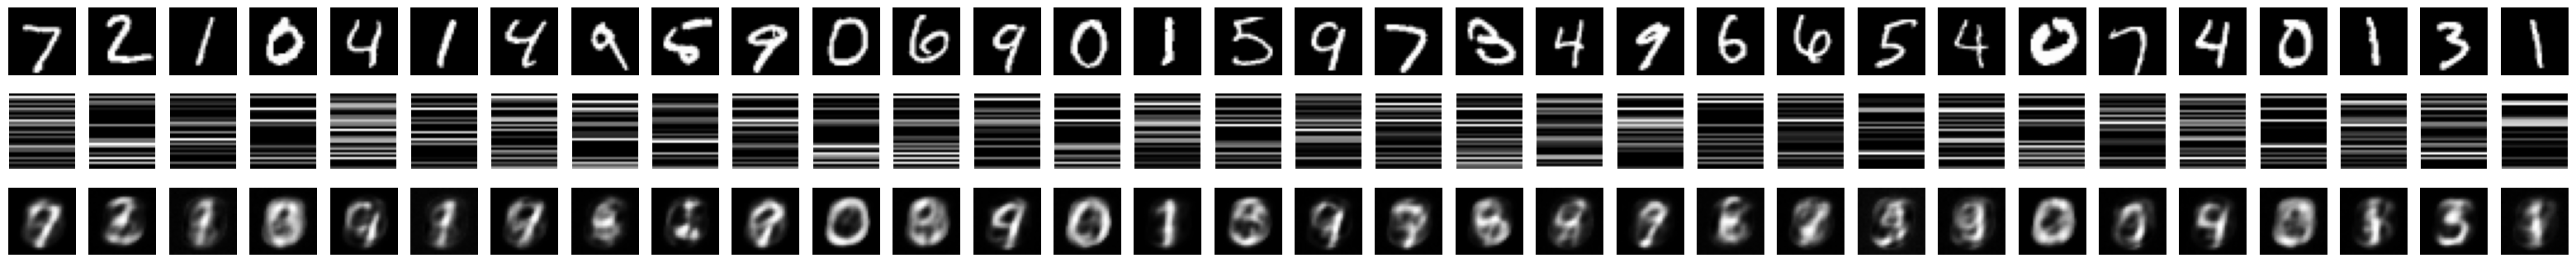

  1/938 [..............................] - ETA: 1:15 - loss: 0.0415

  3/938 [..............................] - ETA: 34s - loss: 0.0433 

  5/938 [..............................] - ETA: 34s - loss: 0.0426

  7/938 [..............................] - ETA: 34s - loss: 0.0421

  9/938 [..............................] - ETA: 34s - loss: 0.0424

 11/938 [..............................] - ETA: 35s - loss: 0.0425

 13/938 [..............................] - ETA: 35s - loss: 0.0428

 15/938 [..............................] - ETA: 35s - loss: 0.0429

 17/938 [..............................] - ETA: 34s - loss: 0.0431

 19/938 [..............................] - ETA: 34s - loss: 0.0433

 21/938 [..............................] - ETA: 34s - loss: 0.0434

 23/938 [..............................] - ETA: 34s - loss: 0.0437

 25/938 [..............................] - ETA: 34s - loss: 0.0436

 27/938 [..............................] - ETA: 34s - loss: 0.0436

 29/938 [..............................] - ETA: 33s - loss: 0.0435

 31/938 [..............................] - ETA: 33s - loss: 0.0435

 33/938 [>.............................] - ETA: 33s - loss: 0.0436

 35/938 [>.............................] - ETA: 33s - loss: 0.0436

 37/938 [>.............................] - ETA: 32s - loss: 0.0436

 39/938 [>.............................] - ETA: 32s - loss: 0.0436

 41/938 [>.............................] - ETA: 32s - loss: 0.0436

 43/938 [>.............................] - ETA: 32s - loss: 0.0437

 45/938 [>.............................] - ETA: 32s - loss: 0.0438

 47/938 [>.............................] - ETA: 32s - loss: 0.0437

 49/938 [>.............................] - ETA: 31s - loss: 0.0436

 51/938 [>.............................] - ETA: 31s - loss: 0.0435

 53/938 [>.............................] - ETA: 31s - loss: 0.0435

 55/938 [>.............................] - ETA: 31s - loss: 0.0434

 57/938 [>.............................] - ETA: 31s - loss: 0.0436

 59/938 [>.............................] - ETA: 31s - loss: 0.0436

 61/938 [>.............................] - ETA: 32s - loss: 0.0436

 63/938 [=>............................] - ETA: 32s - loss: 0.0436

 65/938 [=>............................] - ETA: 32s - loss: 0.0436

 67/938 [=>............................] - ETA: 32s - loss: 0.0435

 69/938 [=>............................] - ETA: 32s - loss: 0.0435

 71/938 [=>............................] - ETA: 32s - loss: 0.0436

 73/938 [=>............................] - ETA: 32s - loss: 0.0436

 75/938 [=>............................] - ETA: 31s - loss: 0.0438

 77/938 [=>............................] - ETA: 32s - loss: 0.0439

 79/938 [=>............................] - ETA: 32s - loss: 0.0439

 81/938 [=>............................] - ETA: 31s - loss: 0.0439

 83/938 [=>............................] - ETA: 31s - loss: 0.0439

 85/938 [=>............................] - ETA: 31s - loss: 0.0440

 87/938 [=>............................] - ETA: 31s - loss: 0.0440

 89/938 [=>............................] - ETA: 31s - loss: 0.0440

 91/938 [=>............................] - ETA: 31s - loss: 0.0439

 93/938 [=>............................] - ETA: 31s - loss: 0.0439

 95/938 [==>...........................] - ETA: 31s - loss: 0.0440

 97/938 [==>...........................] - ETA: 31s - loss: 0.0440

 99/938 [==>...........................] - ETA: 30s - loss: 0.0440

101/938 [==>...........................] - ETA: 30s - loss: 0.0440

103/938 [==>...........................] - ETA: 30s - loss: 0.0440

105/938 [==>...........................] - ETA: 30s - loss: 0.0439

107/938 [==>...........................] - ETA: 30s - loss: 0.0439

109/938 [==>...........................] - ETA: 30s - loss: 0.0439

111/938 [==>...........................] - ETA: 30s - loss: 0.0439

113/938 [==>...........................] - ETA: 30s - loss: 0.0439

115/938 [==>...........................] - ETA: 30s - loss: 0.0439

117/938 [==>...........................] - ETA: 30s - loss: 0.0439

119/938 [==>...........................] - ETA: 30s - loss: 0.0438

121/938 [==>...........................] - ETA: 30s - loss: 0.0438

123/938 [==>...........................] - ETA: 30s - loss: 0.0439

124/938 [==>...........................] - ETA: 30s - loss: 0.0439

126/938 [===>..........................] - ETA: 30s - loss: 0.0439

128/938 [===>..........................] - ETA: 30s - loss: 0.0439

129/938 [===>..........................] - ETA: 30s - loss: 0.0439

130/938 [===>..........................] - ETA: 30s - loss: 0.0439

132/938 [===>..........................] - ETA: 30s - loss: 0.0439

133/938 [===>..........................] - ETA: 30s - loss: 0.0439

135/938 [===>..........................] - ETA: 30s - loss: 0.0440

137/938 [===>..........................] - ETA: 30s - loss: 0.0440

139/938 [===>..........................] - ETA: 30s - loss: 0.0440

141/938 [===>..........................] - ETA: 30s - loss: 0.0440

143/938 [===>..........................] - ETA: 30s - loss: 0.0439

144/938 [===>..........................] - ETA: 30s - loss: 0.0439

146/938 [===>..........................] - ETA: 30s - loss: 0.0439

147/938 [===>..........................] - ETA: 30s - loss: 0.0439

148/938 [===>..........................] - ETA: 30s - loss: 0.0440

150/938 [===>..........................] - ETA: 30s - loss: 0.0440

152/938 [===>..........................] - ETA: 30s - loss: 0.0440

153/938 [===>..........................] - ETA: 30s - loss: 0.0440

155/938 [===>..........................] - ETA: 30s - loss: 0.0440

157/938 [====>.........................] - ETA: 30s - loss: 0.0440

158/938 [====>.........................] - ETA: 30s - loss: 0.0440

159/938 [====>.........................] - ETA: 30s - loss: 0.0440

161/938 [====>.........................] - ETA: 30s - loss: 0.0441

163/938 [====>.........................] - ETA: 30s - loss: 0.0441

165/938 [====>.........................] - ETA: 30s - loss: 0.0440

167/938 [====>.........................] - ETA: 30s - loss: 0.0440

169/938 [====>.........................] - ETA: 30s - loss: 0.0440

171/938 [====>.........................] - ETA: 30s - loss: 0.0440

173/938 [====>.........................] - ETA: 30s - loss: 0.0440

175/938 [====>.........................] - ETA: 30s - loss: 0.0439

177/938 [====>.........................] - ETA: 30s - loss: 0.0439

179/938 [====>.........................] - ETA: 29s - loss: 0.0439

180/938 [====>.........................] - ETA: 29s - loss: 0.0439

182/938 [====>.........................] - ETA: 29s - loss: 0.0439

184/938 [====>.........................] - ETA: 29s - loss: 0.0439

186/938 [====>.........................] - ETA: 29s - loss: 0.0438

188/938 [=====>........................] - ETA: 29s - loss: 0.0438

190/938 [=====>........................] - ETA: 29s - loss: 0.0438

192/938 [=====>........................] - ETA: 29s - loss: 0.0439

194/938 [=====>........................] - ETA: 29s - loss: 0.0439

196/938 [=====>........................] - ETA: 29s - loss: 0.0439

197/938 [=====>........................] - ETA: 29s - loss: 0.0439

199/938 [=====>........................] - ETA: 29s - loss: 0.0439

201/938 [=====>........................] - ETA: 29s - loss: 0.0439

202/938 [=====>........................] - ETA: 29s - loss: 0.0439

203/938 [=====>........................] - ETA: 29s - loss: 0.0440

204/938 [=====>........................] - ETA: 29s - loss: 0.0440

205/938 [=====>........................] - ETA: 29s - loss: 0.0440

206/938 [=====>........................] - ETA: 29s - loss: 0.0440

208/938 [=====>........................] - ETA: 29s - loss: 0.0440

210/938 [=====>........................] - ETA: 29s - loss: 0.0440

211/938 [=====>........................] - ETA: 29s - loss: 0.0440

212/938 [=====>........................] - ETA: 29s - loss: 0.0440

214/938 [=====>........................] - ETA: 29s - loss: 0.0440

215/938 [=====>........................] - ETA: 29s - loss: 0.0440

217/938 [=====>........................] - ETA: 29s - loss: 0.0440

219/938 [======>.......................] - ETA: 28s - loss: 0.0440

220/938 [======>.......................] - ETA: 28s - loss: 0.0441

221/938 [======>.......................] - ETA: 28s - loss: 0.0441

222/938 [======>.......................] - ETA: 28s - loss: 0.0441

223/938 [======>.......................] - ETA: 28s - loss: 0.0441

224/938 [======>.......................] - ETA: 28s - loss: 0.0441

226/938 [======>.......................] - ETA: 28s - loss: 0.0441

227/938 [======>.......................] - ETA: 28s - loss: 0.0441

228/938 [======>.......................] - ETA: 28s - loss: 0.0441

230/938 [======>.......................] - ETA: 28s - loss: 0.0442

231/938 [======>.......................] - ETA: 28s - loss: 0.0442

233/938 [======>.......................] - ETA: 28s - loss: 0.0442

235/938 [======>.......................] - ETA: 28s - loss: 0.0442

237/938 [======>.......................] - ETA: 28s - loss: 0.0442

238/938 [======>.......................] - ETA: 28s - loss: 0.0442

239/938 [======>.......................] - ETA: 28s - loss: 0.0442

240/938 [======>.......................] - ETA: 28s - loss: 0.0442

241/938 [======>.......................] - ETA: 28s - loss: 0.0442

243/938 [======>.......................] - ETA: 28s - loss: 0.0442

245/938 [======>.......................] - ETA: 28s - loss: 0.0442

246/938 [======>.......................] - ETA: 28s - loss: 0.0442

248/938 [======>.......................] - ETA: 28s - loss: 0.0442

250/938 [======>.......................] - ETA: 28s - loss: 0.0442

252/938 [=======>......................] - ETA: 28s - loss: 0.0442

254/938 [=======>......................] - ETA: 28s - loss: 0.0442

256/938 [=======>......................] - ETA: 28s - loss: 0.0441

258/938 [=======>......................] - ETA: 28s - loss: 0.0441

260/938 [=======>......................] - ETA: 28s - loss: 0.0441

262/938 [=======>......................] - ETA: 28s - loss: 0.0441

264/938 [=======>......................] - ETA: 27s - loss: 0.0441

266/938 [=======>......................] - ETA: 27s - loss: 0.0441

268/938 [=======>......................] - ETA: 27s - loss: 0.0441

269/938 [=======>......................] - ETA: 27s - loss: 0.0441

271/938 [=======>......................] - ETA: 27s - loss: 0.0441

273/938 [=======>......................] - ETA: 27s - loss: 0.0441

274/938 [=======>......................] - ETA: 27s - loss: 0.0441

275/938 [=======>......................] - ETA: 27s - loss: 0.0441

276/938 [=======>......................] - ETA: 27s - loss: 0.0441

277/938 [=======>......................] - ETA: 27s - loss: 0.0441

278/938 [=======>......................] - ETA: 27s - loss: 0.0441

280/938 [=======>......................] - ETA: 27s - loss: 0.0441

282/938 [========>.....................] - ETA: 27s - loss: 0.0441

284/938 [========>.....................] - ETA: 27s - loss: 0.0441

286/938 [========>.....................] - ETA: 27s - loss: 0.0440

288/938 [========>.....................] - ETA: 27s - loss: 0.0440

290/938 [========>.....................] - ETA: 27s - loss: 0.0440

292/938 [========>.....................] - ETA: 26s - loss: 0.0440

294/938 [========>.....................] - ETA: 26s - loss: 0.0440

296/938 [========>.....................] - ETA: 26s - loss: 0.0440

298/938 [========>.....................] - ETA: 26s - loss: 0.0440

299/938 [========>.....................] - ETA: 26s - loss: 0.0440

300/938 [========>.....................] - ETA: 26s - loss: 0.0440

301/938 [========>.....................] - ETA: 26s - loss: 0.0440

303/938 [========>.....................] - ETA: 26s - loss: 0.0440

305/938 [========>.....................] - ETA: 26s - loss: 0.0440

307/938 [========>.....................] - ETA: 26s - loss: 0.0440

308/938 [========>.....................] - ETA: 26s - loss: 0.0440

309/938 [========>.....................] - ETA: 26s - loss: 0.0440

310/938 [========>.....................] - ETA: 26s - loss: 0.0440

312/938 [========>.....................] - ETA: 26s - loss: 0.0440

314/938 [=========>....................] - ETA: 26s - loss: 0.0441

316/938 [=========>....................] - ETA: 26s - loss: 0.0441

318/938 [=========>....................] - ETA: 25s - loss: 0.0440

320/938 [=========>....................] - ETA: 25s - loss: 0.0440

322/938 [=========>....................] - ETA: 25s - loss: 0.0440

324/938 [=========>....................] - ETA: 25s - loss: 0.0440

326/938 [=========>....................] - ETA: 25s - loss: 0.0440

328/938 [=========>....................] - ETA: 25s - loss: 0.0440

330/938 [=========>....................] - ETA: 25s - loss: 0.0440

332/938 [=========>....................] - ETA: 25s - loss: 0.0440

334/938 [=========>....................] - ETA: 25s - loss: 0.0440

336/938 [=========>....................] - ETA: 25s - loss: 0.0440

338/938 [=========>....................] - ETA: 25s - loss: 0.0440

340/938 [=========>....................] - ETA: 24s - loss: 0.0440

342/938 [=========>....................] - ETA: 24s - loss: 0.0440

344/938 [==========>...................] - ETA: 24s - loss: 0.0440

346/938 [==========>...................] - ETA: 24s - loss: 0.0440

348/938 [==========>...................] - ETA: 24s - loss: 0.0440

349/938 [==========>...................] - ETA: 24s - loss: 0.0440

351/938 [==========>...................] - ETA: 24s - loss: 0.0440

353/938 [==========>...................] - ETA: 24s - loss: 0.0440

355/938 [==========>...................] - ETA: 24s - loss: 0.0440

357/938 [==========>...................] - ETA: 24s - loss: 0.0440

359/938 [==========>...................] - ETA: 24s - loss: 0.0440

360/938 [==========>...................] - ETA: 24s - loss: 0.0441

362/938 [==========>...................] - ETA: 24s - loss: 0.0441

364/938 [==========>...................] - ETA: 23s - loss: 0.0441

366/938 [==========>...................] - ETA: 23s - loss: 0.0441

368/938 [==========>...................] - ETA: 23s - loss: 0.0441

370/938 [==========>...................] - ETA: 23s - loss: 0.0441

372/938 [==========>...................] - ETA: 23s - loss: 0.0441

374/938 [==========>...................] - ETA: 23s - loss: 0.0441

376/938 [===========>..................] - ETA: 23s - loss: 0.0441

378/938 [===========>..................] - ETA: 23s - loss: 0.0440

380/938 [===========>..................] - ETA: 23s - loss: 0.0440

382/938 [===========>..................] - ETA: 23s - loss: 0.0440

384/938 [===========>..................] - ETA: 23s - loss: 0.0440

386/938 [===========>..................] - ETA: 23s - loss: 0.0440

388/938 [===========>..................] - ETA: 22s - loss: 0.0440

390/938 [===========>..................] - ETA: 22s - loss: 0.0440

392/938 [===========>..................] - ETA: 22s - loss: 0.0440

394/938 [===========>..................] - ETA: 22s - loss: 0.0440

396/938 [===========>..................] - ETA: 22s - loss: 0.0440

398/938 [===========>..................] - ETA: 22s - loss: 0.0440

400/938 [===========>..................] - ETA: 22s - loss: 0.0440

401/938 [===========>..................] - ETA: 22s - loss: 0.0440

403/938 [===========>..................] - ETA: 22s - loss: 0.0440

405/938 [===========>..................] - ETA: 22s - loss: 0.0439

407/938 [============>.................] - ETA: 22s - loss: 0.0439

409/938 [============>.................] - ETA: 22s - loss: 0.0439

411/938 [============>.................] - ETA: 21s - loss: 0.0439

413/938 [============>.................] - ETA: 21s - loss: 0.0439

415/938 [============>.................] - ETA: 21s - loss: 0.0439

417/938 [============>.................] - ETA: 21s - loss: 0.0439

419/938 [============>.................] - ETA: 21s - loss: 0.0439

421/938 [============>.................] - ETA: 21s - loss: 0.0439

423/938 [============>.................] - ETA: 21s - loss: 0.0439

425/938 [============>.................] - ETA: 21s - loss: 0.0439

427/938 [============>.................] - ETA: 21s - loss: 0.0439

429/938 [============>.................] - ETA: 21s - loss: 0.0439

431/938 [============>.................] - ETA: 21s - loss: 0.0439

433/938 [============>.................] - ETA: 20s - loss: 0.0439

434/938 [============>.................] - ETA: 20s - loss: 0.0439

436/938 [============>.................] - ETA: 20s - loss: 0.0439

438/938 [=============>................] - ETA: 20s - loss: 0.0439

439/938 [=============>................] - ETA: 20s - loss: 0.0439

441/938 [=============>................] - ETA: 20s - loss: 0.0439

443/938 [=============>................] - ETA: 20s - loss: 0.0439

444/938 [=============>................] - ETA: 20s - loss: 0.0439

446/938 [=============>................] - ETA: 20s - loss: 0.0439

448/938 [=============>................] - ETA: 20s - loss: 0.0439

450/938 [=============>................] - ETA: 20s - loss: 0.0439

452/938 [=============>................] - ETA: 20s - loss: 0.0439

454/938 [=============>................] - ETA: 20s - loss: 0.0439

456/938 [=============>................] - ETA: 20s - loss: 0.0439

458/938 [=============>................] - ETA: 19s - loss: 0.0439

460/938 [=============>................] - ETA: 19s - loss: 0.0439

462/938 [=============>................] - ETA: 19s - loss: 0.0439

464/938 [=============>................] - ETA: 19s - loss: 0.0439

466/938 [=============>................] - ETA: 19s - loss: 0.0438

468/938 [=============>................] - ETA: 19s - loss: 0.0438

470/938 [==============>...............] - ETA: 19s - loss: 0.0438

472/938 [==============>...............] - ETA: 19s - loss: 0.0438

474/938 [==============>...............] - ETA: 19s - loss: 0.0438

476/938 [==============>...............] - ETA: 19s - loss: 0.0438

478/938 [==============>...............] - ETA: 19s - loss: 0.0438

480/938 [==============>...............] - ETA: 18s - loss: 0.0438

482/938 [==============>...............] - ETA: 18s - loss: 0.0438

484/938 [==============>...............] - ETA: 18s - loss: 0.0438

486/938 [==============>...............] - ETA: 18s - loss: 0.0438

488/938 [==============>...............] - ETA: 18s - loss: 0.0438

490/938 [==============>...............] - ETA: 18s - loss: 0.0438

492/938 [==============>...............] - ETA: 18s - loss: 0.0438

494/938 [==============>...............] - ETA: 18s - loss: 0.0438

496/938 [==============>...............] - ETA: 18s - loss: 0.0438

498/938 [==============>...............] - ETA: 18s - loss: 0.0438

500/938 [==============>...............] - ETA: 18s - loss: 0.0438

502/938 [===============>..............] - ETA: 17s - loss: 0.0438

504/938 [===============>..............] - ETA: 17s - loss: 0.0437

506/938 [===============>..............] - ETA: 17s - loss: 0.0437

508/938 [===============>..............] - ETA: 17s - loss: 0.0438

510/938 [===============>..............] - ETA: 17s - loss: 0.0438

512/938 [===============>..............] - ETA: 17s - loss: 0.0437

514/938 [===============>..............] - ETA: 17s - loss: 0.0437

516/938 [===============>..............] - ETA: 17s - loss: 0.0437

518/938 [===============>..............] - ETA: 17s - loss: 0.0437

520/938 [===============>..............] - ETA: 17s - loss: 0.0437

522/938 [===============>..............] - ETA: 17s - loss: 0.0437

524/938 [===============>..............] - ETA: 17s - loss: 0.0437

526/938 [===============>..............] - ETA: 16s - loss: 0.0437

528/938 [===============>..............] - ETA: 16s - loss: 0.0437

530/938 [===============>..............] - ETA: 16s - loss: 0.0437

532/938 [================>.............] - ETA: 16s - loss: 0.0437

534/938 [================>.............] - ETA: 16s - loss: 0.0437

536/938 [================>.............] - ETA: 16s - loss: 0.0437

538/938 [================>.............] - ETA: 16s - loss: 0.0437

540/938 [================>.............] - ETA: 16s - loss: 0.0437

542/938 [================>.............] - ETA: 16s - loss: 0.0437

544/938 [================>.............] - ETA: 16s - loss: 0.0437

546/938 [================>.............] - ETA: 16s - loss: 0.0437

548/938 [================>.............] - ETA: 16s - loss: 0.0437

550/938 [================>.............] - ETA: 15s - loss: 0.0437

552/938 [================>.............] - ETA: 15s - loss: 0.0436

554/938 [================>.............] - ETA: 15s - loss: 0.0436

556/938 [================>.............] - ETA: 15s - loss: 0.0436

558/938 [================>.............] - ETA: 15s - loss: 0.0436

560/938 [================>.............] - ETA: 15s - loss: 0.0436

562/938 [================>.............] - ETA: 15s - loss: 0.0436

563/938 [=================>............] - ETA: 15s - loss: 0.0436

564/938 [=================>............] - ETA: 15s - loss: 0.0436

565/938 [=================>............] - ETA: 15s - loss: 0.0436

566/938 [=================>............] - ETA: 15s - loss: 0.0436

568/938 [=================>............] - ETA: 15s - loss: 0.0437

569/938 [=================>............] - ETA: 15s - loss: 0.0437

571/938 [=================>............] - ETA: 15s - loss: 0.0437

572/938 [=================>............] - ETA: 15s - loss: 0.0437

573/938 [=================>............] - ETA: 15s - loss: 0.0437

575/938 [=================>............] - ETA: 14s - loss: 0.0437

576/938 [=================>............] - ETA: 14s - loss: 0.0437

577/938 [=================>............] - ETA: 14s - loss: 0.0437

579/938 [=================>............] - ETA: 14s - loss: 0.0436

580/938 [=================>............] - ETA: 14s - loss: 0.0436

581/938 [=================>............] - ETA: 14s - loss: 0.0436

583/938 [=================>............] - ETA: 14s - loss: 0.0437

585/938 [=================>............] - ETA: 14s - loss: 0.0437

587/938 [=================>............] - ETA: 14s - loss: 0.0437

588/938 [=================>............] - ETA: 14s - loss: 0.0437

589/938 [=================>............] - ETA: 14s - loss: 0.0437

591/938 [=================>............] - ETA: 14s - loss: 0.0437

593/938 [=================>............] - ETA: 14s - loss: 0.0437

595/938 [==================>...........] - ETA: 14s - loss: 0.0436

597/938 [==================>...........] - ETA: 14s - loss: 0.0436

599/938 [==================>...........] - ETA: 14s - loss: 0.0436

601/938 [==================>...........] - ETA: 13s - loss: 0.0436

603/938 [==================>...........] - ETA: 13s - loss: 0.0436

605/938 [==================>...........] - ETA: 13s - loss: 0.0436

607/938 [==================>...........] - ETA: 13s - loss: 0.0436

609/938 [==================>...........] - ETA: 13s - loss: 0.0436

611/938 [==================>...........] - ETA: 13s - loss: 0.0436

613/938 [==================>...........] - ETA: 13s - loss: 0.0436

615/938 [==================>...........] - ETA: 13s - loss: 0.0436

617/938 [==================>...........] - ETA: 13s - loss: 0.0436

619/938 [==================>...........] - ETA: 13s - loss: 0.0436

621/938 [==================>...........] - ETA: 13s - loss: 0.0436

623/938 [==================>...........] - ETA: 13s - loss: 0.0436

625/938 [==================>...........] - ETA: 12s - loss: 0.0436

627/938 [===================>..........] - ETA: 12s - loss: 0.0436

629/938 [===================>..........] - ETA: 12s - loss: 0.0436

631/938 [===================>..........] - ETA: 12s - loss: 0.0436

633/938 [===================>..........] - ETA: 12s - loss: 0.0436

635/938 [===================>..........] - ETA: 12s - loss: 0.0436

637/938 [===================>..........] - ETA: 12s - loss: 0.0436

639/938 [===================>..........] - ETA: 12s - loss: 0.0436

641/938 [===================>..........] - ETA: 12s - loss: 0.0436

642/938 [===================>..........] - ETA: 12s - loss: 0.0436

643/938 [===================>..........] - ETA: 12s - loss: 0.0436

645/938 [===================>..........] - ETA: 12s - loss: 0.0436

646/938 [===================>..........] - ETA: 12s - loss: 0.0436

648/938 [===================>..........] - ETA: 12s - loss: 0.0436

650/938 [===================>..........] - ETA: 11s - loss: 0.0436

652/938 [===================>..........] - ETA: 11s - loss: 0.0436

654/938 [===================>..........] - ETA: 11s - loss: 0.0436

656/938 [===================>..........] - ETA: 11s - loss: 0.0436

658/938 [====================>.........] - ETA: 11s - loss: 0.0436

660/938 [====================>.........] - ETA: 11s - loss: 0.0436

662/938 [====================>.........] - ETA: 11s - loss: 0.0436

664/938 [====================>.........] - ETA: 11s - loss: 0.0436

666/938 [====================>.........] - ETA: 11s - loss: 0.0436

668/938 [====================>.........] - ETA: 11s - loss: 0.0436

670/938 [====================>.........] - ETA: 11s - loss: 0.0436

672/938 [====================>.........] - ETA: 10s - loss: 0.0436

674/938 [====================>.........] - ETA: 10s - loss: 0.0436

676/938 [====================>.........] - ETA: 10s - loss: 0.0436

678/938 [====================>.........] - ETA: 10s - loss: 0.0436

680/938 [====================>.........] - ETA: 10s - loss: 0.0435

682/938 [====================>.........] - ETA: 10s - loss: 0.0435

684/938 [====================>.........] - ETA: 10s - loss: 0.0435

686/938 [====================>.........] - ETA: 10s - loss: 0.0435

688/938 [=====================>........] - ETA: 10s - loss: 0.0435

690/938 [=====================>........] - ETA: 10s - loss: 0.0435

691/938 [=====================>........] - ETA: 10s - loss: 0.0435

693/938 [=====================>........] - ETA: 10s - loss: 0.0435

695/938 [=====================>........] - ETA: 10s - loss: 0.0435

697/938 [=====================>........] - ETA: 9s - loss: 0.0435 

699/938 [=====================>........] - ETA: 9s - loss: 0.0435

701/938 [=====================>........] - ETA: 9s - loss: 0.0435

703/938 [=====================>........] - ETA: 9s - loss: 0.0435

705/938 [=====================>........] - ETA: 9s - loss: 0.0435

707/938 [=====================>........] - ETA: 9s - loss: 0.0435

709/938 [=====================>........] - ETA: 9s - loss: 0.0435

711/938 [=====================>........] - ETA: 9s - loss: 0.0435

713/938 [=====================>........] - ETA: 9s - loss: 0.0435

715/938 [=====================>........] - ETA: 9s - loss: 0.0435

717/938 [=====================>........] - ETA: 9s - loss: 0.0435

719/938 [=====================>........] - ETA: 9s - loss: 0.0435

721/938 [======================>.......] - ETA: 8s - loss: 0.0435

723/938 [======================>.......] - ETA: 8s - loss: 0.0435

725/938 [======================>.......] - ETA: 8s - loss: 0.0435

726/938 [======================>.......] - ETA: 8s - loss: 0.0435

727/938 [======================>.......] - ETA: 8s - loss: 0.0435

729/938 [======================>.......] - ETA: 8s - loss: 0.0435

731/938 [======================>.......] - ETA: 8s - loss: 0.0435

733/938 [======================>.......] - ETA: 8s - loss: 0.0435

735/938 [======================>.......] - ETA: 8s - loss: 0.0435

737/938 [======================>.......] - ETA: 8s - loss: 0.0435

739/938 [======================>.......] - ETA: 8s - loss: 0.0435

740/938 [======================>.......] - ETA: 8s - loss: 0.0434

742/938 [======================>.......] - ETA: 8s - loss: 0.0434

744/938 [======================>.......] - ETA: 7s - loss: 0.0435

746/938 [======================>.......] - ETA: 7s - loss: 0.0435

748/938 [======================>.......] - ETA: 7s - loss: 0.0435

750/938 [======================>.......] - ETA: 7s - loss: 0.0435

752/938 [=======================>......] - ETA: 7s - loss: 0.0435

754/938 [=======================>......] - ETA: 7s - loss: 0.0435

756/938 [=======================>......] - ETA: 7s - loss: 0.0435

758/938 [=======================>......] - ETA: 7s - loss: 0.0435

759/938 [=======================>......] - ETA: 7s - loss: 0.0435

761/938 [=======================>......] - ETA: 7s - loss: 0.0435

763/938 [=======================>......] - ETA: 7s - loss: 0.0435

765/938 [=======================>......] - ETA: 7s - loss: 0.0435

766/938 [=======================>......] - ETA: 7s - loss: 0.0435

768/938 [=======================>......] - ETA: 7s - loss: 0.0435

770/938 [=======================>......] - ETA: 6s - loss: 0.0435

772/938 [=======================>......] - ETA: 6s - loss: 0.0435

774/938 [=======================>......] - ETA: 6s - loss: 0.0435

776/938 [=======================>......] - ETA: 6s - loss: 0.0435

778/938 [=======================>......] - ETA: 6s - loss: 0.0435

780/938 [=======================>......] - ETA: 6s - loss: 0.0435

782/938 [========================>.....] - ETA: 6s - loss: 0.0435

784/938 [========================>.....] - ETA: 6s - loss: 0.0435

786/938 [========================>.....] - ETA: 6s - loss: 0.0434

788/938 [========================>.....] - ETA: 6s - loss: 0.0434

790/938 [========================>.....] - ETA: 6s - loss: 0.0434

791/938 [========================>.....] - ETA: 6s - loss: 0.0434

793/938 [========================>.....] - ETA: 5s - loss: 0.0434

795/938 [========================>.....] - ETA: 5s - loss: 0.0434

797/938 [========================>.....] - ETA: 5s - loss: 0.0434

799/938 [========================>.....] - ETA: 5s - loss: 0.0434

801/938 [========================>.....] - ETA: 5s - loss: 0.0434

803/938 [========================>.....] - ETA: 5s - loss: 0.0434

805/938 [========================>.....] - ETA: 5s - loss: 0.0434

807/938 [========================>.....] - ETA: 5s - loss: 0.0434

809/938 [========================>.....] - ETA: 5s - loss: 0.0434

811/938 [========================>.....] - ETA: 5s - loss: 0.0434

813/938 [=========================>....] - ETA: 5s - loss: 0.0434

815/938 [=========================>....] - ETA: 5s - loss: 0.0434

817/938 [=========================>....] - ETA: 4s - loss: 0.0434

819/938 [=========================>....] - ETA: 4s - loss: 0.0434

821/938 [=========================>....] - ETA: 4s - loss: 0.0434

823/938 [=========================>....] - ETA: 4s - loss: 0.0434

825/938 [=========================>....] - ETA: 4s - loss: 0.0434

827/938 [=========================>....] - ETA: 4s - loss: 0.0434

829/938 [=========================>....] - ETA: 4s - loss: 0.0434

831/938 [=========================>....] - ETA: 4s - loss: 0.0434

833/938 [=========================>....] - ETA: 4s - loss: 0.0434

835/938 [=========================>....] - ETA: 4s - loss: 0.0434

837/938 [=========================>....] - ETA: 4s - loss: 0.0433

839/938 [=========================>....] - ETA: 4s - loss: 0.0433

841/938 [=========================>....] - ETA: 3s - loss: 0.0433

843/938 [=========================>....] - ETA: 3s - loss: 0.0433

844/938 [=========================>....] - ETA: 3s - loss: 0.0433

846/938 [==========================>...] - ETA: 3s - loss: 0.0433

848/938 [==========================>...] - ETA: 3s - loss: 0.0433

850/938 [==========================>...] - ETA: 3s - loss: 0.0433

852/938 [==========================>...] - ETA: 3s - loss: 0.0433

854/938 [==========================>...] - ETA: 3s - loss: 0.0433

856/938 [==========================>...] - ETA: 3s - loss: 0.0433

858/938 [==========================>...] - ETA: 3s - loss: 0.0433

860/938 [==========================>...] - ETA: 3s - loss: 0.0433

862/938 [==========================>...] - ETA: 3s - loss: 0.0433

864/938 [==========================>...] - ETA: 3s - loss: 0.0433

866/938 [==========================>...] - ETA: 2s - loss: 0.0433

868/938 [==========================>...] - ETA: 2s - loss: 0.0433

870/938 [==========================>...] - ETA: 2s - loss: 0.0433

872/938 [==========================>...] - ETA: 2s - loss: 0.0433

874/938 [==========================>...] - ETA: 2s - loss: 0.0433

876/938 [===========================>..] - ETA: 2s - loss: 0.0433

878/938 [===========================>..] - ETA: 2s - loss: 0.0433

880/938 [===========================>..] - ETA: 2s - loss: 0.0433

882/938 [===========================>..] - ETA: 2s - loss: 0.0433

884/938 [===========================>..] - ETA: 2s - loss: 0.0433

886/938 [===========================>..] - ETA: 2s - loss: 0.0433

888/938 [===========================>..] - ETA: 2s - loss: 0.0433

890/938 [===========================>..] - ETA: 1s - loss: 0.0433

892/938 [===========================>..] - ETA: 1s - loss: 0.0432

894/938 [===========================>..] - ETA: 1s - loss: 0.0432

896/938 [===========================>..] - ETA: 1s - loss: 0.0432

898/938 [===========================>..] - ETA: 1s - loss: 0.0432

900/938 [===========================>..] - ETA: 1s - loss: 0.0432

902/938 [===========================>..] - ETA: 1s - loss: 0.0432

904/938 [===========================>..] - ETA: 1s - loss: 0.0432

906/938 [===========================>..] - ETA: 1s - loss: 0.0432

908/938 [============================>.] - ETA: 1s - loss: 0.0432

910/938 [============================>.] - ETA: 1s - loss: 0.0432

912/938 [============================>.] - ETA: 1s - loss: 0.0432

914/938 [============================>.] - ETA: 0s - loss: 0.0432

916/938 [============================>.] - ETA: 0s - loss: 0.0432

918/938 [============================>.] - ETA: 0s - loss: 0.0432

920/938 [============================>.] - ETA: 0s - loss: 0.0432

922/938 [============================>.] - ETA: 0s - loss: 0.0432

924/938 [============================>.] - ETA: 0s - loss: 0.0432

925/938 [============================>.] - ETA: 0s - loss: 0.0432

927/938 [============================>.] - ETA: 0s - loss: 0.0432

929/938 [============================>.] - ETA: 0s - loss: 0.0432

931/938 [============================>.] - ETA: 0s - loss: 0.0432

933/938 [============================>.] - ETA: 0s - loss: 0.0432

935/938 [============================>.] - ETA: 0s - loss: 0.0432

937/938 [============================>.] - ETA: 0s - loss: 0.0432

938/938 [==============================] - 41s 44ms/step - loss: 0.0432 - val_loss: 0.0416
batch_vals = tf.Tensor(
[[  0  41   0  14 179   0 125   0   0  45  95  58  86  88   0   0 109   0
    0 142  54   0  22   0   0   0   0   0   0  16   0 129]
 [  0 247   0   0   0   0 153 107   0   0   0 212  46 171  24   0   0   0
    0  33 139   0  89   0  43 205   0 122  34  36   0  45]
 [  0 203   0   0  26   0 245   4   0   0   0   0 176  86   0  29  30   0
    0  73   0   2  52   0   0 224   0  89   0  64   0  18]
 [  0 134 143 189  21   0  21  54   0  23   0 170   0 109   0  81  50   0
  112  44   0   0  66  86  65   0   0 156   0  53   0 162]
 [  0 115   0 154 112   0 216 298   0  66   0  63   0  51   0   0   0  39
   89   0   0  82 206   0 165 162   0 230   0  93   0   8]
 [  0  34  31  55   0  90 190 138   0   1   0  77 130 115   0   0   0   0
    0 127   0  70  94   0   0   7   0 150   0   0   0 142]
 [  0 130   0   0  74   0 225  48   0   0  94 248 125 119   0   0 204  27
  130  54   0

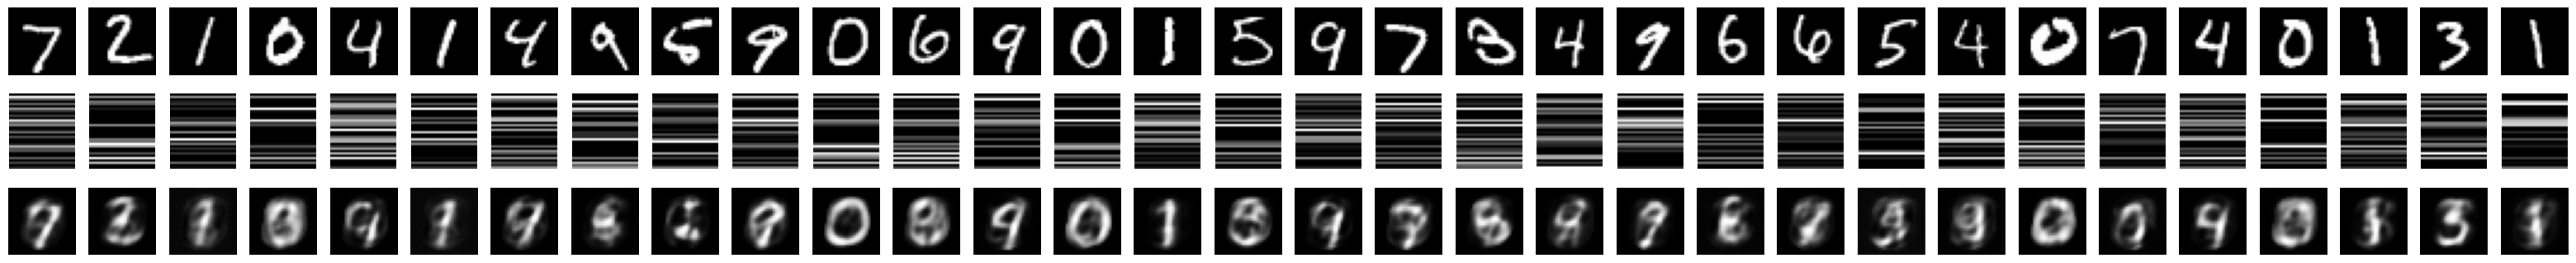

  1/938 [..............................] - ETA: 1:17 - loss: 0.0388

  3/938 [..............................] - ETA: 39s - loss: 0.0399 

  5/938 [..............................] - ETA: 38s - loss: 0.0399

  7/938 [..............................] - ETA: 38s - loss: 0.0395

  8/938 [..............................] - ETA: 39s - loss: 0.0398

 10/938 [..............................] - ETA: 38s - loss: 0.0400

 12/938 [..............................] - ETA: 38s - loss: 0.0399

 14/938 [..............................] - ETA: 38s - loss: 0.0404

 16/938 [..............................] - ETA: 37s - loss: 0.0405

 18/938 [..............................] - ETA: 37s - loss: 0.0407

 20/938 [..............................] - ETA: 37s - loss: 0.0409

 22/938 [..............................] - ETA: 37s - loss: 0.0411

 24/938 [..............................] - ETA: 36s - loss: 0.0412

 26/938 [..............................] - ETA: 36s - loss: 0.0411

 28/938 [..............................] - ETA: 36s - loss: 0.0412

 30/938 [..............................] - ETA: 36s - loss: 0.0410

 32/938 [>.............................] - ETA: 36s - loss: 0.0412

 34/938 [>.............................] - ETA: 36s - loss: 0.0412

 36/938 [>.............................] - ETA: 36s - loss: 0.0413

 38/938 [>.............................] - ETA: 36s - loss: 0.0412

 40/938 [>.............................] - ETA: 36s - loss: 0.0412

 42/938 [>.............................] - ETA: 35s - loss: 0.0412

 44/938 [>.............................] - ETA: 35s - loss: 0.0413

 46/938 [>.............................] - ETA: 35s - loss: 0.0413

 48/938 [>.............................] - ETA: 35s - loss: 0.0412

 50/938 [>.............................] - ETA: 35s - loss: 0.0412

 52/938 [>.............................] - ETA: 35s - loss: 0.0411

 54/938 [>.............................] - ETA: 35s - loss: 0.0410

 56/938 [>.............................] - ETA: 35s - loss: 0.0411

 58/938 [>.............................] - ETA: 35s - loss: 0.0412

 60/938 [>.............................] - ETA: 34s - loss: 0.0412

 61/938 [>.............................] - ETA: 35s - loss: 0.0412

 63/938 [=>............................] - ETA: 34s - loss: 0.0412

 65/938 [=>............................] - ETA: 34s - loss: 0.0412

 67/938 [=>............................] - ETA: 34s - loss: 0.0411

 69/938 [=>............................] - ETA: 34s - loss: 0.0411

 71/938 [=>............................] - ETA: 34s - loss: 0.0411

 73/938 [=>............................] - ETA: 34s - loss: 0.0412

 75/938 [=>............................] - ETA: 34s - loss: 0.0414

 77/938 [=>............................] - ETA: 34s - loss: 0.0415

 79/938 [=>............................] - ETA: 34s - loss: 0.0415

 81/938 [=>............................] - ETA: 34s - loss: 0.0415

 83/938 [=>............................] - ETA: 34s - loss: 0.0415

 85/938 [=>............................] - ETA: 33s - loss: 0.0415

 87/938 [=>............................] - ETA: 34s - loss: 0.0416

 89/938 [=>............................] - ETA: 33s - loss: 0.0415

 91/938 [=>............................] - ETA: 33s - loss: 0.0415

 93/938 [=>............................] - ETA: 33s - loss: 0.0415

 95/938 [==>...........................] - ETA: 33s - loss: 0.0416

 97/938 [==>...........................] - ETA: 33s - loss: 0.0416

 99/938 [==>...........................] - ETA: 33s - loss: 0.0416

101/938 [==>...........................] - ETA: 33s - loss: 0.0416

103/938 [==>...........................] - ETA: 33s - loss: 0.0415

105/938 [==>...........................] - ETA: 33s - loss: 0.0415

107/938 [==>...........................] - ETA: 33s - loss: 0.0415

109/938 [==>...........................] - ETA: 32s - loss: 0.0414

111/938 [==>...........................] - ETA: 32s - loss: 0.0414

113/938 [==>...........................] - ETA: 32s - loss: 0.0414

115/938 [==>...........................] - ETA: 32s - loss: 0.0415

117/938 [==>...........................] - ETA: 32s - loss: 0.0414

119/938 [==>...........................] - ETA: 32s - loss: 0.0414

121/938 [==>...........................] - ETA: 32s - loss: 0.0414

123/938 [==>...........................] - ETA: 32s - loss: 0.0415

125/938 [==>...........................] - ETA: 32s - loss: 0.0415

127/938 [===>..........................] - ETA: 32s - loss: 0.0415

129/938 [===>..........................] - ETA: 31s - loss: 0.0415

131/938 [===>..........................] - ETA: 31s - loss: 0.0415

133/938 [===>..........................] - ETA: 31s - loss: 0.0415

135/938 [===>..........................] - ETA: 31s - loss: 0.0415

137/938 [===>..........................] - ETA: 31s - loss: 0.0416

139/938 [===>..........................] - ETA: 31s - loss: 0.0416

140/938 [===>..........................] - ETA: 31s - loss: 0.0416

142/938 [===>..........................] - ETA: 31s - loss: 0.0415

144/938 [===>..........................] - ETA: 31s - loss: 0.0415

146/938 [===>..........................] - ETA: 31s - loss: 0.0415

148/938 [===>..........................] - ETA: 31s - loss: 0.0416

150/938 [===>..........................] - ETA: 31s - loss: 0.0416

152/938 [===>..........................] - ETA: 31s - loss: 0.0416

154/938 [===>..........................] - ETA: 30s - loss: 0.0416

156/938 [===>..........................] - ETA: 30s - loss: 0.0416

158/938 [====>.........................] - ETA: 30s - loss: 0.0416

160/938 [====>.........................] - ETA: 30s - loss: 0.0416

162/938 [====>.........................] - ETA: 30s - loss: 0.0417

164/938 [====>.........................] - ETA: 30s - loss: 0.0417

166/938 [====>.........................] - ETA: 30s - loss: 0.0416

168/938 [====>.........................] - ETA: 30s - loss: 0.0416

170/938 [====>.........................] - ETA: 30s - loss: 0.0416

172/938 [====>.........................] - ETA: 30s - loss: 0.0416

174/938 [====>.........................] - ETA: 30s - loss: 0.0416

176/938 [====>.........................] - ETA: 30s - loss: 0.0415

178/938 [====>.........................] - ETA: 30s - loss: 0.0415

180/938 [====>.........................] - ETA: 29s - loss: 0.0415

182/938 [====>.........................] - ETA: 29s - loss: 0.0415

184/938 [====>.........................] - ETA: 29s - loss: 0.0415

186/938 [====>.........................] - ETA: 29s - loss: 0.0415

188/938 [=====>........................] - ETA: 29s - loss: 0.0415

190/938 [=====>........................] - ETA: 29s - loss: 0.0415

192/938 [=====>........................] - ETA: 29s - loss: 0.0415

194/938 [=====>........................] - ETA: 29s - loss: 0.0415

196/938 [=====>........................] - ETA: 29s - loss: 0.0415

198/938 [=====>........................] - ETA: 29s - loss: 0.0415

200/938 [=====>........................] - ETA: 29s - loss: 0.0416

202/938 [=====>........................] - ETA: 29s - loss: 0.0416

203/938 [=====>........................] - ETA: 29s - loss: 0.0416

205/938 [=====>........................] - ETA: 29s - loss: 0.0416

207/938 [=====>........................] - ETA: 28s - loss: 0.0416

209/938 [=====>........................] - ETA: 28s - loss: 0.0416

211/938 [=====>........................] - ETA: 28s - loss: 0.0417

213/938 [=====>........................] - ETA: 28s - loss: 0.0416

215/938 [=====>........................] - ETA: 28s - loss: 0.0417

217/938 [=====>........................] - ETA: 28s - loss: 0.0417

218/938 [=====>........................] - ETA: 28s - loss: 0.0417

220/938 [======>.......................] - ETA: 28s - loss: 0.0417

222/938 [======>.......................] - ETA: 28s - loss: 0.0417

224/938 [======>.......................] - ETA: 28s - loss: 0.0418

226/938 [======>.......................] - ETA: 28s - loss: 0.0418

228/938 [======>.......................] - ETA: 28s - loss: 0.0418

230/938 [======>.......................] - ETA: 28s - loss: 0.0418

231/938 [======>.......................] - ETA: 28s - loss: 0.0418

233/938 [======>.......................] - ETA: 28s - loss: 0.0418

235/938 [======>.......................] - ETA: 27s - loss: 0.0418

237/938 [======>.......................] - ETA: 27s - loss: 0.0418

239/938 [======>.......................] - ETA: 27s - loss: 0.0418

241/938 [======>.......................] - ETA: 27s - loss: 0.0418

243/938 [======>.......................] - ETA: 27s - loss: 0.0418

245/938 [======>.......................] - ETA: 27s - loss: 0.0418

247/938 [======>.......................] - ETA: 27s - loss: 0.0418

249/938 [======>.......................] - ETA: 27s - loss: 0.0418

251/938 [=======>......................] - ETA: 27s - loss: 0.0418

253/938 [=======>......................] - ETA: 27s - loss: 0.0418

255/938 [=======>......................] - ETA: 27s - loss: 0.0418

257/938 [=======>......................] - ETA: 27s - loss: 0.0418

259/938 [=======>......................] - ETA: 27s - loss: 0.0418

260/938 [=======>......................] - ETA: 27s - loss: 0.0417

261/938 [=======>......................] - ETA: 27s - loss: 0.0417

263/938 [=======>......................] - ETA: 27s - loss: 0.0418

264/938 [=======>......................] - ETA: 27s - loss: 0.0418

266/938 [=======>......................] - ETA: 27s - loss: 0.0418

267/938 [=======>......................] - ETA: 27s - loss: 0.0418

269/938 [=======>......................] - ETA: 27s - loss: 0.0418

270/938 [=======>......................] - ETA: 27s - loss: 0.0418

272/938 [=======>......................] - ETA: 27s - loss: 0.0418

274/938 [=======>......................] - ETA: 26s - loss: 0.0418

275/938 [=======>......................] - ETA: 26s - loss: 0.0418

276/938 [=======>......................] - ETA: 26s - loss: 0.0418

278/938 [=======>......................] - ETA: 26s - loss: 0.0418

279/938 [=======>......................] - ETA: 26s - loss: 0.0418

281/938 [=======>......................] - ETA: 26s - loss: 0.0418

283/938 [========>.....................] - ETA: 26s - loss: 0.0418

284/938 [========>.....................] - ETA: 26s - loss: 0.0417

286/938 [========>.....................] - ETA: 26s - loss: 0.0417

288/938 [========>.....................] - ETA: 26s - loss: 0.0417

289/938 [========>.....................] - ETA: 26s - loss: 0.0417

291/938 [========>.....................] - ETA: 26s - loss: 0.0417

293/938 [========>.....................] - ETA: 26s - loss: 0.0417

294/938 [========>.....................] - ETA: 26s - loss: 0.0417

295/938 [========>.....................] - ETA: 26s - loss: 0.0417

297/938 [========>.....................] - ETA: 26s - loss: 0.0417

298/938 [========>.....................] - ETA: 26s - loss: 0.0417

299/938 [========>.....................] - ETA: 26s - loss: 0.0417

300/938 [========>.....................] - ETA: 26s - loss: 0.0417

301/938 [========>.....................] - ETA: 26s - loss: 0.0417

303/938 [========>.....................] - ETA: 26s - loss: 0.0417

304/938 [========>.....................] - ETA: 26s - loss: 0.0417

306/938 [========>.....................] - ETA: 26s - loss: 0.0417

308/938 [========>.....................] - ETA: 26s - loss: 0.0417

309/938 [========>.....................] - ETA: 26s - loss: 0.0417

310/938 [========>.....................] - ETA: 26s - loss: 0.0417

311/938 [========>.....................] - ETA: 25s - loss: 0.0417

312/938 [========>.....................] - ETA: 25s - loss: 0.0417

314/938 [=========>....................] - ETA: 25s - loss: 0.0418

316/938 [=========>....................] - ETA: 25s - loss: 0.0418

317/938 [=========>....................] - ETA: 25s - loss: 0.0418

319/938 [=========>....................] - ETA: 25s - loss: 0.0417

320/938 [=========>....................] - ETA: 25s - loss: 0.0417

322/938 [=========>....................] - ETA: 25s - loss: 0.0417

324/938 [=========>....................] - ETA: 25s - loss: 0.0417

326/938 [=========>....................] - ETA: 25s - loss: 0.0417

328/938 [=========>....................] - ETA: 25s - loss: 0.0417

330/938 [=========>....................] - ETA: 25s - loss: 0.0417

332/938 [=========>....................] - ETA: 25s - loss: 0.0417

334/938 [=========>....................] - ETA: 25s - loss: 0.0417

336/938 [=========>....................] - ETA: 25s - loss: 0.0417

338/938 [=========>....................] - ETA: 25s - loss: 0.0417

339/938 [=========>....................] - ETA: 24s - loss: 0.0417

341/938 [=========>....................] - ETA: 24s - loss: 0.0417

342/938 [=========>....................] - ETA: 24s - loss: 0.0417

343/938 [=========>....................] - ETA: 24s - loss: 0.0417

345/938 [==========>...................] - ETA: 24s - loss: 0.0417

346/938 [==========>...................] - ETA: 24s - loss: 0.0417

348/938 [==========>...................] - ETA: 24s - loss: 0.0417

350/938 [==========>...................] - ETA: 24s - loss: 0.0417

352/938 [==========>...................] - ETA: 24s - loss: 0.0417

354/938 [==========>...................] - ETA: 24s - loss: 0.0417

356/938 [==========>...................] - ETA: 24s - loss: 0.0418

358/938 [==========>...................] - ETA: 24s - loss: 0.0418

360/938 [==========>...................] - ETA: 24s - loss: 0.0418

361/938 [==========>...................] - ETA: 24s - loss: 0.0418

363/938 [==========>...................] - ETA: 24s - loss: 0.0418

365/938 [==========>...................] - ETA: 24s - loss: 0.0418

367/938 [==========>...................] - ETA: 23s - loss: 0.0418

368/938 [==========>...................] - ETA: 23s - loss: 0.0418

370/938 [==========>...................] - ETA: 23s - loss: 0.0418

372/938 [==========>...................] - ETA: 23s - loss: 0.0418

373/938 [==========>...................] - ETA: 23s - loss: 0.0418

374/938 [==========>...................] - ETA: 23s - loss: 0.0418

376/938 [===========>..................] - ETA: 23s - loss: 0.0418

377/938 [===========>..................] - ETA: 23s - loss: 0.0418

379/938 [===========>..................] - ETA: 23s - loss: 0.0418

381/938 [===========>..................] - ETA: 23s - loss: 0.0418

382/938 [===========>..................] - ETA: 23s - loss: 0.0418

383/938 [===========>..................] - ETA: 23s - loss: 0.0418

384/938 [===========>..................] - ETA: 23s - loss: 0.0418

385/938 [===========>..................] - ETA: 23s - loss: 0.0418

386/938 [===========>..................] - ETA: 23s - loss: 0.0418

388/938 [===========>..................] - ETA: 23s - loss: 0.0418

390/938 [===========>..................] - ETA: 23s - loss: 0.0418

392/938 [===========>..................] - ETA: 23s - loss: 0.0417

394/938 [===========>..................] - ETA: 23s - loss: 0.0417

396/938 [===========>..................] - ETA: 22s - loss: 0.0417

398/938 [===========>..................] - ETA: 22s - loss: 0.0417

400/938 [===========>..................] - ETA: 22s - loss: 0.0417

402/938 [===========>..................] - ETA: 22s - loss: 0.0417

404/938 [===========>..................] - ETA: 22s - loss: 0.0417

405/938 [===========>..................] - ETA: 22s - loss: 0.0417

407/938 [============>.................] - ETA: 22s - loss: 0.0417

408/938 [============>.................] - ETA: 22s - loss: 0.0417

410/938 [============>.................] - ETA: 22s - loss: 0.0417

412/938 [============>.................] - ETA: 22s - loss: 0.0417

414/938 [============>.................] - ETA: 22s - loss: 0.0417

416/938 [============>.................] - ETA: 22s - loss: 0.0417

418/938 [============>.................] - ETA: 22s - loss: 0.0417

419/938 [============>.................] - ETA: 22s - loss: 0.0416

420/938 [============>.................] - ETA: 22s - loss: 0.0416

422/938 [============>.................] - ETA: 21s - loss: 0.0416

424/938 [============>.................] - ETA: 21s - loss: 0.0416

426/938 [============>.................] - ETA: 21s - loss: 0.0417

428/938 [============>.................] - ETA: 21s - loss: 0.0417

430/938 [============>.................] - ETA: 21s - loss: 0.0417

432/938 [============>.................] - ETA: 21s - loss: 0.0417

434/938 [============>.................] - ETA: 21s - loss: 0.0417

436/938 [============>.................] - ETA: 21s - loss: 0.0417

438/938 [=============>................] - ETA: 21s - loss: 0.0417

440/938 [=============>................] - ETA: 21s - loss: 0.0416

442/938 [=============>................] - ETA: 21s - loss: 0.0416

444/938 [=============>................] - ETA: 20s - loss: 0.0416

446/938 [=============>................] - ETA: 20s - loss: 0.0417

448/938 [=============>................] - ETA: 20s - loss: 0.0416

450/938 [=============>................] - ETA: 20s - loss: 0.0416

452/938 [=============>................] - ETA: 20s - loss: 0.0417

453/938 [=============>................] - ETA: 20s - loss: 0.0417

454/938 [=============>................] - ETA: 20s - loss: 0.0417

456/938 [=============>................] - ETA: 20s - loss: 0.0417

457/938 [=============>................] - ETA: 20s - loss: 0.0417

459/938 [=============>................] - ETA: 20s - loss: 0.0417

461/938 [=============>................] - ETA: 20s - loss: 0.0416

463/938 [=============>................] - ETA: 20s - loss: 0.0416

465/938 [=============>................] - ETA: 20s - loss: 0.0416

467/938 [=============>................] - ETA: 19s - loss: 0.0416

469/938 [==============>...............] - ETA: 19s - loss: 0.0416

471/938 [==============>...............] - ETA: 19s - loss: 0.0416

473/938 [==============>...............] - ETA: 19s - loss: 0.0416

475/938 [==============>...............] - ETA: 19s - loss: 0.0416

477/938 [==============>...............] - ETA: 19s - loss: 0.0416

479/938 [==============>...............] - ETA: 19s - loss: 0.0416

481/938 [==============>...............] - ETA: 19s - loss: 0.0416

483/938 [==============>...............] - ETA: 19s - loss: 0.0416

485/938 [==============>...............] - ETA: 19s - loss: 0.0416

487/938 [==============>...............] - ETA: 19s - loss: 0.0416

489/938 [==============>...............] - ETA: 19s - loss: 0.0416

491/938 [==============>...............] - ETA: 18s - loss: 0.0416

493/938 [==============>...............] - ETA: 18s - loss: 0.0416

495/938 [==============>...............] - ETA: 18s - loss: 0.0416

497/938 [==============>...............] - ETA: 18s - loss: 0.0416

499/938 [==============>...............] - ETA: 18s - loss: 0.0416

501/938 [===============>..............] - ETA: 18s - loss: 0.0416

503/938 [===============>..............] - ETA: 18s - loss: 0.0416

505/938 [===============>..............] - ETA: 18s - loss: 0.0416

507/938 [===============>..............] - ETA: 18s - loss: 0.0416

509/938 [===============>..............] - ETA: 18s - loss: 0.0416

511/938 [===============>..............] - ETA: 18s - loss: 0.0416

513/938 [===============>..............] - ETA: 17s - loss: 0.0416

515/938 [===============>..............] - ETA: 17s - loss: 0.0416

517/938 [===============>..............] - ETA: 17s - loss: 0.0416

519/938 [===============>..............] - ETA: 17s - loss: 0.0416

521/938 [===============>..............] - ETA: 17s - loss: 0.0416

523/938 [===============>..............] - ETA: 17s - loss: 0.0416

525/938 [===============>..............] - ETA: 17s - loss: 0.0416

526/938 [===============>..............] - ETA: 17s - loss: 0.0416

528/938 [===============>..............] - ETA: 17s - loss: 0.0415

530/938 [===============>..............] - ETA: 17s - loss: 0.0415

531/938 [===============>..............] - ETA: 17s - loss: 0.0415

533/938 [================>.............] - ETA: 17s - loss: 0.0415

535/938 [================>.............] - ETA: 16s - loss: 0.0415

537/938 [================>.............] - ETA: 16s - loss: 0.0415

539/938 [================>.............] - ETA: 16s - loss: 0.0415

541/938 [================>.............] - ETA: 16s - loss: 0.0415

542/938 [================>.............] - ETA: 16s - loss: 0.0415

544/938 [================>.............] - ETA: 16s - loss: 0.0415

546/938 [================>.............] - ETA: 16s - loss: 0.0415

548/938 [================>.............] - ETA: 16s - loss: 0.0415

550/938 [================>.............] - ETA: 16s - loss: 0.0415

552/938 [================>.............] - ETA: 16s - loss: 0.0415

554/938 [================>.............] - ETA: 16s - loss: 0.0415

556/938 [================>.............] - ETA: 16s - loss: 0.0415

558/938 [================>.............] - ETA: 16s - loss: 0.0415

560/938 [================>.............] - ETA: 15s - loss: 0.0415

562/938 [================>.............] - ETA: 15s - loss: 0.0415

564/938 [=================>............] - ETA: 15s - loss: 0.0415

566/938 [=================>............] - ETA: 15s - loss: 0.0415

568/938 [=================>............] - ETA: 15s - loss: 0.0415

570/938 [=================>............] - ETA: 15s - loss: 0.0415

572/938 [=================>............] - ETA: 15s - loss: 0.0415

574/938 [=================>............] - ETA: 15s - loss: 0.0415

576/938 [=================>............] - ETA: 15s - loss: 0.0415

578/938 [=================>............] - ETA: 15s - loss: 0.0415

580/938 [=================>............] - ETA: 15s - loss: 0.0415

582/938 [=================>............] - ETA: 14s - loss: 0.0415

584/938 [=================>............] - ETA: 14s - loss: 0.0415

585/938 [=================>............] - ETA: 14s - loss: 0.0415

587/938 [=================>............] - ETA: 14s - loss: 0.0415

589/938 [=================>............] - ETA: 14s - loss: 0.0415

591/938 [=================>............] - ETA: 14s - loss: 0.0415

593/938 [=================>............] - ETA: 14s - loss: 0.0415

595/938 [==================>...........] - ETA: 14s - loss: 0.0415

596/938 [==================>...........] - ETA: 14s - loss: 0.0415

598/938 [==================>...........] - ETA: 14s - loss: 0.0415

600/938 [==================>...........] - ETA: 14s - loss: 0.0415

601/938 [==================>...........] - ETA: 14s - loss: 0.0415

603/938 [==================>...........] - ETA: 14s - loss: 0.0415

605/938 [==================>...........] - ETA: 13s - loss: 0.0415

607/938 [==================>...........] - ETA: 13s - loss: 0.0415

609/938 [==================>...........] - ETA: 13s - loss: 0.0415

611/938 [==================>...........] - ETA: 13s - loss: 0.0415

613/938 [==================>...........] - ETA: 13s - loss: 0.0415

615/938 [==================>...........] - ETA: 13s - loss: 0.0415

617/938 [==================>...........] - ETA: 13s - loss: 0.0415

619/938 [==================>...........] - ETA: 13s - loss: 0.0415

621/938 [==================>...........] - ETA: 13s - loss: 0.0415

623/938 [==================>...........] - ETA: 13s - loss: 0.0415

625/938 [==================>...........] - ETA: 13s - loss: 0.0415

627/938 [===================>..........] - ETA: 13s - loss: 0.0415

629/938 [===================>..........] - ETA: 12s - loss: 0.0415

631/938 [===================>..........] - ETA: 12s - loss: 0.0415

633/938 [===================>..........] - ETA: 12s - loss: 0.0415

635/938 [===================>..........] - ETA: 12s - loss: 0.0415

637/938 [===================>..........] - ETA: 12s - loss: 0.0415

639/938 [===================>..........] - ETA: 12s - loss: 0.0415

641/938 [===================>..........] - ETA: 12s - loss: 0.0415

643/938 [===================>..........] - ETA: 12s - loss: 0.0415

645/938 [===================>..........] - ETA: 12s - loss: 0.0415

647/938 [===================>..........] - ETA: 12s - loss: 0.0415

649/938 [===================>..........] - ETA: 12s - loss: 0.0415

651/938 [===================>..........] - ETA: 11s - loss: 0.0415

653/938 [===================>..........] - ETA: 11s - loss: 0.0415

655/938 [===================>..........] - ETA: 11s - loss: 0.0415

657/938 [====================>.........] - ETA: 11s - loss: 0.0415

659/938 [====================>.........] - ETA: 11s - loss: 0.0415

661/938 [====================>.........] - ETA: 11s - loss: 0.0415

663/938 [====================>.........] - ETA: 11s - loss: 0.0415

665/938 [====================>.........] - ETA: 11s - loss: 0.0415

667/938 [====================>.........] - ETA: 11s - loss: 0.0415

669/938 [====================>.........] - ETA: 11s - loss: 0.0415

671/938 [====================>.........] - ETA: 11s - loss: 0.0415

673/938 [====================>.........] - ETA: 11s - loss: 0.0415

675/938 [====================>.........] - ETA: 10s - loss: 0.0415

676/938 [====================>.........] - ETA: 10s - loss: 0.0415

678/938 [====================>.........] - ETA: 10s - loss: 0.0415

680/938 [====================>.........] - ETA: 10s - loss: 0.0415

682/938 [====================>.........] - ETA: 10s - loss: 0.0414

684/938 [====================>.........] - ETA: 10s - loss: 0.0414

686/938 [====================>.........] - ETA: 10s - loss: 0.0414

688/938 [=====================>........] - ETA: 10s - loss: 0.0414

690/938 [=====================>........] - ETA: 10s - loss: 0.0414

692/938 [=====================>........] - ETA: 10s - loss: 0.0414

693/938 [=====================>........] - ETA: 10s - loss: 0.0414

695/938 [=====================>........] - ETA: 10s - loss: 0.0414

697/938 [=====================>........] - ETA: 10s - loss: 0.0414

699/938 [=====================>........] - ETA: 9s - loss: 0.0414 

701/938 [=====================>........] - ETA: 9s - loss: 0.0414

703/938 [=====================>........] - ETA: 9s - loss: 0.0414

705/938 [=====================>........] - ETA: 9s - loss: 0.0414

707/938 [=====================>........] - ETA: 9s - loss: 0.0414

709/938 [=====================>........] - ETA: 9s - loss: 0.0414

711/938 [=====================>........] - ETA: 9s - loss: 0.0414

713/938 [=====================>........] - ETA: 9s - loss: 0.0414

715/938 [=====================>........] - ETA: 9s - loss: 0.0414

717/938 [=====================>........] - ETA: 9s - loss: 0.0414

719/938 [=====================>........] - ETA: 9s - loss: 0.0414

721/938 [======================>.......] - ETA: 9s - loss: 0.0414

723/938 [======================>.......] - ETA: 8s - loss: 0.0414

725/938 [======================>.......] - ETA: 8s - loss: 0.0414

727/938 [======================>.......] - ETA: 8s - loss: 0.0414

729/938 [======================>.......] - ETA: 8s - loss: 0.0414

731/938 [======================>.......] - ETA: 8s - loss: 0.0414

733/938 [======================>.......] - ETA: 8s - loss: 0.0414

735/938 [======================>.......] - ETA: 8s - loss: 0.0414

737/938 [======================>.......] - ETA: 8s - loss: 0.0414

739/938 [======================>.......] - ETA: 8s - loss: 0.0414

741/938 [======================>.......] - ETA: 8s - loss: 0.0414

743/938 [======================>.......] - ETA: 8s - loss: 0.0414

745/938 [======================>.......] - ETA: 7s - loss: 0.0414

746/938 [======================>.......] - ETA: 7s - loss: 0.0414

748/938 [======================>.......] - ETA: 7s - loss: 0.0414

750/938 [======================>.......] - ETA: 7s - loss: 0.0414

752/938 [=======================>......] - ETA: 7s - loss: 0.0414

754/938 [=======================>......] - ETA: 7s - loss: 0.0414

756/938 [=======================>......] - ETA: 7s - loss: 0.0414

758/938 [=======================>......] - ETA: 7s - loss: 0.0414

760/938 [=======================>......] - ETA: 7s - loss: 0.0414

762/938 [=======================>......] - ETA: 7s - loss: 0.0414

764/938 [=======================>......] - ETA: 7s - loss: 0.0414

766/938 [=======================>......] - ETA: 7s - loss: 0.0414

768/938 [=======================>......] - ETA: 7s - loss: 0.0414

770/938 [=======================>......] - ETA: 6s - loss: 0.0414

772/938 [=======================>......] - ETA: 6s - loss: 0.0414

774/938 [=======================>......] - ETA: 6s - loss: 0.0414

776/938 [=======================>......] - ETA: 6s - loss: 0.0414

778/938 [=======================>......] - ETA: 6s - loss: 0.0414

780/938 [=======================>......] - ETA: 6s - loss: 0.0414

782/938 [========================>.....] - ETA: 6s - loss: 0.0414

784/938 [========================>.....] - ETA: 6s - loss: 0.0414

786/938 [========================>.....] - ETA: 6s - loss: 0.0414

788/938 [========================>.....] - ETA: 6s - loss: 0.0414

790/938 [========================>.....] - ETA: 6s - loss: 0.0414

792/938 [========================>.....] - ETA: 6s - loss: 0.0414

794/938 [========================>.....] - ETA: 5s - loss: 0.0414

796/938 [========================>.....] - ETA: 5s - loss: 0.0414

798/938 [========================>.....] - ETA: 5s - loss: 0.0414

800/938 [========================>.....] - ETA: 5s - loss: 0.0414

802/938 [========================>.....] - ETA: 5s - loss: 0.0414

804/938 [========================>.....] - ETA: 5s - loss: 0.0414

806/938 [========================>.....] - ETA: 5s - loss: 0.0414

808/938 [========================>.....] - ETA: 5s - loss: 0.0414

810/938 [========================>.....] - ETA: 5s - loss: 0.0414

812/938 [========================>.....] - ETA: 5s - loss: 0.0414

814/938 [=========================>....] - ETA: 5s - loss: 0.0414

816/938 [=========================>....] - ETA: 5s - loss: 0.0414

818/938 [=========================>....] - ETA: 4s - loss: 0.0414

820/938 [=========================>....] - ETA: 4s - loss: 0.0414

822/938 [=========================>....] - ETA: 4s - loss: 0.0414

824/938 [=========================>....] - ETA: 4s - loss: 0.0414

826/938 [=========================>....] - ETA: 4s - loss: 0.0414

828/938 [=========================>....] - ETA: 4s - loss: 0.0414

830/938 [=========================>....] - ETA: 4s - loss: 0.0414

832/938 [=========================>....] - ETA: 4s - loss: 0.0413

834/938 [=========================>....] - ETA: 4s - loss: 0.0413

836/938 [=========================>....] - ETA: 4s - loss: 0.0413

838/938 [=========================>....] - ETA: 4s - loss: 0.0413

840/938 [=========================>....] - ETA: 4s - loss: 0.0413

842/938 [=========================>....] - ETA: 3s - loss: 0.0413

844/938 [=========================>....] - ETA: 3s - loss: 0.0413

846/938 [==========================>...] - ETA: 3s - loss: 0.0413

848/938 [==========================>...] - ETA: 3s - loss: 0.0413

850/938 [==========================>...] - ETA: 3s - loss: 0.0413

852/938 [==========================>...] - ETA: 3s - loss: 0.0413

854/938 [==========================>...] - ETA: 3s - loss: 0.0413

856/938 [==========================>...] - ETA: 3s - loss: 0.0413

858/938 [==========================>...] - ETA: 3s - loss: 0.0413

860/938 [==========================>...] - ETA: 3s - loss: 0.0413

862/938 [==========================>...] - ETA: 3s - loss: 0.0413

864/938 [==========================>...] - ETA: 3s - loss: 0.0413

866/938 [==========================>...] - ETA: 2s - loss: 0.0413

868/938 [==========================>...] - ETA: 2s - loss: 0.0413

870/938 [==========================>...] - ETA: 2s - loss: 0.0413

872/938 [==========================>...] - ETA: 2s - loss: 0.0413

874/938 [==========================>...] - ETA: 2s - loss: 0.0413

876/938 [===========================>..] - ETA: 2s - loss: 0.0413

878/938 [===========================>..] - ETA: 2s - loss: 0.0413

880/938 [===========================>..] - ETA: 2s - loss: 0.0413

882/938 [===========================>..] - ETA: 2s - loss: 0.0413

884/938 [===========================>..] - ETA: 2s - loss: 0.0413

886/938 [===========================>..] - ETA: 2s - loss: 0.0413

888/938 [===========================>..] - ETA: 2s - loss: 0.0413

890/938 [===========================>..] - ETA: 1s - loss: 0.0413

892/938 [===========================>..] - ETA: 1s - loss: 0.0413

894/938 [===========================>..] - ETA: 1s - loss: 0.0413

896/938 [===========================>..] - ETA: 1s - loss: 0.0413

897/938 [===========================>..] - ETA: 1s - loss: 0.0413

898/938 [===========================>..] - ETA: 1s - loss: 0.0413

899/938 [===========================>..] - ETA: 1s - loss: 0.0413

901/938 [===========================>..] - ETA: 1s - loss: 0.0412

903/938 [===========================>..] - ETA: 1s - loss: 0.0412

905/938 [===========================>..] - ETA: 1s - loss: 0.0412

907/938 [============================>.] - ETA: 1s - loss: 0.0412

909/938 [============================>.] - ETA: 1s - loss: 0.0412

911/938 [============================>.] - ETA: 1s - loss: 0.0412

913/938 [============================>.] - ETA: 1s - loss: 0.0412

915/938 [============================>.] - ETA: 0s - loss: 0.0412

917/938 [============================>.] - ETA: 0s - loss: 0.0412

919/938 [============================>.] - ETA: 0s - loss: 0.0412

921/938 [============================>.] - ETA: 0s - loss: 0.0412

923/938 [============================>.] - ETA: 0s - loss: 0.0412

925/938 [============================>.] - ETA: 0s - loss: 0.0412

927/938 [============================>.] - ETA: 0s - loss: 0.0412

929/938 [============================>.] - ETA: 0s - loss: 0.0412

931/938 [============================>.] - ETA: 0s - loss: 0.0412

933/938 [============================>.] - ETA: 0s - loss: 0.0412

935/938 [============================>.] - ETA: 0s - loss: 0.0412

937/938 [============================>.] - ETA: 0s - loss: 0.0412

938/938 [==============================] - 44s 47ms/step - loss: 0.0412 - val_loss: 0.0401
batch_vals = tf.Tensor(
[[  0  41   0  14 179   0 125   0   0  45  95  58  86  88   0   0 109   0
    0 142  54   0  22   0   0   0   0   0   0  16   0 129]
 [  0 247   0   0   0   0 153 107   0   0   0 212  46 171  24   0   0   0
    0  33 139   0  89   0  43 205   0 122  34  36   0  45]
 [  0 203   0   0  26   0 245   4   0   0   0   0 176  86   0  29  30   0
    0  73   0   2  52   0   0 224   0  89   0  64   0  18]
 [  0 134 143 189  21   0  21  54   0  23   0 170   0 109   0  81  50   0
  112  44   0   0  66  86  65   0   0 156   0  53   0 162]
 [  0 115   0 154 112   0 216 298   0  66   0  63   0  51   0   0   0  39
   89   0   0  82 206   0 165 162   0 230   0  93   0   8]
 [  0  34  31  55   0  90 190 138   0   1   0  77 130 115   0   0   0   0
    0 127   0  70  94   0   0   7   0 150   0   0   0 142]
 [  0 130   0   0  74   0 225  48   0   0  94 248 125 119   0   0 204  27
  130  54   0

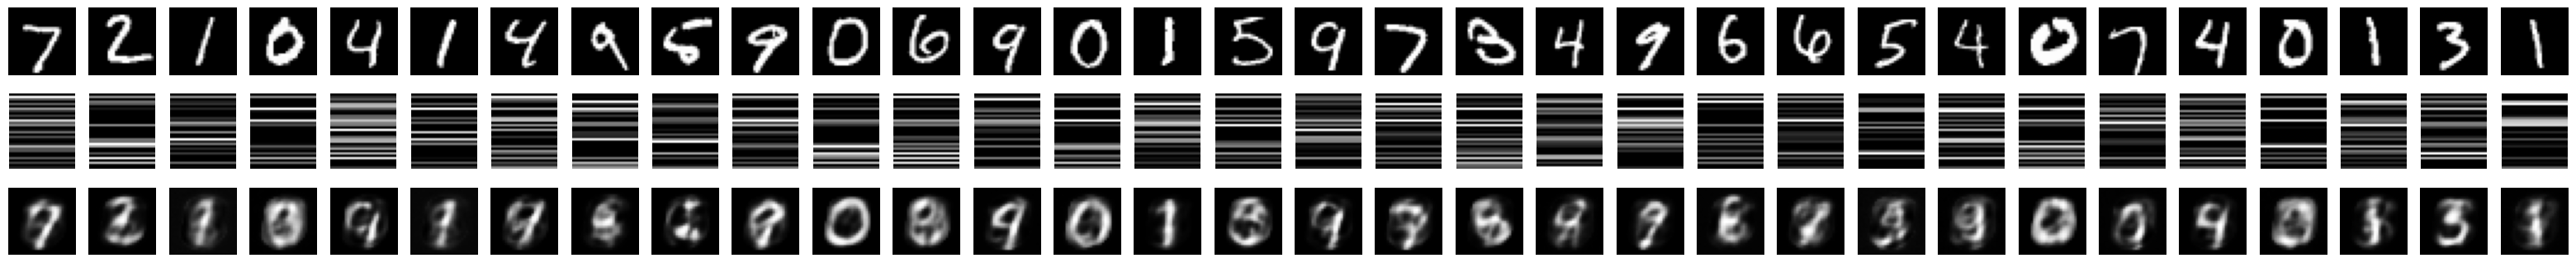

In [ ]:
# A simple autoencoder with only one hidden layer.
# Testing quantization of the latent space (wrong way).

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import Sequence
from skimage.io import imread
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from scipy.stats import entropy
#tf.compat.v1.enable_eager_execution()

# https://www.tensorflow.org/datasets/catalog/
DATASET = 'mnist'
#DATASET = 'fashion_mnist'
#URL = "https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz"

# This variable controls the number of hidden neurons. Notice that the output of a neuron is a floating point number.
LATENT_SPACE_LENGTH = 32

img_width, img_height = 28, 28
img_length = img_height * img_width

# Generate the NumPy arrays with the data.
DATA_URL = f'https://storage.googleapis.com/tensorflow/tf-keras-datasets/{DATASET}.npz'
# DATASET = 'fashion_mnist'
# DATA_URL = "https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz"
path = tf.keras.utils.get_file(f'{DATASET}.npz', DATA_URL)
with np.load(path) as data:
    x_train = data['x_train']
    y_train = data['x_train']
    x_test = data['x_test']
    y_test = data['y_test']

# Pipelines.
train_DS = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_DS = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Define how to use the datasets, preprocess, etc.

def process_x(image, label):
    # The input images are reshaped (to have only one dimension) and normalized to [0, 1].
    processed_img = tf.reshape(image, (img_height * img_width, 1))
    processed_img = tf.cast(processed_img, tf.float32) / 255.
    # The input dataset has been labeled, but labels are ignored in the rest of the pipeline.
    return processed_img, label

def process_y(image, label):
    # The output images are already in 1D. Notice that in an autoencoder, the objective is to generate the same output than the input.
    return image, image

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
train_DS = train_DS.map(process_x)
train_DS = train_DS.map(process_y)
train_DS = train_DS.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_DS = test_DS.map(process_x)
test_DS = test_DS.map(process_y)
test_DS = test_DS.batch(BATCH_SIZE)

# We add a new "layer" that performs quantization.
class Quantization_8bits(keras.layers.Layer):

    def __init__(self, units=32, **kwargs):
        super(Quantization_8bits, self).__init__(**kwargs)
        self.quantized_vals = 0

    def call(self, inputs):
        outputs = inputs
        # Round to the nearest 8-bits signed integer (and perform a casting to int8).
        outputs = tf.saturate_cast(tf.round(outputs * 255.), tf.int16)
        #outputs = tf.saturate_cast(tf.round(outputs * 255.), tf.int8)
        self.quantized_vals = outputs
        # Data must be float to be processed and normalized.
        outputs = tf.cast(outputs, tf.float32) / 255.0
        return outputs

    def get_vals(self):
        return self.quantized_vals

# Define the autoencoder.
input_layer = keras.Input(shape=(img_length,), name="inputs")
hidden_layer = layers.Dense(LATENT_SPACE_LENGTH, activation="relu")(input_layer)
quantization_layer = Quantization_8bits(units=LATENT_SPACE_LENGTH, name="quantization")(hidden_layer)
output_layer = layers.Dense(img_length, activation="sigmoid", name="outputs")(quantization_layer)

autoencoder = keras.Model(input_layer, output_layer)

# To see the latents (content of the hidden layer), we define a new "model" with only the encoder.
encoder = keras.Model(input_layer, hidden_layer)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mse", run_eagerly=True)

autoencoder.summary()

# Train.
EPOCHS = 1
ITERATIONS = 1 # Only one because the output is quite long (but you can increase this)
plt.gray()
for i in range(ITERATIONS):

    autoencoder.fit(train_DS, epochs=EPOCHS, validation_data=test_DS)

    batch_vals = autoencoder.get_layer("quantization").get_vals()
    print("batch_vals =", batch_vals)
    counter = 0
    for j in range(BATCH_SIZE):
        try:
            vals = batch_vals[j].numpy() + 512
            #print(vals)
            print(entropy(vals, base=2))
            if counter > 10:
              break
            counter += 1
        except:
            pass

    #print("2", autoencoder.get_layer("hidden").variables[1])

    # Show the learning.
    plt.figure(figsize=(40,4))

    n = len(train_DS)
    if n > 32:
        n = 32

    # Show the originals (using the pipeline).
    for images in test_DS.take(1):
        for i in range(n):
            ax = plt.subplot(3, n, i + 1)
            try:
                image = images[0][i].numpy()
                image *= 255
                image = image.astype("uint8").reshape(img_height, img_width)
                plt.imshow(image)
                #plt.gray()
                plt.axis("off")
            except:
                pass

    # See the latent space (as images).
    latent_imgs = encoder.predict(test_DS)
    #print("type latent", type(latent_imgs))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(resize(latent_imgs[i], (LATENT_SPACE_LENGTH, img_width)))
        plt.axis("off")

    # See the reconstructions.
    reconstructed_imgs = autoencoder.predict(test_DS)
    #print(type(reconstructed_imgs))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(reconstructed_imgs[i].reshape(img_height, img_width))
        plt.axis("off")

    plt.show()

Quantization is not differentiable, and for this reason the autoencoder cannot be optimized efficiently.

# Simulating the quantization noise (during training)
Let's see now what happens if during training, the quantization noise is simulated by adding uniform noise (but quantization is not performed). During the inference, the latents are truely quantized using 256 quantization levels (8 bits).

Network architecture (NFCL: Noisy FCL):

    Input -> NFCL -> Output
    28x28     32     28x28

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_13 (Dense)            (None, 32)                25120     
                                                                 
 add_noise (AddNoise)        (None, 32)                0         
                                                                 
 outputs (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 i

<Figure size 640x480 with 0 Axes>

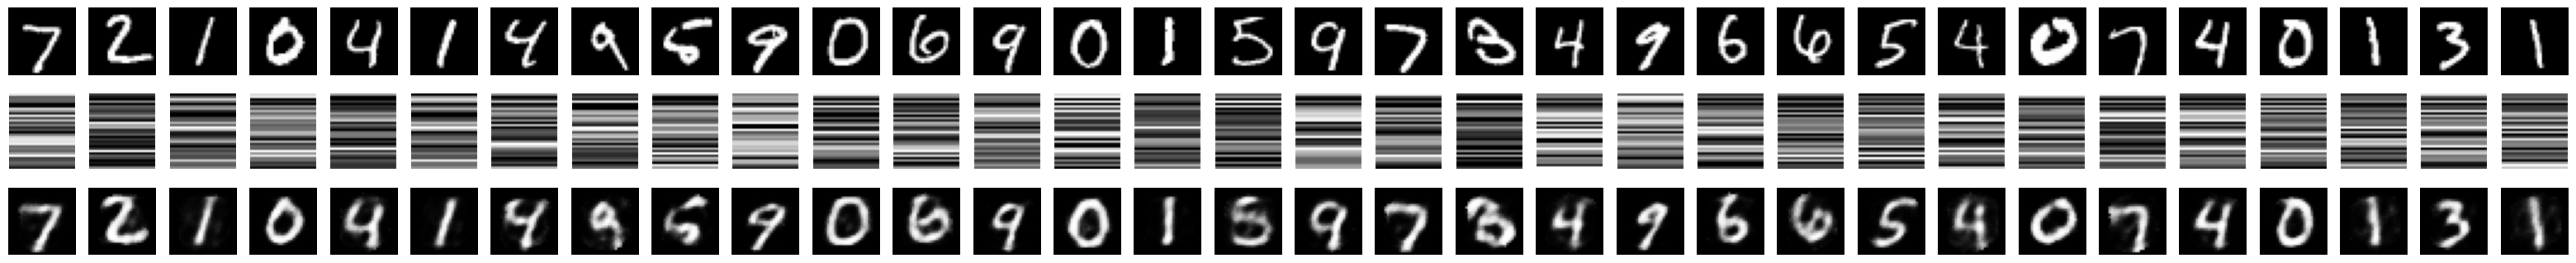

313/313 [==============================] - 3s 10ms/step
batch_vals = tf.Tensor(
[[ 587 2073 1575 1487    0 1313 3788 1553  444  611 1292 1173 1942 2385
  3485 1634  535  962 1989 1685 2302 2403  345  120 1380 1652 1229  485
  1665 1116 2190 2087]
 [1312 1580 1635 3435    0 1895 2704 3135    0 2944 1759 3034 1932 3285
  2995 2592 2127 3581 2269 1004 2401  735 3261 2274 3479 4723 4817    2
  2796 1651 2660 3223]
 [2362 3250    0 3256    0 2366 2850 3653 1303 2091 1369 2614 1078 2808
  2941 2218 1772 3262 2809 1999 3159  573 3472 1048 3345 4021 2766 2034
  3085 1339 1849 4558]
 [  76 1407 1281 1381    0  412 2622 2127 2147 3047 1235 2284  832 2193
    83 2114 2655 3254 2688 1057 2296 2850 3223 2012 1796  997  690 1563
   775 1457  897 1430]
 [1432 2571 1448 2092    0    0 1843 2923 1759 2196 1178 1506 3823 2982
   322 3595 1752 2789 1342 3360 2133 1433 4338    0 2249 3005 1320 2099
     0 1303 1509 1406]
 [2088 2418 2506 1726    0 2748 3669 1434 2711 5571 2008  603 5005 2584
  4356 3004 4

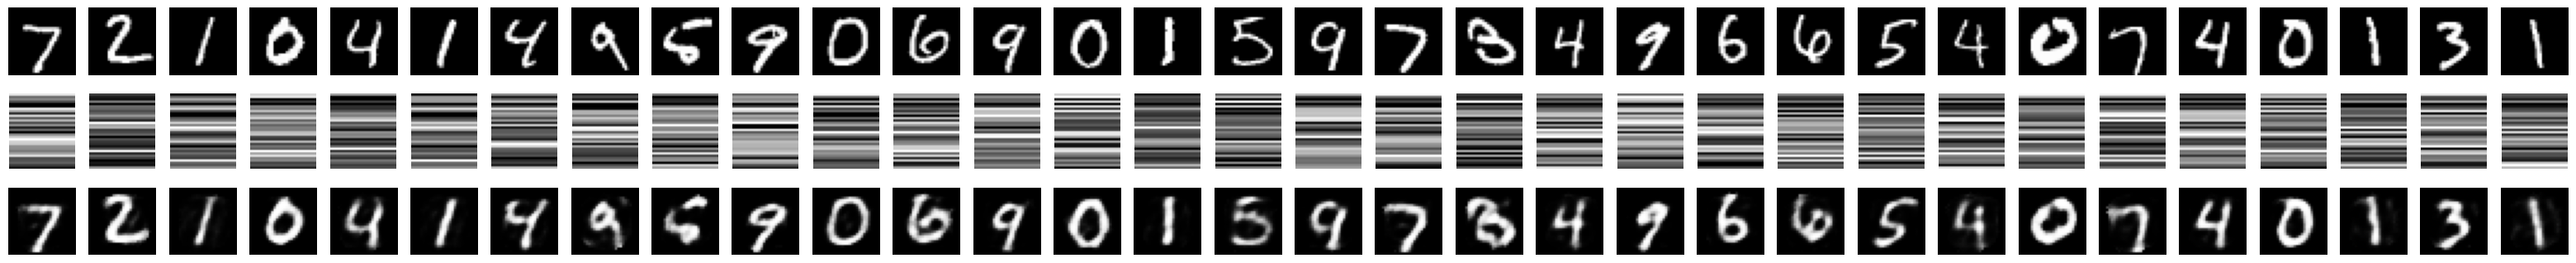

313/313 [==============================] - 3s 9ms/step
batch_vals = tf.Tensor(
[[ 870 2391 1673 1614    0 1651 4359 1701  702  681 1467 1259 2240 2538
  3737 1787  673 1076 2252 1983 2571 2708  622  415 1452 1938 1285  590
  1853 1275 2411 2392]
 [1634 1821 2059 3742    0 2350 3003 3329   65 3251 2028 3248 2345 3538
  3258 3018 2517 3836 2577 1587 2548  994 3668 2743 3723 5077 5221  291
  3111 2013 2988 3612]
 [2644 3683  234 3595    0 2901 3329 3913 1721 2421 1646 2646 1448 3019
  3176 2460 2043 3563 3112 2548 3545  864 3940 1387 3567 4508 3029 2322
  3477 1584 2133 5095]
 [ 247 1795 1484 1613    0  803 2878 2297 2434 3333 1303 2463 1006 2300
    13 2210 2998 3494 2952 1424 2515 3122 3559 2469 1893 1175  796 1921
   883 1639 1030 1701]
 [1754 2895 1665 2145    0  292 2179 3019 1896 2395 1289 1623 4128 3137
   636 3936 2076 3144 1533 3846 2267 1691 4625    0 2384 3195 1443 2347
    44 1596 1790 1640]
 [2587 2812 2905 2063    0 3129 4119 1594 2963 6069 2256  797 5486 2682
  4643 3253 47

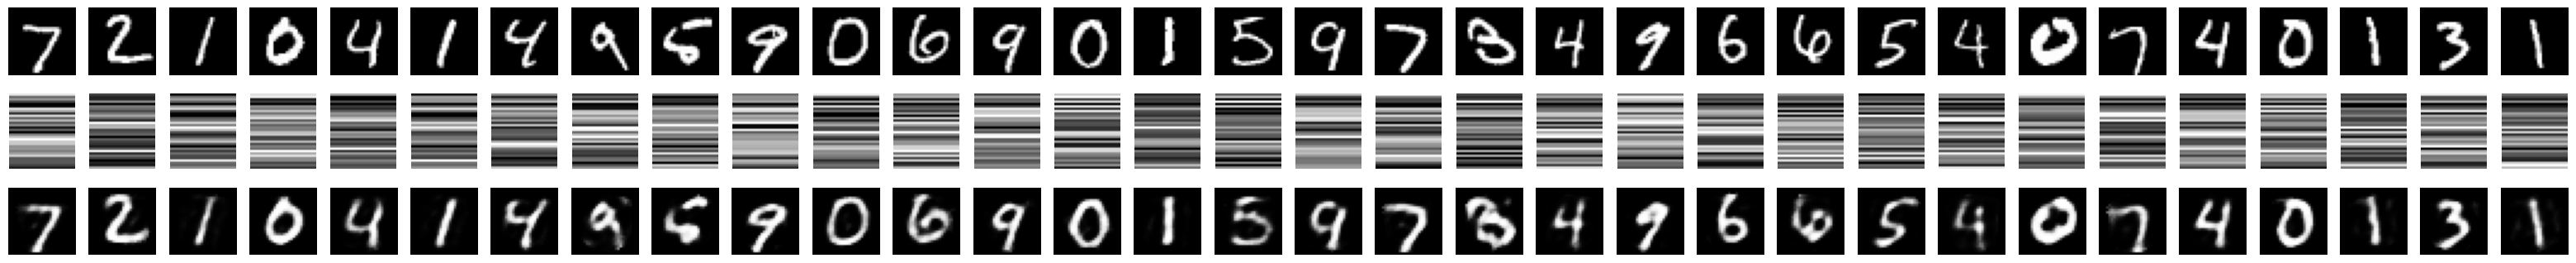

313/313 [==============================] - 3s 9ms/step
batch_vals = tf.Tensor(
[[1075 2600 1773 1636    0 1849 4632 1680  886  780 1530 1295 2335 2557
  3863 1852  660 1021 2349 2146 2659 2888  748  570 1450 1997 1363  669
  1929 1339 2528 2547]
 [1801 1865 2238 3814    0 2550 3078 3339   85 3347 2134 3373 2553 3581
  3354 3205 2628 3820 2714 1830 2468 1062 3840 2968 3768 5210 5418  406
  3180 2088 3141 3817]
 [2871 3820  508 3696    0 3158 3485 3953 1910 2648 1805 2639 1585 3074
  3305 2564 2041 3595 3233 2755 3630  974 4167 1551 3599 4666 3199 2512
  3662 1626 2307 5414]
 [ 396 1997 1668 1663    0  948 2984 2280 2594 3495 1296 2602  993 2305
     0 2254 3144 3521 3079 1583 2528 3299 3720 2719 1858 1175  873 2115
   960 1680 1079 1851]
 [1910 3025 1767 2063    0  450 2256 2965 1895 2498 1326 1718 4244 3124
   783 4048 2138 3222 1627 4078 2166 1805 4701    0 2372 3140 1498 2485
    85 1680 1936 1783]
 [2834 2977 3153 2176    0 3309 4232 1534 3079 6388 2412  877 5629 2689
  4787 3393 49

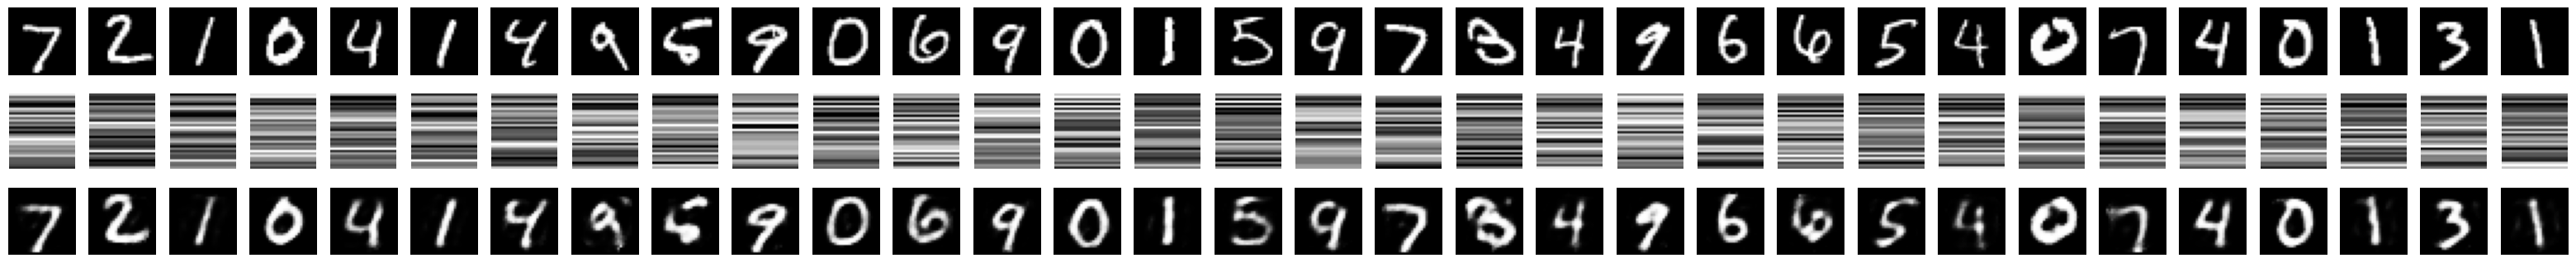

313/313 [==============================] - 3s 9ms/step
batch_vals = tf.Tensor(
[[1169 2737 1877 1660    0 1970 4736 1608 1043  865 1563 1409 2359 2519
  3948 1900  657  926 2384 2244 2656 2990  810  685 1404 1997 1420  766
  1949 1395 2617 2636]
 [1846 1993 2356 3835    0 2581 3052 3243   55 3360 2217 3571 2637 3552
  3409 3304 2742 3728 2718 1945 2344 1077 3928 3066 3708 5181 5470  510
  3143 2185 3263 3927]
 [2926 3977  694 3743    0 3239 3556 3883 1994 2765 1943 2782 1621 3054
  3437 2621 2075 3548 3225 2842 3617 1004 4291 1621 3515 4636 3260 2707
  3716 1697 2437 5584]
 [ 498 2162 1805 1711    0  995 3031 2211 2644 3551 1301 2766  987 2271
    15 2296 3277 3522 3086 1653 2526 3372 3763 2791 1795 1116  885 2254
   957 1743 1100 1908]
 [1962 3079 1838 1959    0  492 2273 2904 1845 2539 1384 1862 4279 3066
   928 4112 2204 3235 1632 4176 2069 1795 4702    0 2297 3024 1420 2581
    35 1821 2003 1878]
 [2898 3115 3297 2227    0 3406 4267 1428 3134 6530 2492 1040 5650 2655
  4881 3476 50

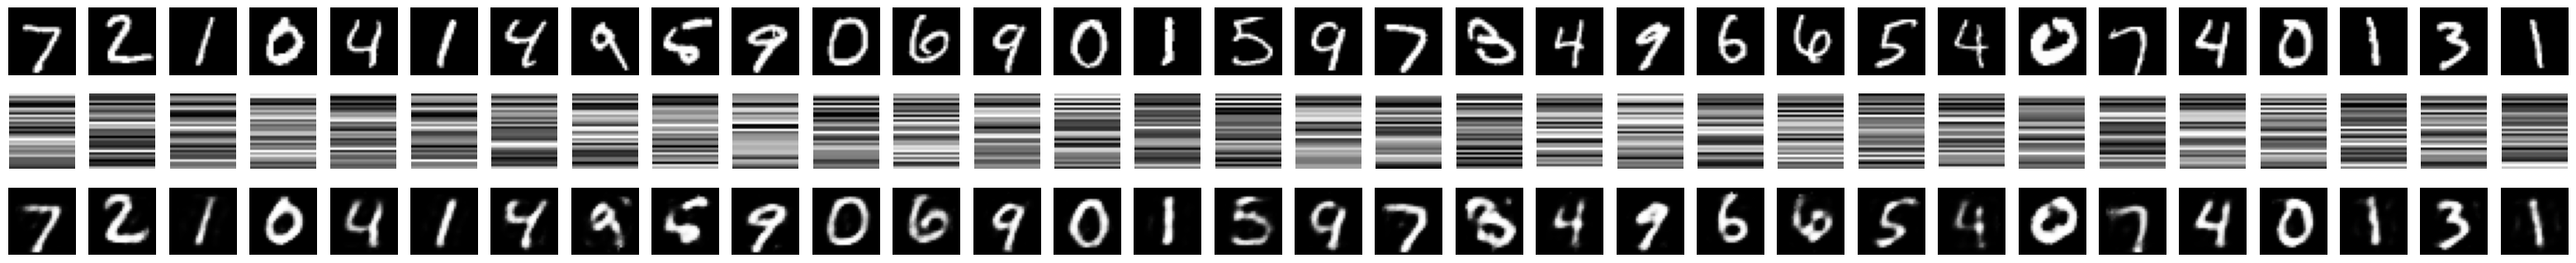

In [ ]:
# A simple autoencoder with only one hidden layer.
# Testing quantization of the latent space (right way).

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import Sequence
from skimage.io import imread
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from scipy.stats import entropy
#tf.compat.v1.enable_eager_execution()

# https://www.tensorflow.org/datasets/catalog/
DATASET = 'mnist'
#DATASET = 'fashion_mnist'
#URL = "https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz"

# This variable controls the number of hidden neurons. Notice that the output of a neuron is a floating point number.
LATENT_SPACE_LENGTH = 32

img_width, img_height = 28, 28
img_length = img_height * img_width

# Generate the NumPy arrays with the data.
DATA_URL = f'https://storage.googleapis.com/tensorflow/tf-keras-datasets/{DATASET}.npz'
# DATASET = 'fashion_mnist'
# DATA_URL = "https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz"
path = tf.keras.utils.get_file(f'{DATASET}.npz', DATA_URL)
with np.load(path) as data:
    x_train = data['x_train']
    y_train = data['x_train']
    x_test = data['x_test']
    y_test = data['y_test']

# Pipelines.
train_DS = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_DS = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Define how to use the datasets, preprocess, etc.

def process_x(image, label):
    # The input images are reshaped (to have only one dimension) and normalized to [0, 1].
    processed_img = tf.reshape(image, (img_height * img_width, 1))
    processed_img = tf.cast(processed_img, tf.float32) / 255.
    # The input dataset has been labeled, but labels are ignored in the rest of the pipeline.
    return processed_img, label

def process_y(image, label):
    # The output images are already in 1D. Notice that in autoencoder, the objective is to generate the same output than the input.
    return image, image

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
train_DS = train_DS.map(process_x)
train_DS = train_DS.map(process_y)
train_DS = train_DS.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_DS = test_DS.map(process_x)
test_DS = test_DS.map(process_y)
test_DS = test_DS.batch(BATCH_SIZE)

class AddNoise(keras.layers.Layer):

    def __init__(self, units=32, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        outputs = inputs
        outputs += tf.random.uniform(shape=tf.shape(inputs), minval=-.5, maxval=.5)
        return outputs

class Quantization_8bits(keras.layers.Layer):

    def __init__(self, units=32, **kwargs):
        super().__init__(**kwargs)
        self.quantized_vals = 0

    def call(self, inputs):
        outputs = inputs
        #print("a1", tf.reduce_min(outputs))
        #print("a2", tf.reduce_max(outputs))
        #outputs = tf.keras.activations.sigmoid(outputs - 0.5)#(outputs + 0.5)
        #print("d1", tf.reduce_min(outputs))
        #print("d2", tf.reduce_max(outputs))
        #output = outputs - 0.5
        outputs = tf.saturate_cast(tf.round(outputs * 255.), tf.int16)
        #outputs = tf.saturate_cast(tf.round(outputs * 255.), tf.int8)
        self.quantized_vals = outputs
        outputs = tf.cast(outputs, tf.float32) / 255.0
        return outputs

    def get_vals(self):
        return self.quantized_vals

# Define the autoencoder.
input_layer = keras.Input(shape=(img_length,), name="inputs")
hidden_layer = layers.Dense(LATENT_SPACE_LENGTH, activation="relu")(input_layer)
noisy_layer = AddNoise(units=LATENT_SPACE_LENGTH, name="add_noise")(hidden_layer)
output_layer = layers.Dense(img_length, activation="sigmoid", name="outputs")(noisy_layer)

autoencoder = keras.Model(input_layer, output_layer)

# To see the latents (content of the hidden layer), we define a new "model" with only the encoder.
encoder = keras.Model(input_layer, hidden_layer)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mse", run_eagerly=True)

autoencoder.summary()

# To see the reconstructions after each iteration, we create a new (identical) autoencoder that will load the parameters of the first one. Notice that this new autoencoder is not trained.
input_layer_2 = keras.Input(shape=(img_length,), name="inputs_2")
hidden_layer_2 = layers.Dense(LATENT_SPACE_LENGTH, activation="relu")(input_layer_2)
quantization_layer = Quantization_8bits(units=LATENT_SPACE_LENGTH, name="quantization")(hidden_layer_2)
output_layer_2 = layers.Dense(img_length, activation="sigmoid", name="outputs_2")(quantization_layer)

autoencoder_2 = keras.Model(input_layer_2, output_layer_2)

autoencoder_2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mse", run_eagerly=True)

autoencoder_2.summary()

# Train.
EPOCHS = 1
ITERATIONS = 5
plt.gray()
for i in range(ITERATIONS):

    autoencoder.fit(
        train_DS,
        epochs=EPOCHS,
        validation_data=test_DS)

    #print("2", autoencoder.get_layer("hidden").variables[1])

    # Show the learning.
    plt.figure(figsize=(40,4))

    n = len(train_DS)
    if n > 32:
        n = 32

    # Show the originals (using the pipeline).
    for images in test_DS.take(1):
        for i in range(n):
            ax = plt.subplot(3, n, i + 1)
            try:
                image = images[0][i].numpy()
                image *= 255
                image = image.astype("uint8").reshape(img_height, img_width)
                plt.imshow(image)
                #plt.gray()
                plt.axis("off")
            except:
                pass

    # See the latent space (as images).
    latent_imgs = encoder.predict(test_DS)
    #print("type latent", type(latent_imgs))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(resize(latent_imgs[i], (LATENT_SPACE_LENGTH, img_width)))
        plt.axis("off")

    # See the reconstructions.
    autoencoder_2.set_weights(autoencoder.get_weights())
    reconstructed_imgs = autoencoder_2.predict(test_DS)
    #print(type(reconstructed_imgs))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(reconstructed_imgs[i].reshape(img_height, img_width))
        plt.axis("off")

    batch_vals = autoencoder_2.get_layer("quantization").get_vals()
    print("batch_vals =", batch_vals)
    for j in range(BATCH_SIZE):
        try:
            vals = batch_vals[j].numpy() + 512
            #print(vals)
            print(entropy(vals, base=2))
        except:
            pass

    plt.show()